# Project "Know_Your_Rent_Muc": Part Two
# EDA (Exploratory Data Analysis)

In this part I explore the data to get more inside information about them. This process is importent to understand the data. With out a deep data understanding it´s going to be difficult to create a good machine learning model.

In [1113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import normaltest
from sklearn import preprocessing

# 1. General Obeservation

First of all I look at the first 5 rows of the data. I look at them and analyse which data types are there.

In [1114]:
df = pd.read_csv("221211_know_your_rent_muc_data.csv")

In [1115]:
df.head()

Unnamed: 0 "enh_impression_list" "enh_impression_name"  \
0           0                 Liste               kontakt   
1           1                 Liste               kontakt   
2           2                 Liste               kontakt   
3           3                 Liste               kontakt   
4           4                 Liste               kontakt   

   "enh_impression_position"  "search_sortby"  "object_area" "object_city"  \
0                        1.0        2594468.0          37.00       München   
1                        2.0         177005.0          53.06       München   
2                        3.0         177005.0          64.16       München   
3                        4.0         177005.0          49.46       München   
4                        5.0         177005.0          96.23       München   

  "object_currency" "object_display_state"  \
0               EUR               sel_item   
1               EUR               sel_item   
2               EUR               sel_item   
3               EUR               sel_item   
4               EUR               sel_item   

                          "object_district"  ... "object_is_special"  \
0  Thalk.Obersendl.-Forsten-Fürstenr.-Solln  ...                 NaN   
1  Thalk.Obersendl.-Forsten-Fürstenr.-Solln  ...            top-immo   
2  Thalk.Obersendl.-Forsten-Fürstenr.-Solln  ...            top-immo   
3  Thalk.Obersendl.-Forsten-Fürstenr.-Solln  ...            top-immo   
4  Thalk.Obersendl.-Forsten-Fürstenr.-Solln  ...            top-immo   

  "object_label" "object_marketingtype" "object_objekt_nutzungsart"  \
0            new                  Miete                      WOHNEN   
1            old                  Miete                      WOHNEN   
2            old                  Miete                      WOHNEN   
3            old                  Miete                      WOHNEN   
4            old                  Miete                      WOHNEN   

  "object_objekt_zustand" "object_objektart" "object_objektart_sub"  \
0               sonstiges                NaN              APARTMENT   
1               sonstiges                NaN                  ETAGE   
2               sonstiges                NaN                  ETAGE   
3               sonstiges                NaN            ERDGESCHOSS   
4               sonstiges                NaN                  ETAGE   

  "object_price"  "object_rooms" "object_listingtype"  
0        1120.00             1.0             standard  
1        1339.77             2.0              premium  
2        1509.68             2.0              premium  
3        1600.03             2.0              premium  
4        2085.30             4.0              premium  

[5 rows x 23 columns]

Before I start with the analyzation I need to remove all the "" of the column names, because this could make problems with the syntax of python.

In [1116]:
def rename_columns(df):
    for i in df:
        for j in i:
            if j == '"':
                df.rename(columns={i: i[1:len(i)-1]}, inplace=True)
    return df

In [1117]:
df1 = rename_columns(df)

Here are the datatypes of the columns. The datatypes are automatically generated through pandas. Pandas does this most of the time right but were can be mistakes. Examples are that a discrete variable is declared as a continuouse variable. 

In [1118]:
df1.dtypes

Unnamed: 0                     int64
enh_impression_list           object
enh_impression_name           object
enh_impression_position      float64
search_sortby                float64
object_area                  float64
object_city                   object
object_currency               object
object_display_state          object
object_district               object
object_features               object
object_federalstate           object
object_gok                    object
object_is_special             object
object_label                  object
object_marketingtype          object
object_objekt_nutzungsart     object
object_objekt_zustand         object
object_objektart             float64
object_objektart_sub          object
object_price                 float64
object_rooms                 float64
object_listingtype            object
dtype: object

Here is the summary of the obsarvation:
- The unnamed column are the id´s.
- The same is applicable to "enh_impression_position".
- The variable "search_sortby" is definitely a discret variable, because the variable doesn´t measure something. It need to be transformed to a integer. 
- The variable "object_area" measurement the room size in square feet. The float is here right declared.
- The variable "object_objektart" seems to have no entries. It can be deleted.
- The variable "object_price" is a discrete varibale and need to be transformed to a integer. 
- The same is applicable to "object_rooms".
- "object_label" is binar.

In [1119]:
df1.rename(columns = {'Unnamed: 0':'id'}, inplace = True)

In [1120]:
df1["enh_impression_position"] = df["enh_impression_position"].astype("string")
df1["search_sortby"] = df["search_sortby"].astype("int")
df1["object_price"] = df["object_price"].astype("int")
df1["object_rooms"] = df["object_rooms"].astype("int")
df2 = df1.drop("object_objektart", axis=1)

In [1121]:
df2.dtypes

id                             int64
enh_impression_list           object
enh_impression_name           object
enh_impression_position       string
search_sortby                  int64
object_area                  float64
object_city                   object
object_currency               object
object_display_state          object
object_district               object
object_features               object
object_federalstate           object
object_gok                    object
object_is_special             object
object_label                  object
object_marketingtype          object
object_objekt_nutzungsart     object
object_objekt_zustand         object
object_objektart_sub          object
object_price                   int64
object_rooms                   int64
object_listingtype            object
dtype: object

Now, it´s importent to know which unique values are in the object columns. This helps to understand which columns have a lot of information in it and which not. It also tells me if there are similarity in different columns. The column "object_gok" seems like that is just a intern code of the object from the website. It can be also deleted. 

In [1122]:
def unique_values(df):
    for i in df.columns:
        if df[i].dtypes == "object" and i!="id" and i!="object_gok":
            print(i)
            print(df[i].unique())
            print("------------------")

In [1123]:
unique_values(df2)

enh_impression_list
['Liste' 'Liste_Objekte_passend']
------------------
enh_impression_name
['kontakt']
------------------
object_city
['München' 'Haar' 'Neubiberg' 'Aschheim' 'Ottobrunn' 'Vaterstetten'
 'Kirchheim' 'Unterhaching' 'Unterföhring' 'Hergolding' 'Hohenbrunn'
 'Taufkirchen' 'Zorneding' 'Poing' 'Höhenkirchen-Siegertsbrunn'
 'Oberhaching' 'Garching' 'Brunnthal' 'Kirchseeon' 'Markt Schwaben'
 'Unterschleißheim' 'Planegg' 'Gräfelfing' 'Sauerlach' 'Karlsfeld' 'Glonn'
 'Eching' 'Krailling' 'Neufahrn' 'Gauting' 'Hallbergmoos' 'Wörth'
 'Ebersberg' 'Grafing' 'Germering' 'Dachau' 'Forstern' 'Haimhausen'
 'Oberding' 'Gröbenzell' 'Erding' 'Dietramszell' 'Puchheim' 'Tuntenhausen'
 'Eichenau' 'Holzkirchen' 'Olching' 'Aßling' 'Starnberg' 'Bergkirchen'
 'Gilching' 'Isen' 'Lengdorf' 'Freising' 'Wolfratshausen' 'Bockhorn'
 'Geretsried' 'Fürstenfeldbruck' 'Vierkirchen' 'Maisach' 'Marzling' 'Haag'
 'Warngau' 'Berglern' 'Feldafing' 'Rechtmehring' 'Münsing' 'Weichs'
 'Waakirchen' 'Rott' 'Irsche

Here is the summary of the obsarvation:
- "enh_impression_list" and "enh_impression_name", "object_currency", "object_display_state", "object_federalstate", "object_label", "object_marketingtype", "object_objekt_nutzungsart", "object_objekt_zustand" and "object_listingtype" one, respectively two kind of entries. And the entries have no information for the prediction of a rent. They will be deleted.
- The column "object_is_special" have more kind of values but with informations for the goal prediction.
- The column "object_district" and "object_city" seems to be similar. That need to be looked in detail.

In [1124]:
df3 = df2.drop(["object_gok", "enh_impression_list", "enh_impression_name", "object_currency", "object_display_state", 
              "object_federalstate", "object_label", "object_marketingtype", "object_objekt_nutzungsart",
             "object_objekt_zustand", "object_listingtype", "object_is_special"], axis=1)

In [1125]:
df3.head()

id enh_impression_position  search_sortby  object_area object_city  \
0   0                     1.0        2594468        37.00     München   
1   1                     2.0         177005        53.06     München   
2   2                     3.0         177005        64.16     München   
3   3                     4.0         177005        49.46     München   
4   4                     5.0         177005        96.23     München   

                            object_district object_features  \
0  Thalk.Obersendl.-Forsten-Fürstenr.-Solln      Balkon|EBK   
1  Thalk.Obersendl.-Forsten-Fürstenr.-Solln          Balkon   
2  Thalk.Obersendl.-Forsten-Fürstenr.-Solln             NaN   
3  Thalk.Obersendl.-Forsten-Fürstenr.-Solln             NaN   
4  Thalk.Obersendl.-Forsten-Fürstenr.-Solln          Balkon   

  object_objektart_sub  object_price  object_rooms  
0            APARTMENT          1120             1  
1                ETAGE          1339             2  
2                ETAGE          1509             2  
3          ERDGESCHOSS          1600             2  
4                ETAGE          2085             4

A closer look to the columns "object_city" and "object_district" tells me that the "object_district" value is for the value "München" in the column "object_city" the city district. For the other values in the column "object_district" they are smaller villages inside a village district. This villages aren´t located in Munich. They are located around the city.  
For the machine learning model I will just use the districs of Munich and not the villages around of the city.

To check how many rows I will lose I use the following function:

In [1126]:
len(df3[df3["object_city"]!='München'])

330

Now I will deleted all rows which are not located in munich. After that I delete the column "object_city", because it has after this operation no information value. 

In [1127]:
df4 = df3.loc[df2["object_city"]=='München']

In [1128]:
df4.shape

(595, 10)

Now the column "object_city" can be deleted.

In [1129]:
df5 = df4.drop("object_city", axis=1)

In [1130]:
df5.head()

id enh_impression_position  search_sortby  object_area  \
0   0                     1.0        2594468        37.00   
1   1                     2.0         177005        53.06   
2   2                     3.0         177005        64.16   
3   3                     4.0         177005        49.46   
4   4                     5.0         177005        96.23   

                            object_district object_features  \
0  Thalk.Obersendl.-Forsten-Fürstenr.-Solln      Balkon|EBK   
1  Thalk.Obersendl.-Forsten-Fürstenr.-Solln          Balkon   
2  Thalk.Obersendl.-Forsten-Fürstenr.-Solln             NaN   
3  Thalk.Obersendl.-Forsten-Fürstenr.-Solln             NaN   
4  Thalk.Obersendl.-Forsten-Fürstenr.-Solln          Balkon   

  object_objektart_sub  object_price  object_rooms  
0            APARTMENT          1120             1  
1                ETAGE          1339             2  
2                ETAGE          1509             2  
3          ERDGESCHOSS          1600             2  
4                ETAGE          2085             4

# 2. Categorical Feature Analysis

Now I look closer to the categorical variables. Here I try to find out how often each unique value is occur in the columns. This gives me a feeling how the data is distribute and which values appears often or rare. Additionally I check how many different unique values there are.

But first of all I check if there are zero values in the categorical features. This values should be deleted, because the cause errors in the further analysis. 

In [1131]:
df5["object_district"].isnull().values.any()

True

In [1132]:
df5["object_objektart_sub"].isnull().values.any()

False

In [1133]:
df5["object_features"].isnull().values.any()

True

Ok, the columns "object_district" and "object_features" have zero values. Now, I need to find the position and delete them.

In [1134]:
df5 = df5[df5.object_district.notnull()]
df5["object_district"].isnull().values.any()

False

In [1135]:
df5 = df5[df5.object_district.notnull()]
df5["object_features"].isnull().values.any()

True

I see that this don´t work. Let´s look at the data to find out why.

In [1136]:
df5["object_features"].tolist()[0:10]

['Balkon|EBK',
 'Balkon',
 nan,
 nan,
 'Balkon',
 nan,
 'Balkon',
 'Balkon',
 'EBK',
 'Balkon|EBK']

Now I see the problem. There are no zero values but NaN values. 

In [1137]:
df5["object_features"].dropna(axis=0, inplace=True)

In [1138]:
df5["object_features"].isnull().values.any()

True

In [1139]:
df5["object_features"].tolist()[0:10]

['Balkon|EBK',
 'Balkon',
 nan,
 nan,
 'Balkon',
 nan,
 'Balkon',
 'Balkon',
 'EBK',
 'Balkon|EBK']

Ok, this doesn´t worh either. Maybe the reason is that the just missing values which aren´t detected as NaN. Let´s try to convert the NaN values to zeros and then deleted them with the previous technique.

In [1140]:
df5['object_features'].fillna(0, inplace=True)

In [1141]:
df5 = df5[df5.object_features.notnull()]

In [1142]:
df5["object_features"].isnull().values.any()

False

Now it´s working. Finally the categorical data is clean.

Let´s check the amount of unique values of each categorical feature. This is importent to see if there are values which appear very rare. This could make the machine learning more complexe but with a low impact on the performance.

In [1143]:
df5.head()

id enh_impression_position  search_sortby  object_area  \
0   0                     1.0        2594468        37.00   
1   1                     2.0         177005        53.06   
2   2                     3.0         177005        64.16   
3   3                     4.0         177005        49.46   
4   4                     5.0         177005        96.23   

                            object_district object_features  \
0  Thalk.Obersendl.-Forsten-Fürstenr.-Solln      Balkon|EBK   
1  Thalk.Obersendl.-Forsten-Fürstenr.-Solln          Balkon   
2  Thalk.Obersendl.-Forsten-Fürstenr.-Solln               0   
3  Thalk.Obersendl.-Forsten-Fürstenr.-Solln               0   
4  Thalk.Obersendl.-Forsten-Fürstenr.-Solln          Balkon   

  object_objektart_sub  object_price  object_rooms  
0            APARTMENT          1120             1  
1                ETAGE          1339             2  
2                ETAGE          1509             2  
3          ERDGESCHOSS          1600             2  
4                ETAGE          2085             4

In [1144]:
for i in df5:
    if df5[i].dtypes == "object":
        print(df5[i].value_counts())
        print("---------")

Thalk.Obersendl.-Forsten-Fürstenr.-Solln    74
Aubing-Lochhausen-Langwied                  48
Bogenhausen                                 43
Ramersdorf-Perlach                          42
Schwabing-Freimann                          40
Neuhausen-Nymphenburg                       32
Pasing-Obermenzing                          31
Maxvorstadt                                 30
Altstadt-Lehel                              25
Ludwigsvorstadt-Isarvorstadt                22
Untergiesing-Harlaching                     21
Sendling                                    20
Moosach                                     18
Au-Haidhausen                               18
Schwabing-West                              16
Sendling-Westpark                           16
Obergiesing                                 15
Milbertshofen-Am Hart                       14
Trudering-Riem                              13
Hadern                                      12
Allach-Untermenzing                         10
Schwanthalerh

# 2.1. Feature "object_district"

I start with the feature "object_district".

In [1145]:
df5["object_district"].value_counts(normalize=True) 

Thalk.Obersendl.-Forsten-Fürstenr.-Solln    0.125637
Aubing-Lochhausen-Langwied                  0.081494
Bogenhausen                                 0.073005
Ramersdorf-Perlach                          0.071307
Schwabing-Freimann                          0.067912
Neuhausen-Nymphenburg                       0.054329
Pasing-Obermenzing                          0.052632
Maxvorstadt                                 0.050934
Altstadt-Lehel                              0.042445
Ludwigsvorstadt-Isarvorstadt                0.037351
Untergiesing-Harlaching                     0.035654
Sendling                                    0.033956
Moosach                                     0.030560
Au-Haidhausen                               0.030560
Schwabing-West                              0.027165
Sendling-Westpark                           0.027165
Obergiesing                                 0.025467
Milbertshofen-Am Hart                       0.023769
Trudering-Riem                              0.

In [1146]:
len(df5["object_district"].value_counts(normalize=True))

25

In [1147]:
df5["object_district"].unique()

array(['Thalk.Obersendl.-Forsten-Fürstenr.-Solln', 'Ramersdorf-Perlach',
       'Bogenhausen', 'Neuhausen-Nymphenburg', 'Schwabing-West',
       'Pasing-Obermenzing', 'Laim', 'Schwabing-Freimann',
       'Aubing-Lochhausen-Langwied', 'Sendling-Westpark',
       'Milbertshofen-Am Hart', 'Moosach', 'Maxvorstadt', 'Obergiesing',
       'Allach-Untermenzing', 'Altstadt-Lehel', 'Sendling',
       'Au-Haidhausen', 'Untergiesing-Harlaching', 'Hadern',
       'Berg am Laim', 'Trudering-Riem', 'Schwanthalerhöhe',
       'Ludwigsvorstadt-Isarvorstadt', 'Feldmoching-Hasenbergl'],
      dtype=object)

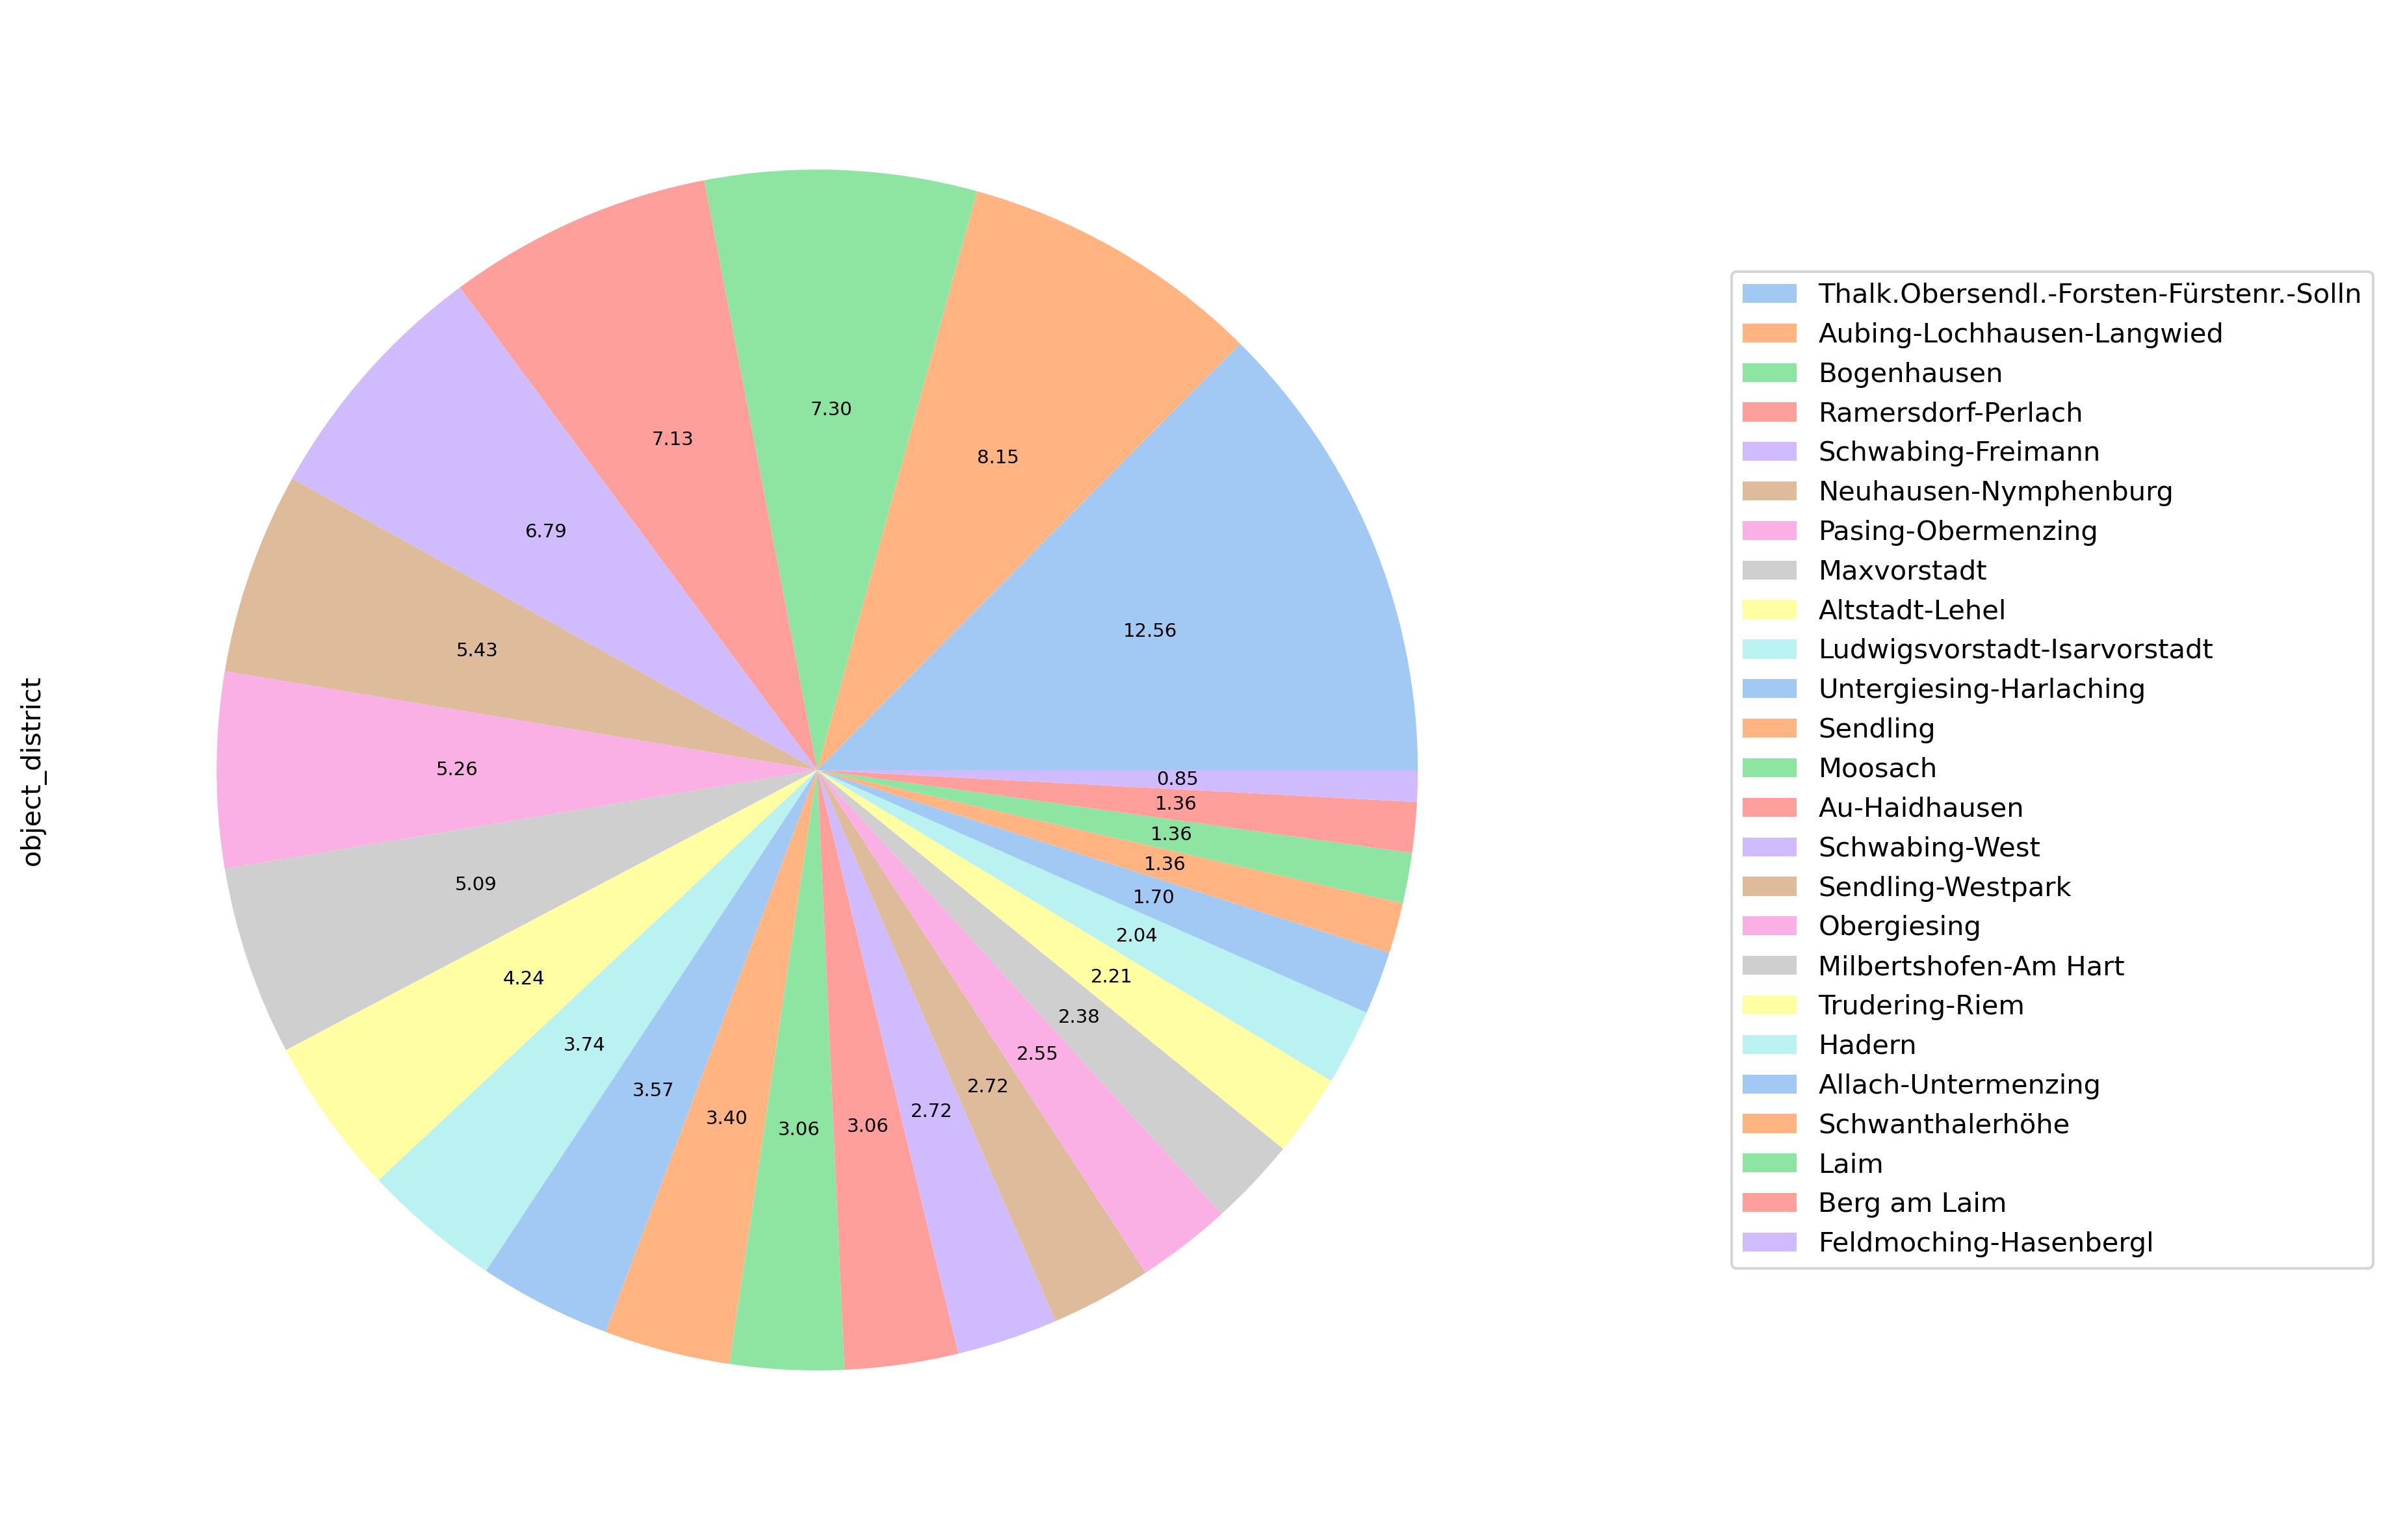

In [1148]:
plt.figure(figsize=(10,10))
colors = sns.color_palette("pastel")[0:25]
df5["object_district"].value_counts(normalize=True).plot.pie(autopct="%.2f" ,fontsize=7, figsize=(10,7), 
                                                               subplots=True, labeldistance=None, legend=True, 
                                                             colors=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))
plt.rcParams['figure.dpi'] = 300
plt.show()

The data in "object_district" is wide spreaded and have many different unique values (25). The district "Thalk.Obersendl.-Forsten-Fürstenr.-Solln" has the most offered flats. "Feldmoching-Hasenbergl" has the fewest offered flats.
It seems like that most of the flats are in structurally strong districts with high prices per square meter. 

To check this assumption I need to create a new feature. This feature should be the prices per square meter.

First of all I check if there are any zero values, because this cause trouble if i want to calculate the price per square meter.

In [1149]:
print(df5[df5["object_area"]==0.0].count()[0])
df5[df5["object_area"]==0.0].iloc[:, 3:4]

6


object_area
94           0.0
124          0.0
399          0.0
532          0.0
593          0.0
594          0.0

In [1150]:
df5 = df5[df5.object_area != 0]

In [1151]:
df5[df5["object_price"]==0.0].count()[0]

0

Then I create the new column "prices_per_square_meter" with the corresponding values.

In [1152]:
df5["prices_per_square_meter"] = round(df5["object_price"] / df5["object_area"], 0)

Now I visual the mean of the prices per square meter for each district to see which districts are the most expensive ones. Therefore I write a function to get me the districts and the mean price per square meter for each district.

In [1153]:
def get_mean_districts(df):
    dict_districts_mean_sqm = {}
    unique_values = df["object_district"].unique().tolist()
    for i in unique_values:
        df_new = df.iloc[np.where(df["object_district"]==i)]
        if len(df_new["prices_per_square_meter"].tolist()) != 0:
            dict_districts_mean_sqm[i] = round(sum(df_new["prices_per_square_meter"].
                                                                        tolist())/len(df_new["prices_per_square_meter"]
                                                                                      .tolist()),2)
    return dict_districts_mean_sqm

In [1154]:
dict_districts_mean_sqm = get_mean_districts(df5)

Then I sort the values from the lowest to the highest values to make the visualization more clear.

In [1155]:
dict_districts_mean_sqm = {k: v for k, v in sorted(dict_districts_mean_sqm.items(), key=lambda item: item[1])}

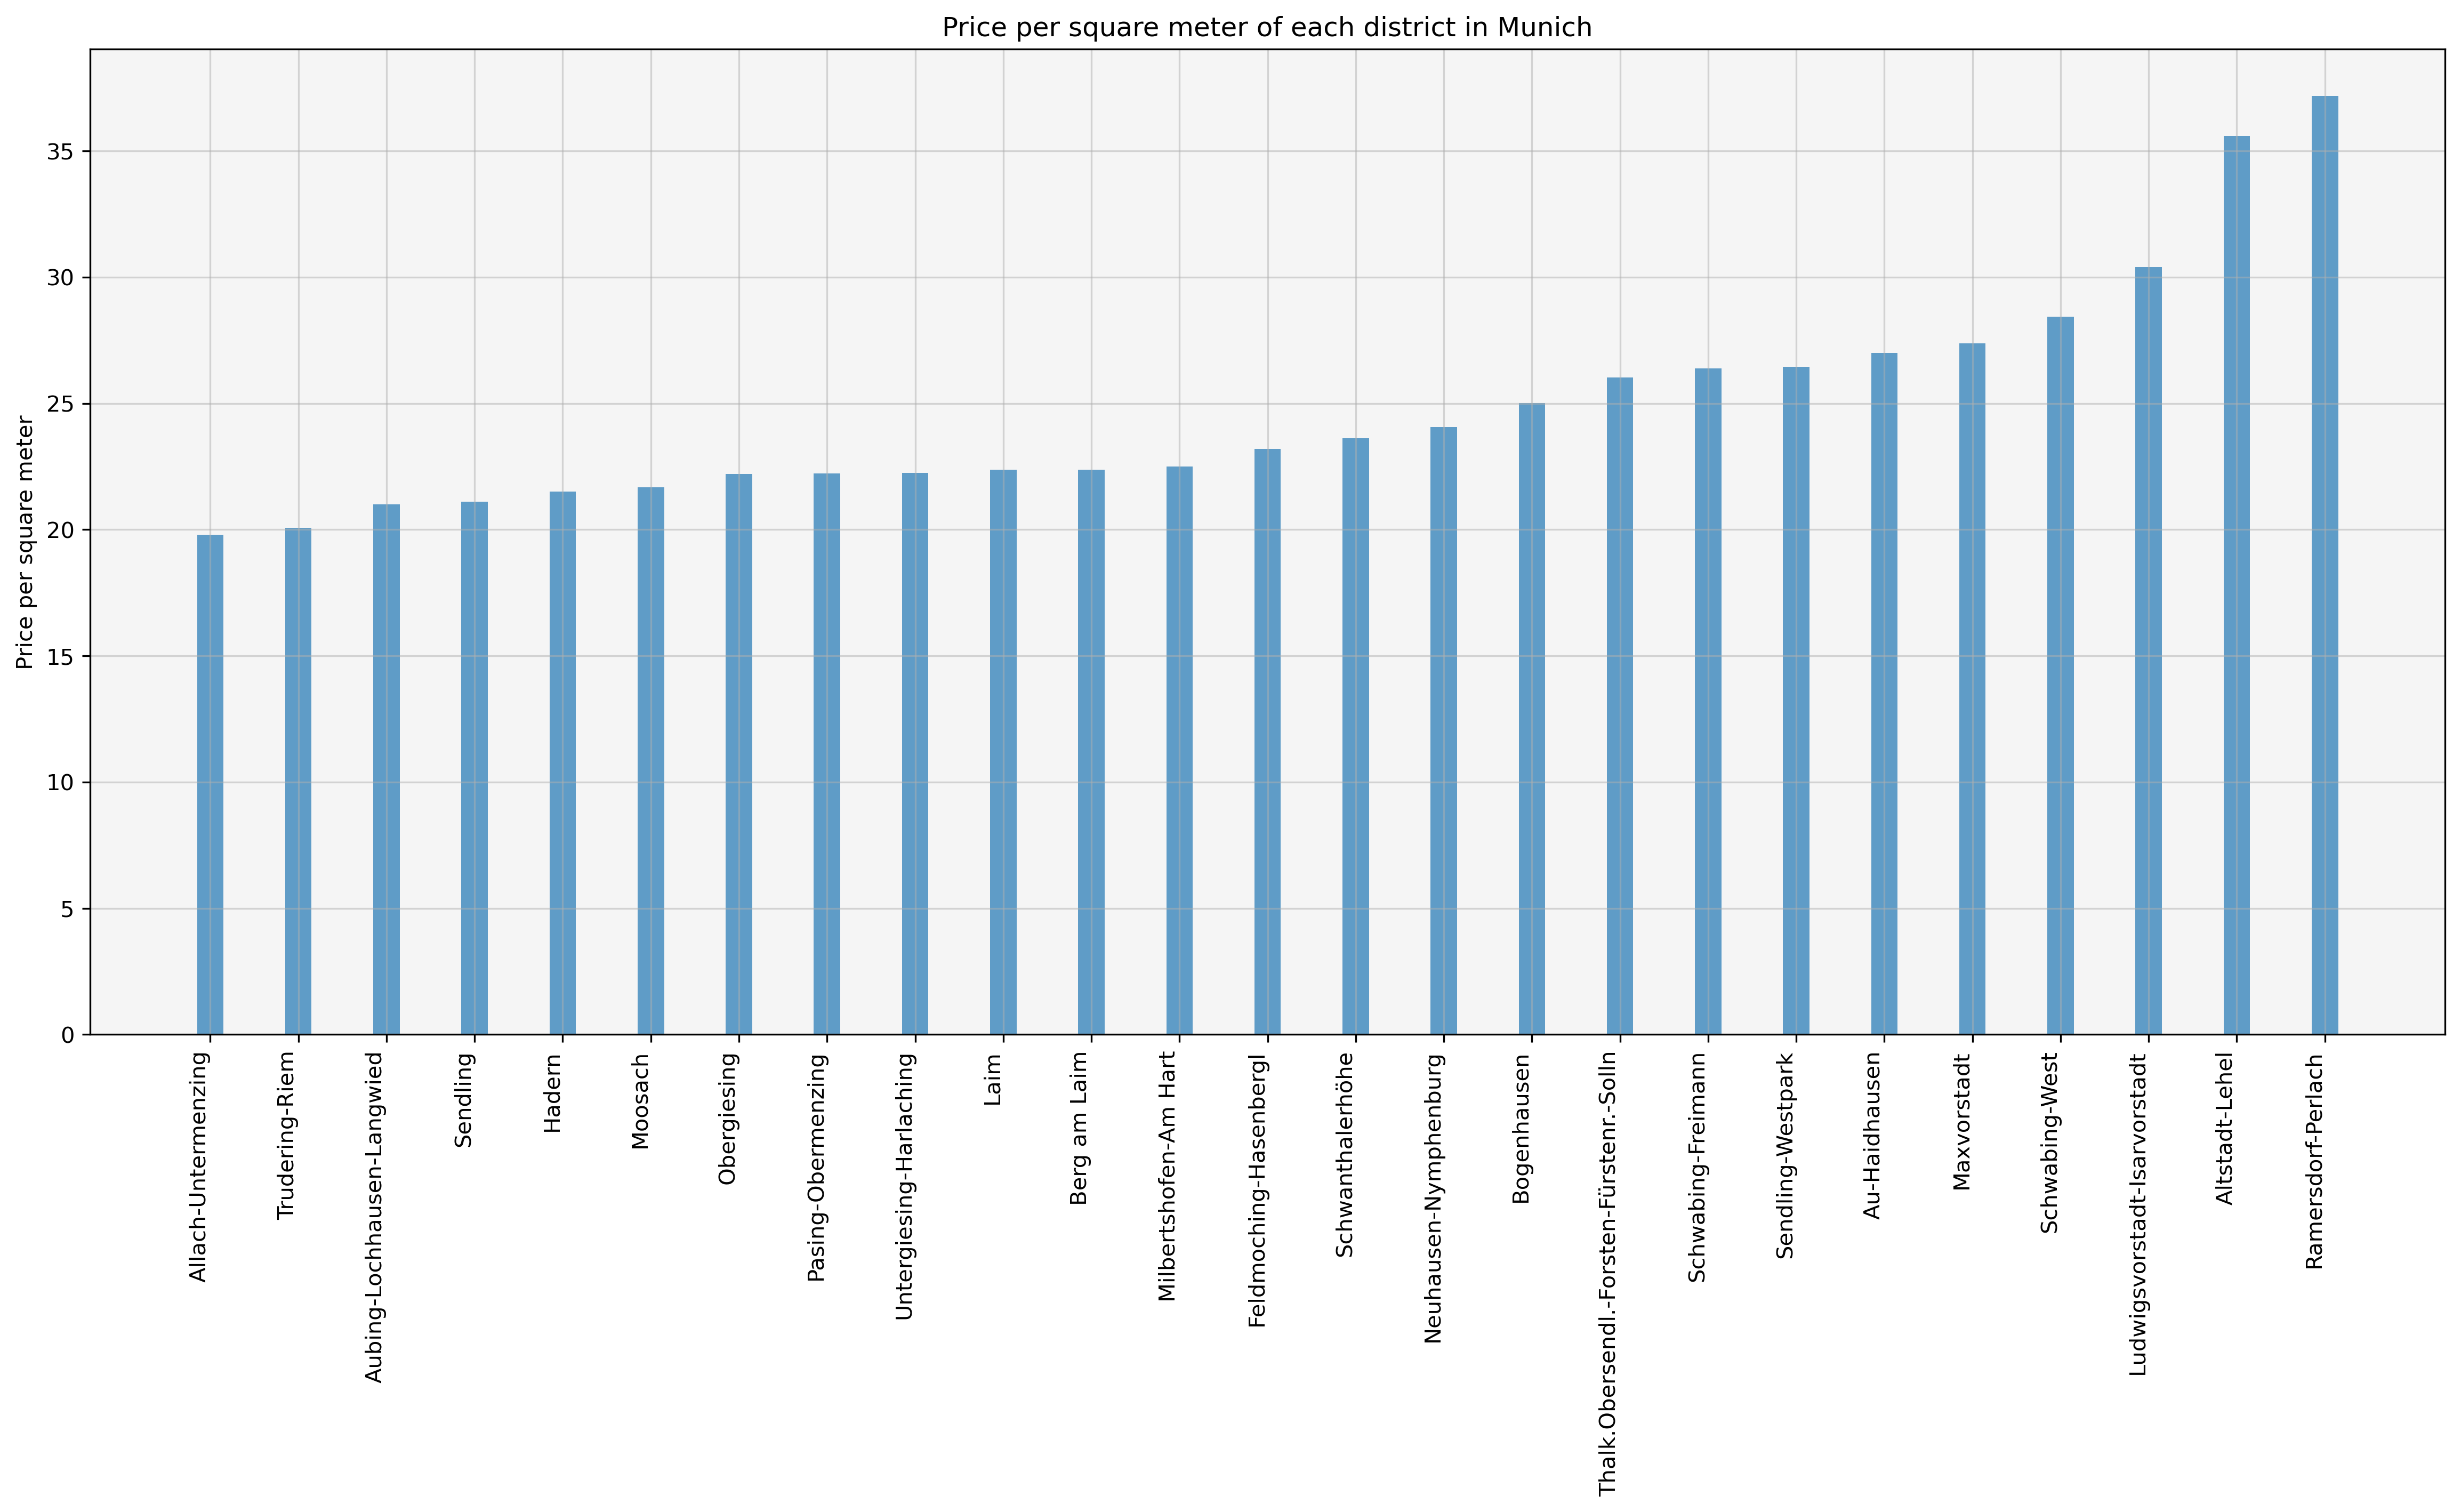

In [1156]:
plt.figure(figsize=(19,8))
ax = plt.axes()
plt.bar(dict_districts_mean_sqm.keys(),dict_districts_mean_sqm.values(), width=0.3, alpha=0.7)
plt.title("Price per square meter of each district in Munich")
ax.set_facecolor("whitesmoke")
plt.ylabel("Price per square meter")
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.grid(alpha=0.5)
plt.show()

The bar chart shows that the most cheapest ones are "Allach-Untermenzing" and "Trudering-Riem". The most expensive districts are "Ramersdorf-Perslach" and "Altstadt-Lehel".

If I want to test that most of the flats are in structurally strong districts, I need to find the mean price per square meter for each district and then compare it with the amount of flat ads in the respective district. If the biggest numbers of ads for each district are also the districts with the highest price per square meter, then my assumption might be true.

In [1157]:
def get_mean_len_districts(df):
    list_mean_sqt =[]
    list_len_ads = []
    unique_values = df["object_district"].unique().tolist()
    for i in unique_values:
        df_new = df.iloc[np.where(df["object_district"]==i)]
        if len(df_new["prices_per_square_meter"].tolist()) != 0:
            list_mean_sqt.append(round(sum(df_new["prices_per_square_meter"].tolist())/len
                             (df_new["prices_per_square_meter"].tolist()),2))
            list_len_ads.append(len(df_new))
    return list_mean_sqt, list_len_ads

In [1199]:
x, y = get_mean_len_districts(df5)

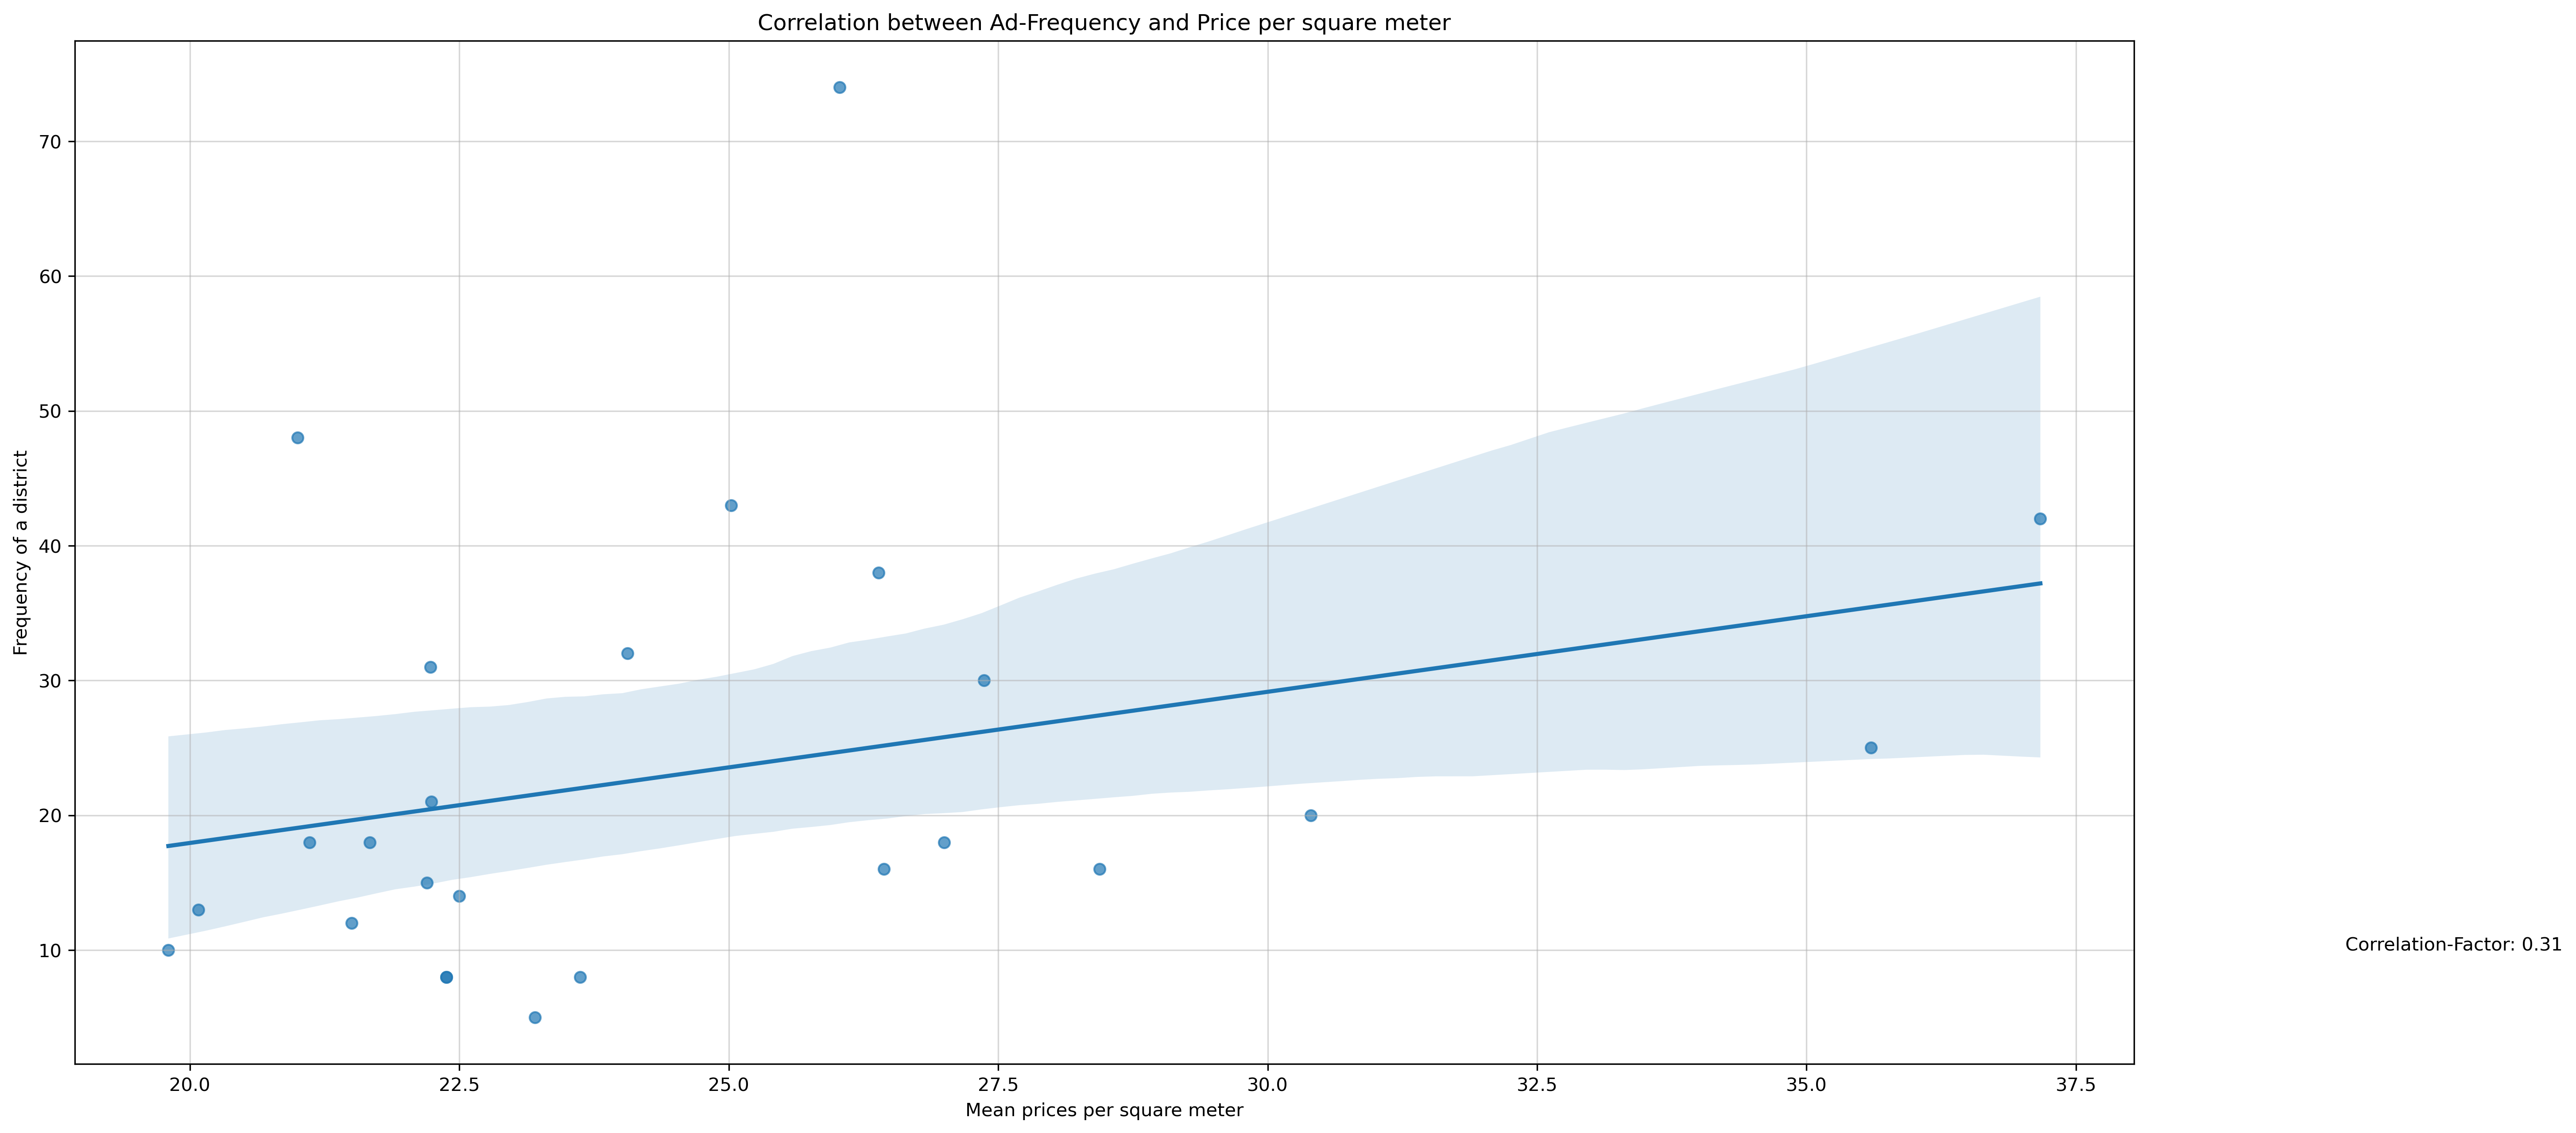

In [1200]:
plt.figure(figsize=(20,10))
plt.grid(alpha=0.5)
ax.set_facecolor("whitesmoke")
plt.title("Correlation between Ad-Frequency and Price per square meter")
plt.text(40, 10, 'Correlation-Factor: '+str(round(np.corrcoef(x,y)[1][0],2)))
plt.ylabel("Frequency of a district")
plt.xlabel("Mean prices per square meter")
sns.regplot(x, y, scatter_kws={'alpha':0.7}, ci=95)
plt.show()

My assumption tend to be true, because there is a correlation faktor of 0.31 between the "mean prices per square meter" and the "frequency of a district". A value above 0.3 is considered as a low positive correlation. 

The dark blue line shows a fitted regression line for the given data.

In this graph we can also see a 95% confidence level for the regression line (light blue area). This shows how accurately the regression is with the given data. This means that we are to 95% sure that the real regression line of the population is in this area.

# 2.2. Feature "object_objektart_sub"

The next part for the analysis will be feature "object_objektart_sub".

In [1160]:
df5["object_objektart_sub"].value_counts(normalize=True) 

Wohnung                0.358491
ETAGE                  0.325901
DACHGESCHOSS           0.090909
ERDGESCHOSS            0.085763
APARTMENT              0.066895
MAISONETTE             0.037736
PENTHOUSE              0.013722
LOFT-STUDIO-ATELIER    0.010292
SOUTERRAIN             0.010292
Name: object_objektart_sub, dtype: float64

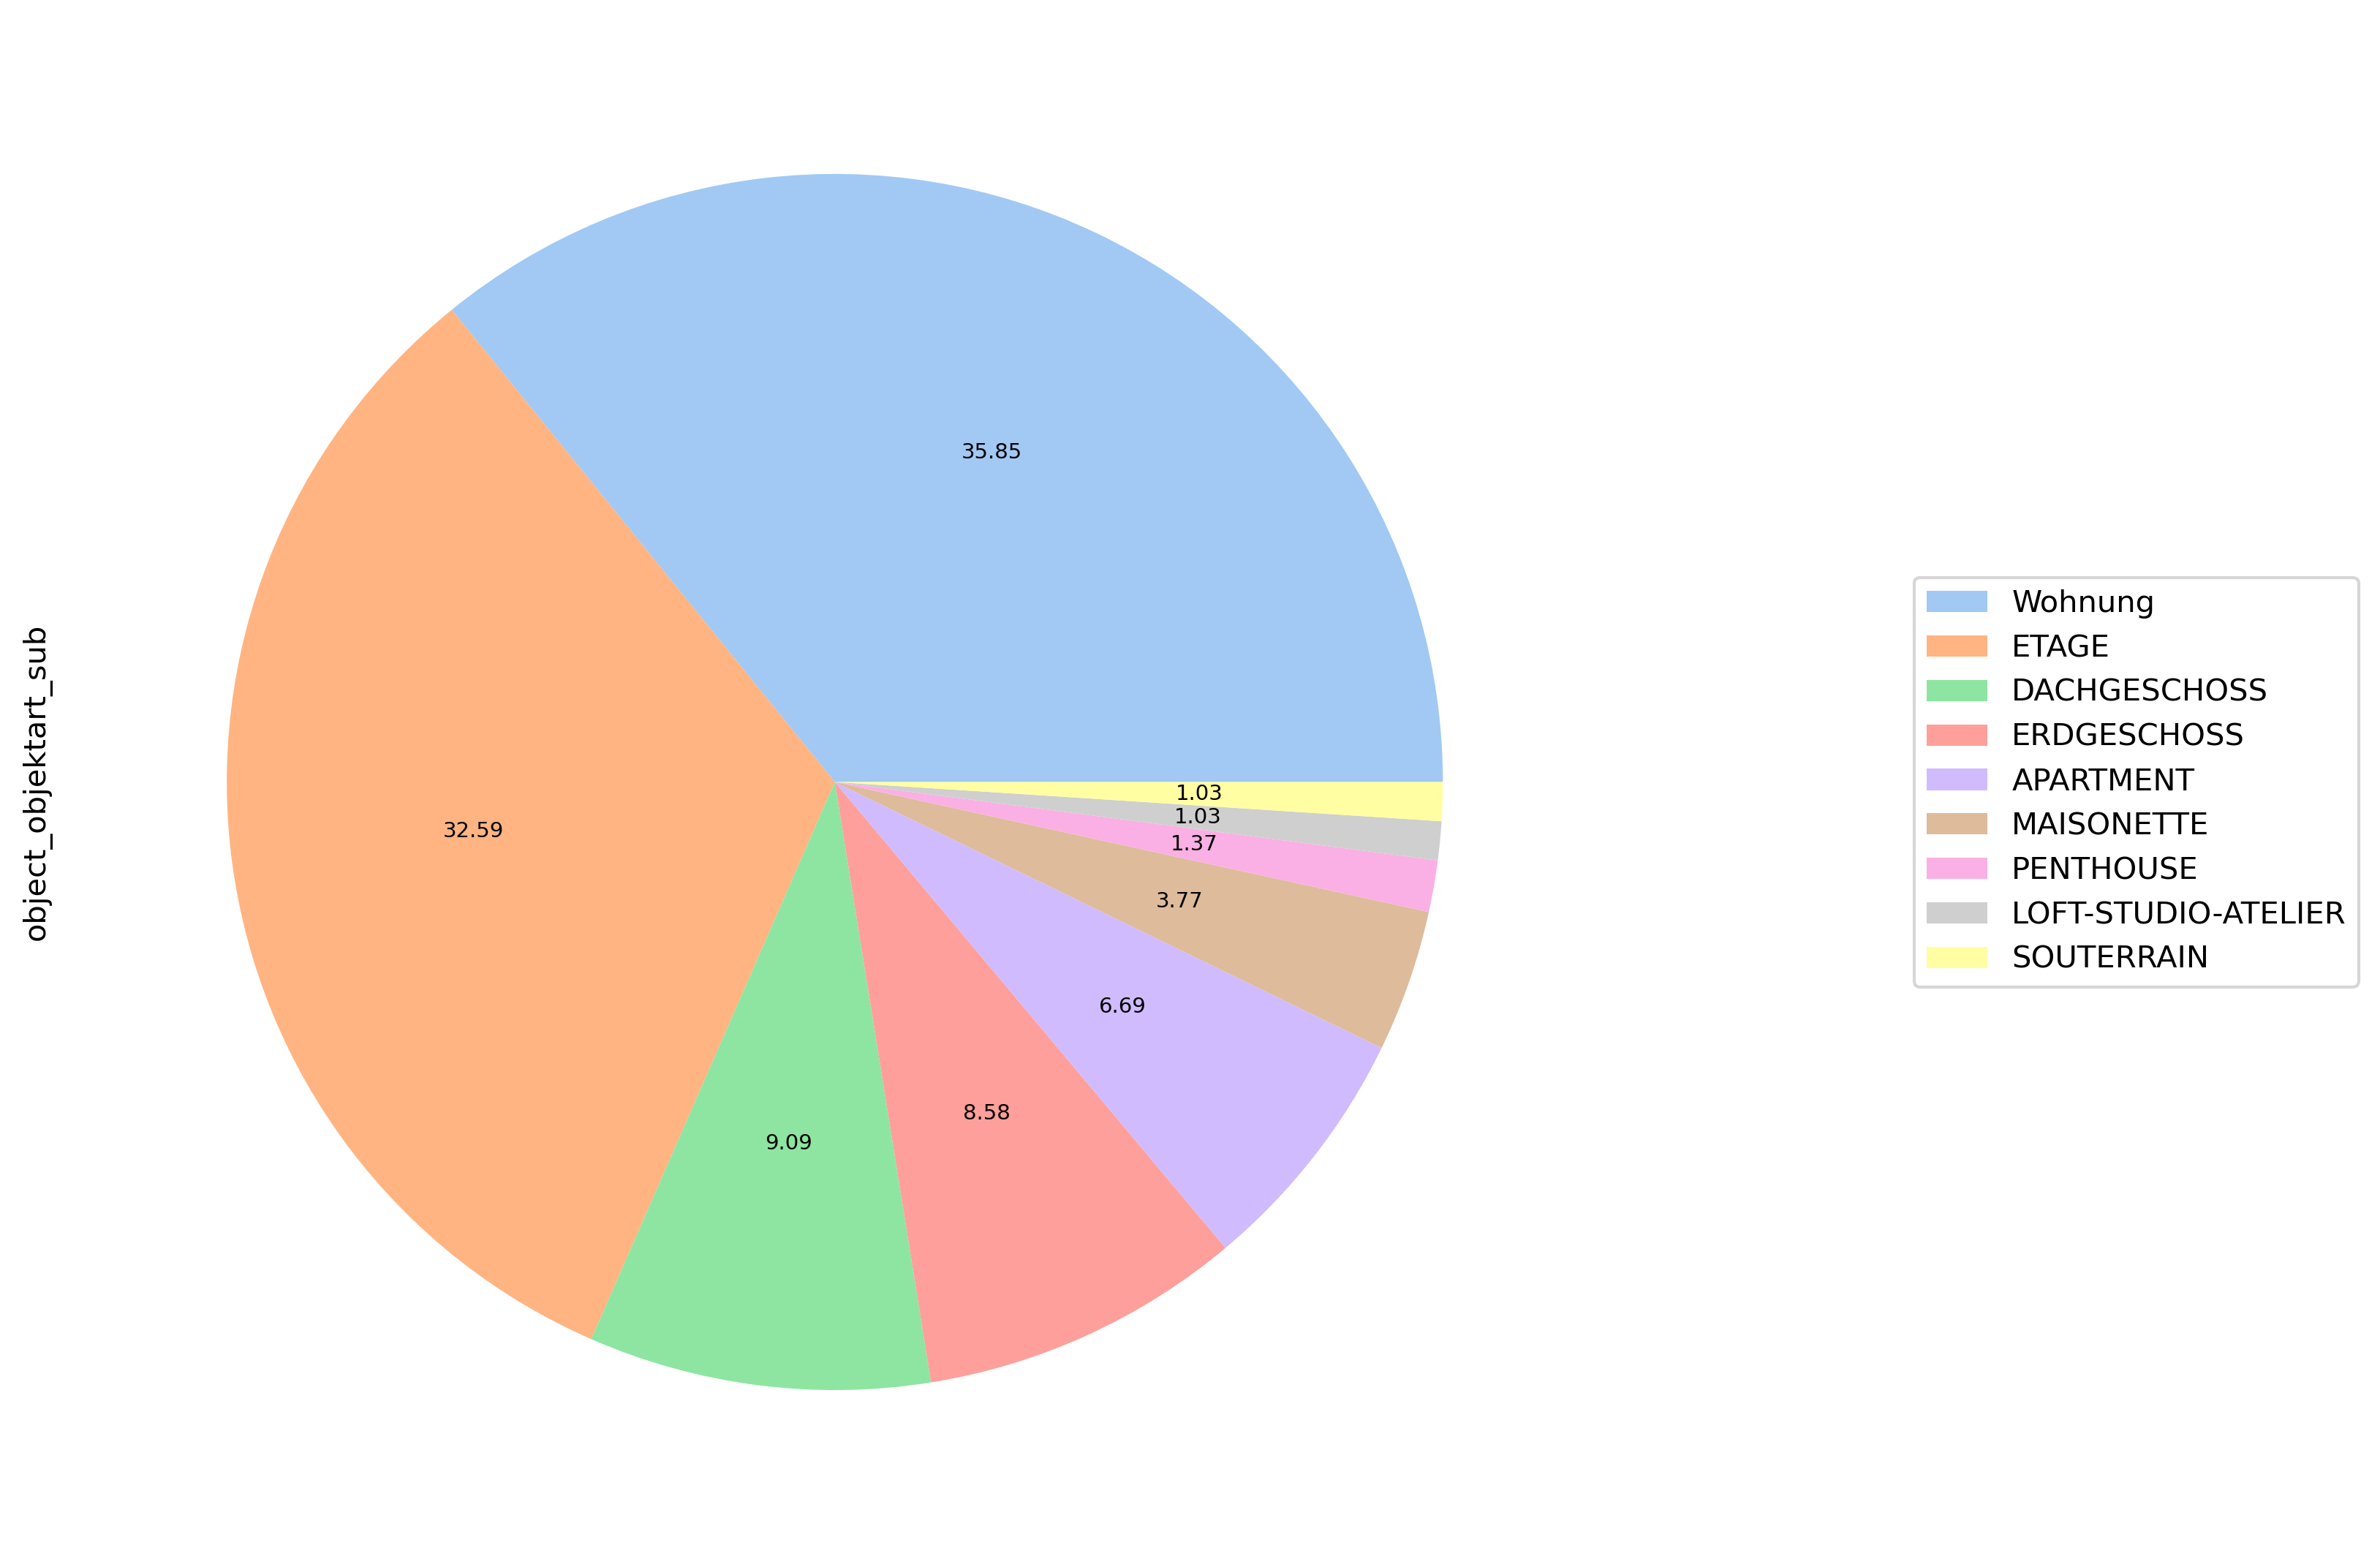

In [1161]:
plt.figure(figsize=(9,9))
colors = sns.color_palette("pastel")[0:25]
df5["object_objektart_sub"].value_counts(normalize=True).plot.pie(autopct="%.2f" ,fontsize=7, figsize=(10,7), 
                                                               subplots=True, labeldistance=None, legend=True, 
                                                             colors=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

In this column we see that almost 80% of the data are the values "Wohung", "ETAGE", "DACHGESCHOSS". Every value is here a specific kind of a flat, except the value "Wohnung". This a general expression for a flat. This means that all "Wohnung" values can inlcude one of the other values. This can inpurity can lead to a weak correlation to the target variable ("object_price"). 

This is a nice example of how importent it is to understand your data!

# 2.3. Feature "object_features"

Now I take a look at the column "object_feature". This column show me the special characteristics of the flats.

In [1162]:
df5["object_features"].value_counts() 

Balkon|EBK           174
Balkon               123
EBK                   83
0                     63
Garten|Balkon|EBK     51
Garten|EBK            45
Garten|Balkon         26
Garten                18
Name: object_features, dtype: int64

In [1163]:
len(df5["object_features"].value_counts(normalize=True))

8

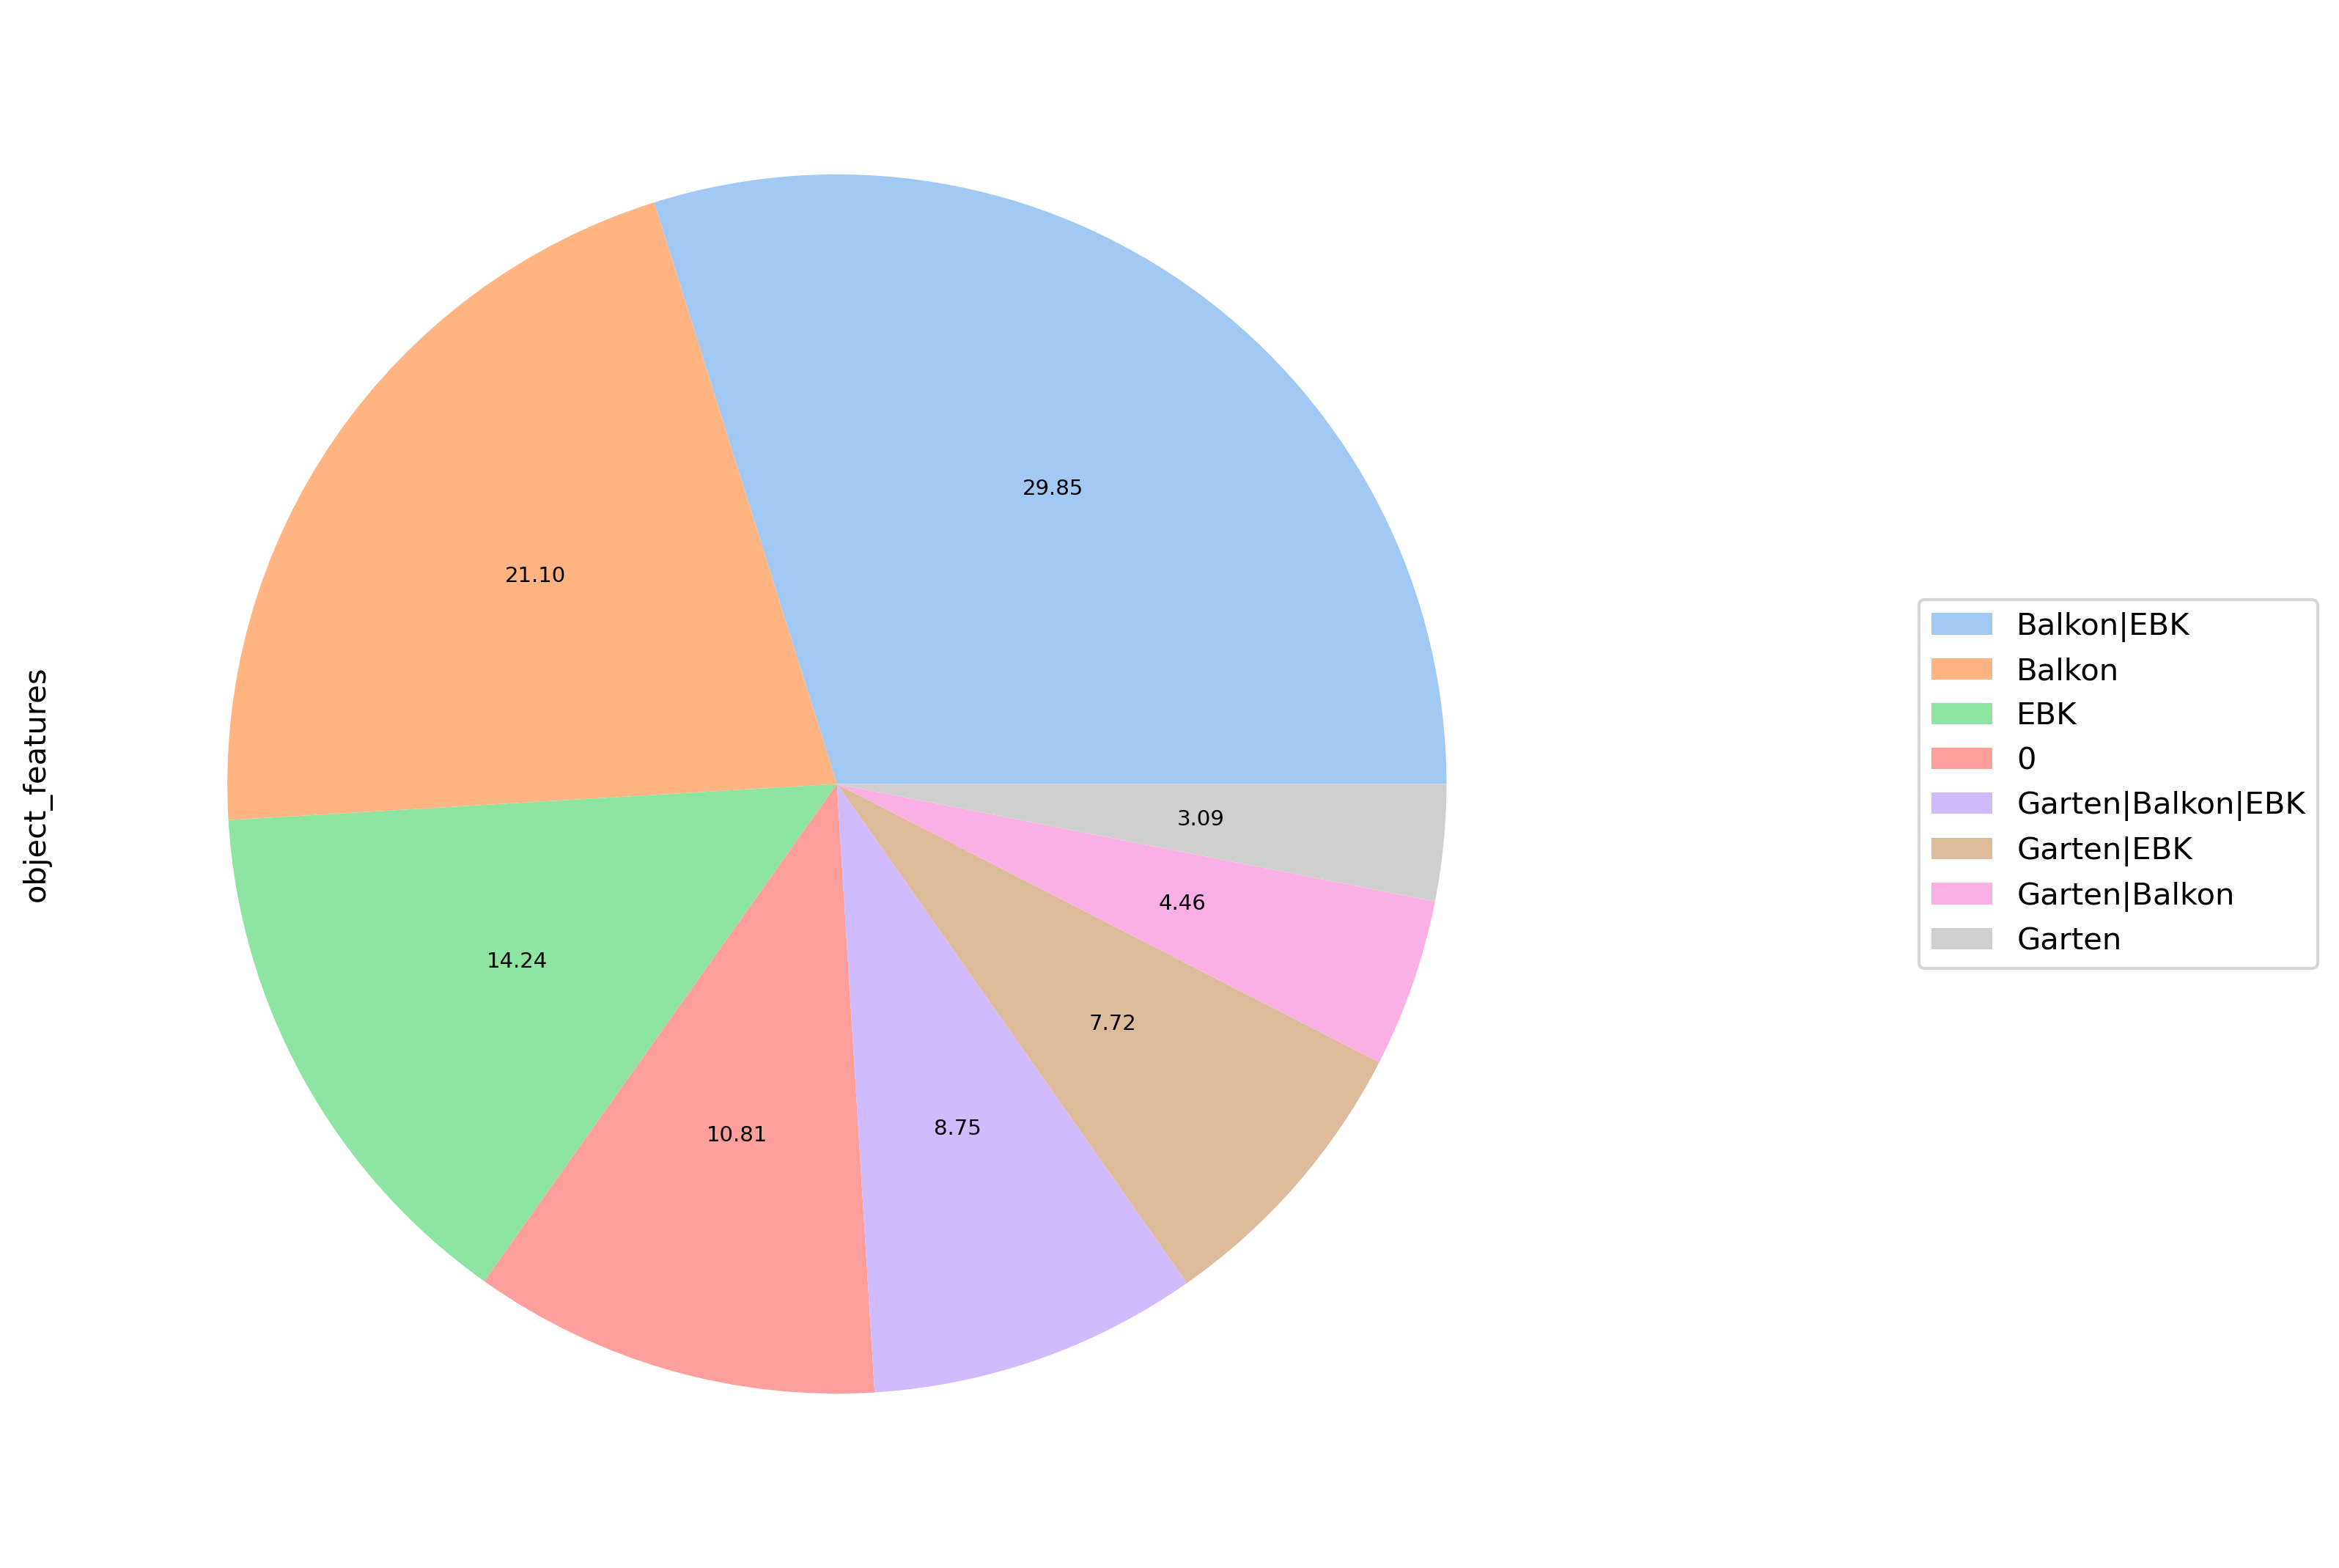

In [1164]:
plt.figure(figsize=(9,9))
colors = sns.color_palette("pastel")[0:25]
df5["object_features"].value_counts(normalize=True).plot.pie(autopct="%.2f" ,fontsize=7, figsize=(10,7), 
                                                               subplots=True, labeldistance=None, legend=True, 
                                                             colors=colors)
plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
plt.show()

The values of this column aren´t that spreaded like the values of "object_district". The values here are similar to "object_objektart_sub", except that here not so many "niche" values.
Most of the rentable flats have a equipped kitchen (>68%). Also, most of the flats have a balcony (73%). It´s unusual that almost 15% of the data have a garden and balcony. this can only be possible if it is a two storey house. I´m not sure if there are so many rentable houses in Munich. One option to check this is to look at the square meter of this sepecific data. If its bigger the 120m^2 than its probably a house. If not, it can be an error or the balcony could be a terrace.

In [1165]:
values_150sqm = []

In [1166]:
values_150sqm.append(df5[df5["object_features"] == "Garten|Balkon|EBK"][df5
                                                   [df5["object_features"] == "Garten|Balkon|EBK"]
                                                   ["object_area"]>=150]["object_area"].tolist())

In [1167]:
values_150sqm.append(df5[df5["object_features"] == "Garten|Balkon"][df5
                                                   [df5["object_features"] == "Garten|Balkon"]
                                                   ["object_area"]>=150]["object_area"].tolist())

In [1168]:
values_150sqm

[[565.97, 151.48, 176.0, 194.0], [151.38]]

In [1169]:
len(values_150sqm[0])+len(values_150sqm[1])

5

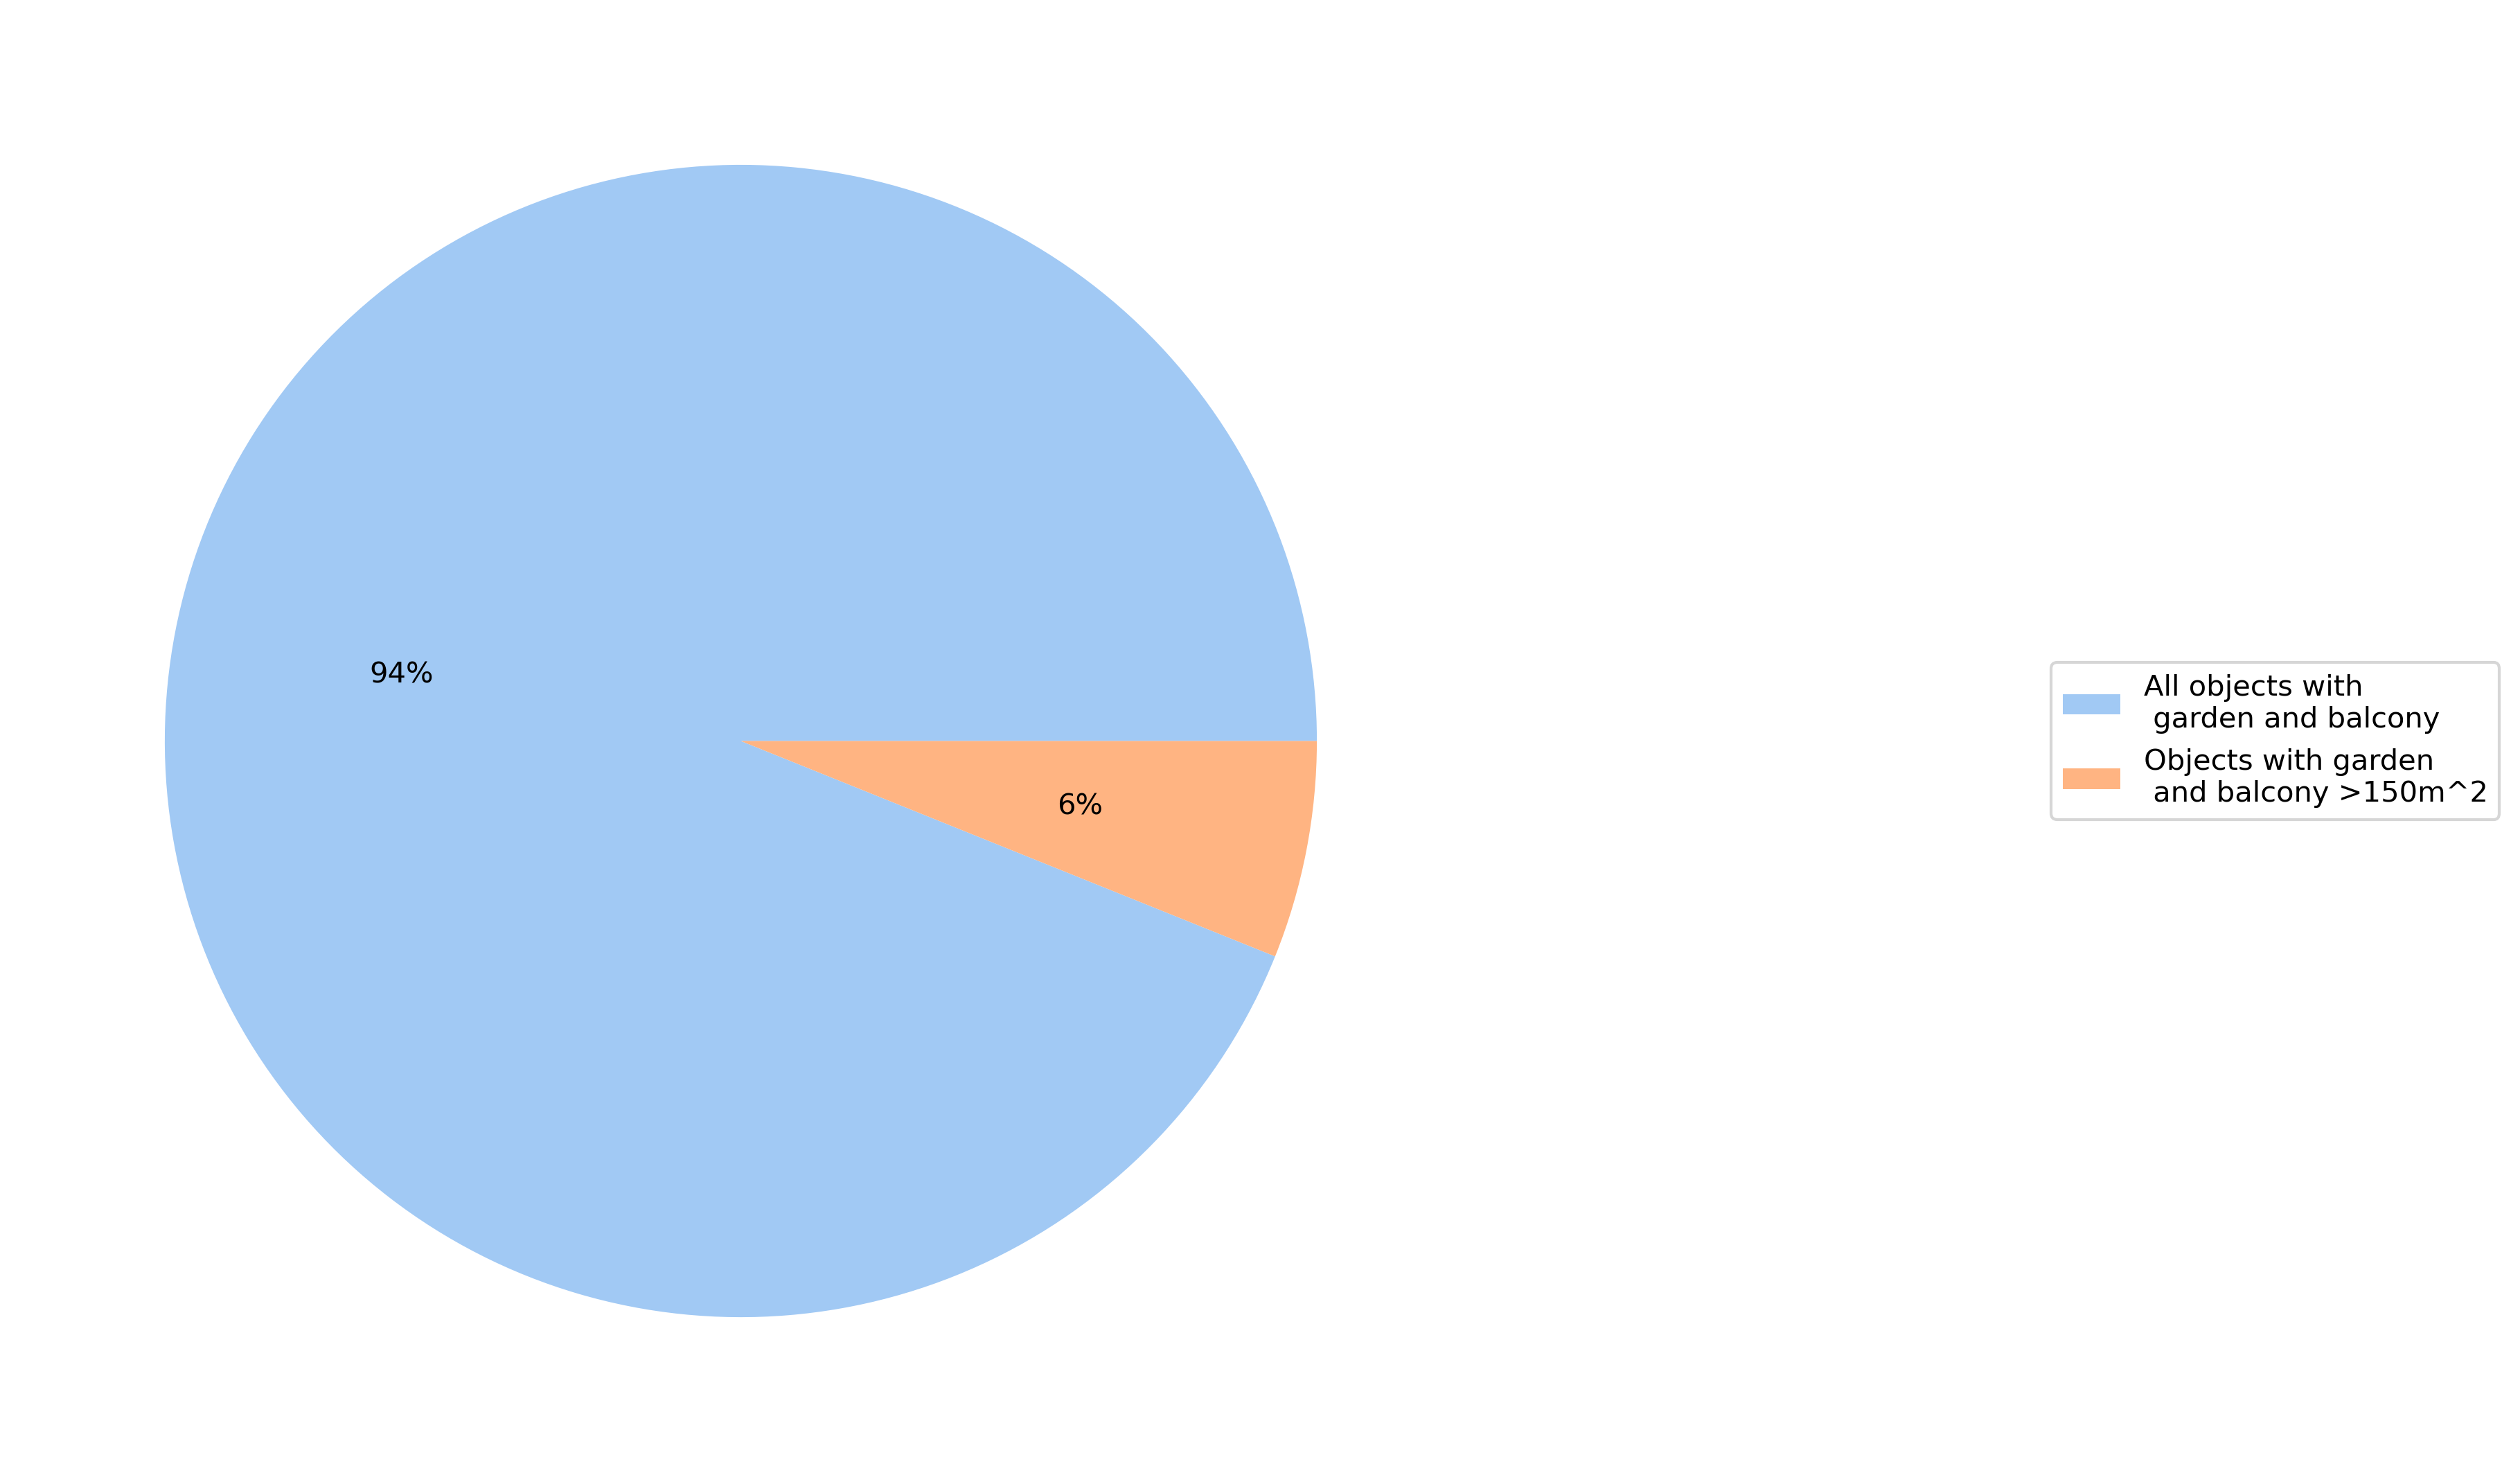

In [1170]:
label=["All objects with \n garden and balcony", "Objects with garden \n and balcony >150m^2"]
frequency = [len(df5[df5["object_features"] == "Garten|Balkon|EBK"])+len(df5[df5["object_features"]
        == "Garten|Balkon"]), len(values_150sqm[0])+len(values_150sqm[1])]
plt.figure(figsize=(9,9))
colors = sns.color_palette("pastel")[0:25]
plt.pie(frequency, labels = label, colors = colors, autopct='%.0f%%', labeldistance=None)
plt.legend(loc='center left', bbox_to_anchor=(1.4, 0.5))
plt.show()

Now it´s obviouse that there are just few data, which can to be considered as a house. That´s why my guess is that the balconies with garden are probably terraces. 

This thesis is supported through the following dataframe:

In [1171]:
df5[df5["object_objektart_sub"] == "ERDGESCHOSS"].iloc[:20,3:7]

object_area                           object_district    object_features  \
3          49.46  Thalk.Obersendl.-Forsten-Fürstenr.-Solln                  0   
16         60.00                     Neuhausen-Nymphenburg         Balkon|EBK   
44        122.00                               Obergiesing  Garten|Balkon|EBK   
55         25.00                        Ramersdorf-Perlach         Garten|EBK   
57         33.65                                  Sendling             Balkon   
87         47.35  Thalk.Obersendl.-Forsten-Fürstenr.-Solln                EBK   
100        61.10  Thalk.Obersendl.-Forsten-Fürstenr.-Solln         Balkon|EBK   
103        55.48  Thalk.Obersendl.-Forsten-Fürstenr.-Solln                  0   
104        36.00                               Bogenhausen                EBK   
138        45.79  Thalk.Obersendl.-Forsten-Fürstenr.-Solln      Garten|Balkon   
142        52.60                            Trudering-Riem         Garten|EBK   
171        60.89                            Schwabing-West                EBK   
199        67.99                     Neuhausen-Nymphenburg         Balkon|EBK   
200        76.64  Thalk.Obersendl.-Forsten-Fürstenr.-Solln             Garten   
202        43.60                          Schwanthalerhöhe         Balkon|EBK   
206        62.33                Aubing-Lochhausen-Langwied         Garten|EBK   
210        73.00                        Pasing-Obermenzing             Garten   
211        65.38                              Berg am Laim             Garten   
214        59.89                                   Moosach         Garten|EBK   
222        45.16                          Schwanthalerhöhe                EBK   

    object_objektart_sub  
3            ERDGESCHOSS  
16           ERDGESCHOSS  
44           ERDGESCHOSS  
55           ERDGESCHOSS  
57           ERDGESCHOSS  
87           ERDGESCHOSS  
100          ERDGESCHOSS  
103          ERDGESCHOSS  
104          ERDGESCHOSS  
138          ERDGESCHOSS  
142          ERDGESCHOSS  
171          ERDGESCHOSS  
199          ERDGESCHOSS  
200          ERDGESCHOSS  
202          ERDGESCHOSS  
206          ERDGESCHOSS  
210          ERDGESCHOSS  
211          ERDGESCHOSS  
214          ERDGESCHOSS  
222          ERDGESCHOSS

The are flats with the feature "ERDGESCHOSS" (which implies that the flat is in the first floor) which have a "Balkon" (belcony). The value with the id 57 has also a such small living area, that it is impossible that this flat has a secound floor. 

# 2.4. Relationship Categorical and Numeric Features

Now, I look at the relationship between the categorical features.

# 2.4.1. Feature "object_district"

One toole therefore is to boxplot the variables.
I start with the categorical feature "object_district".

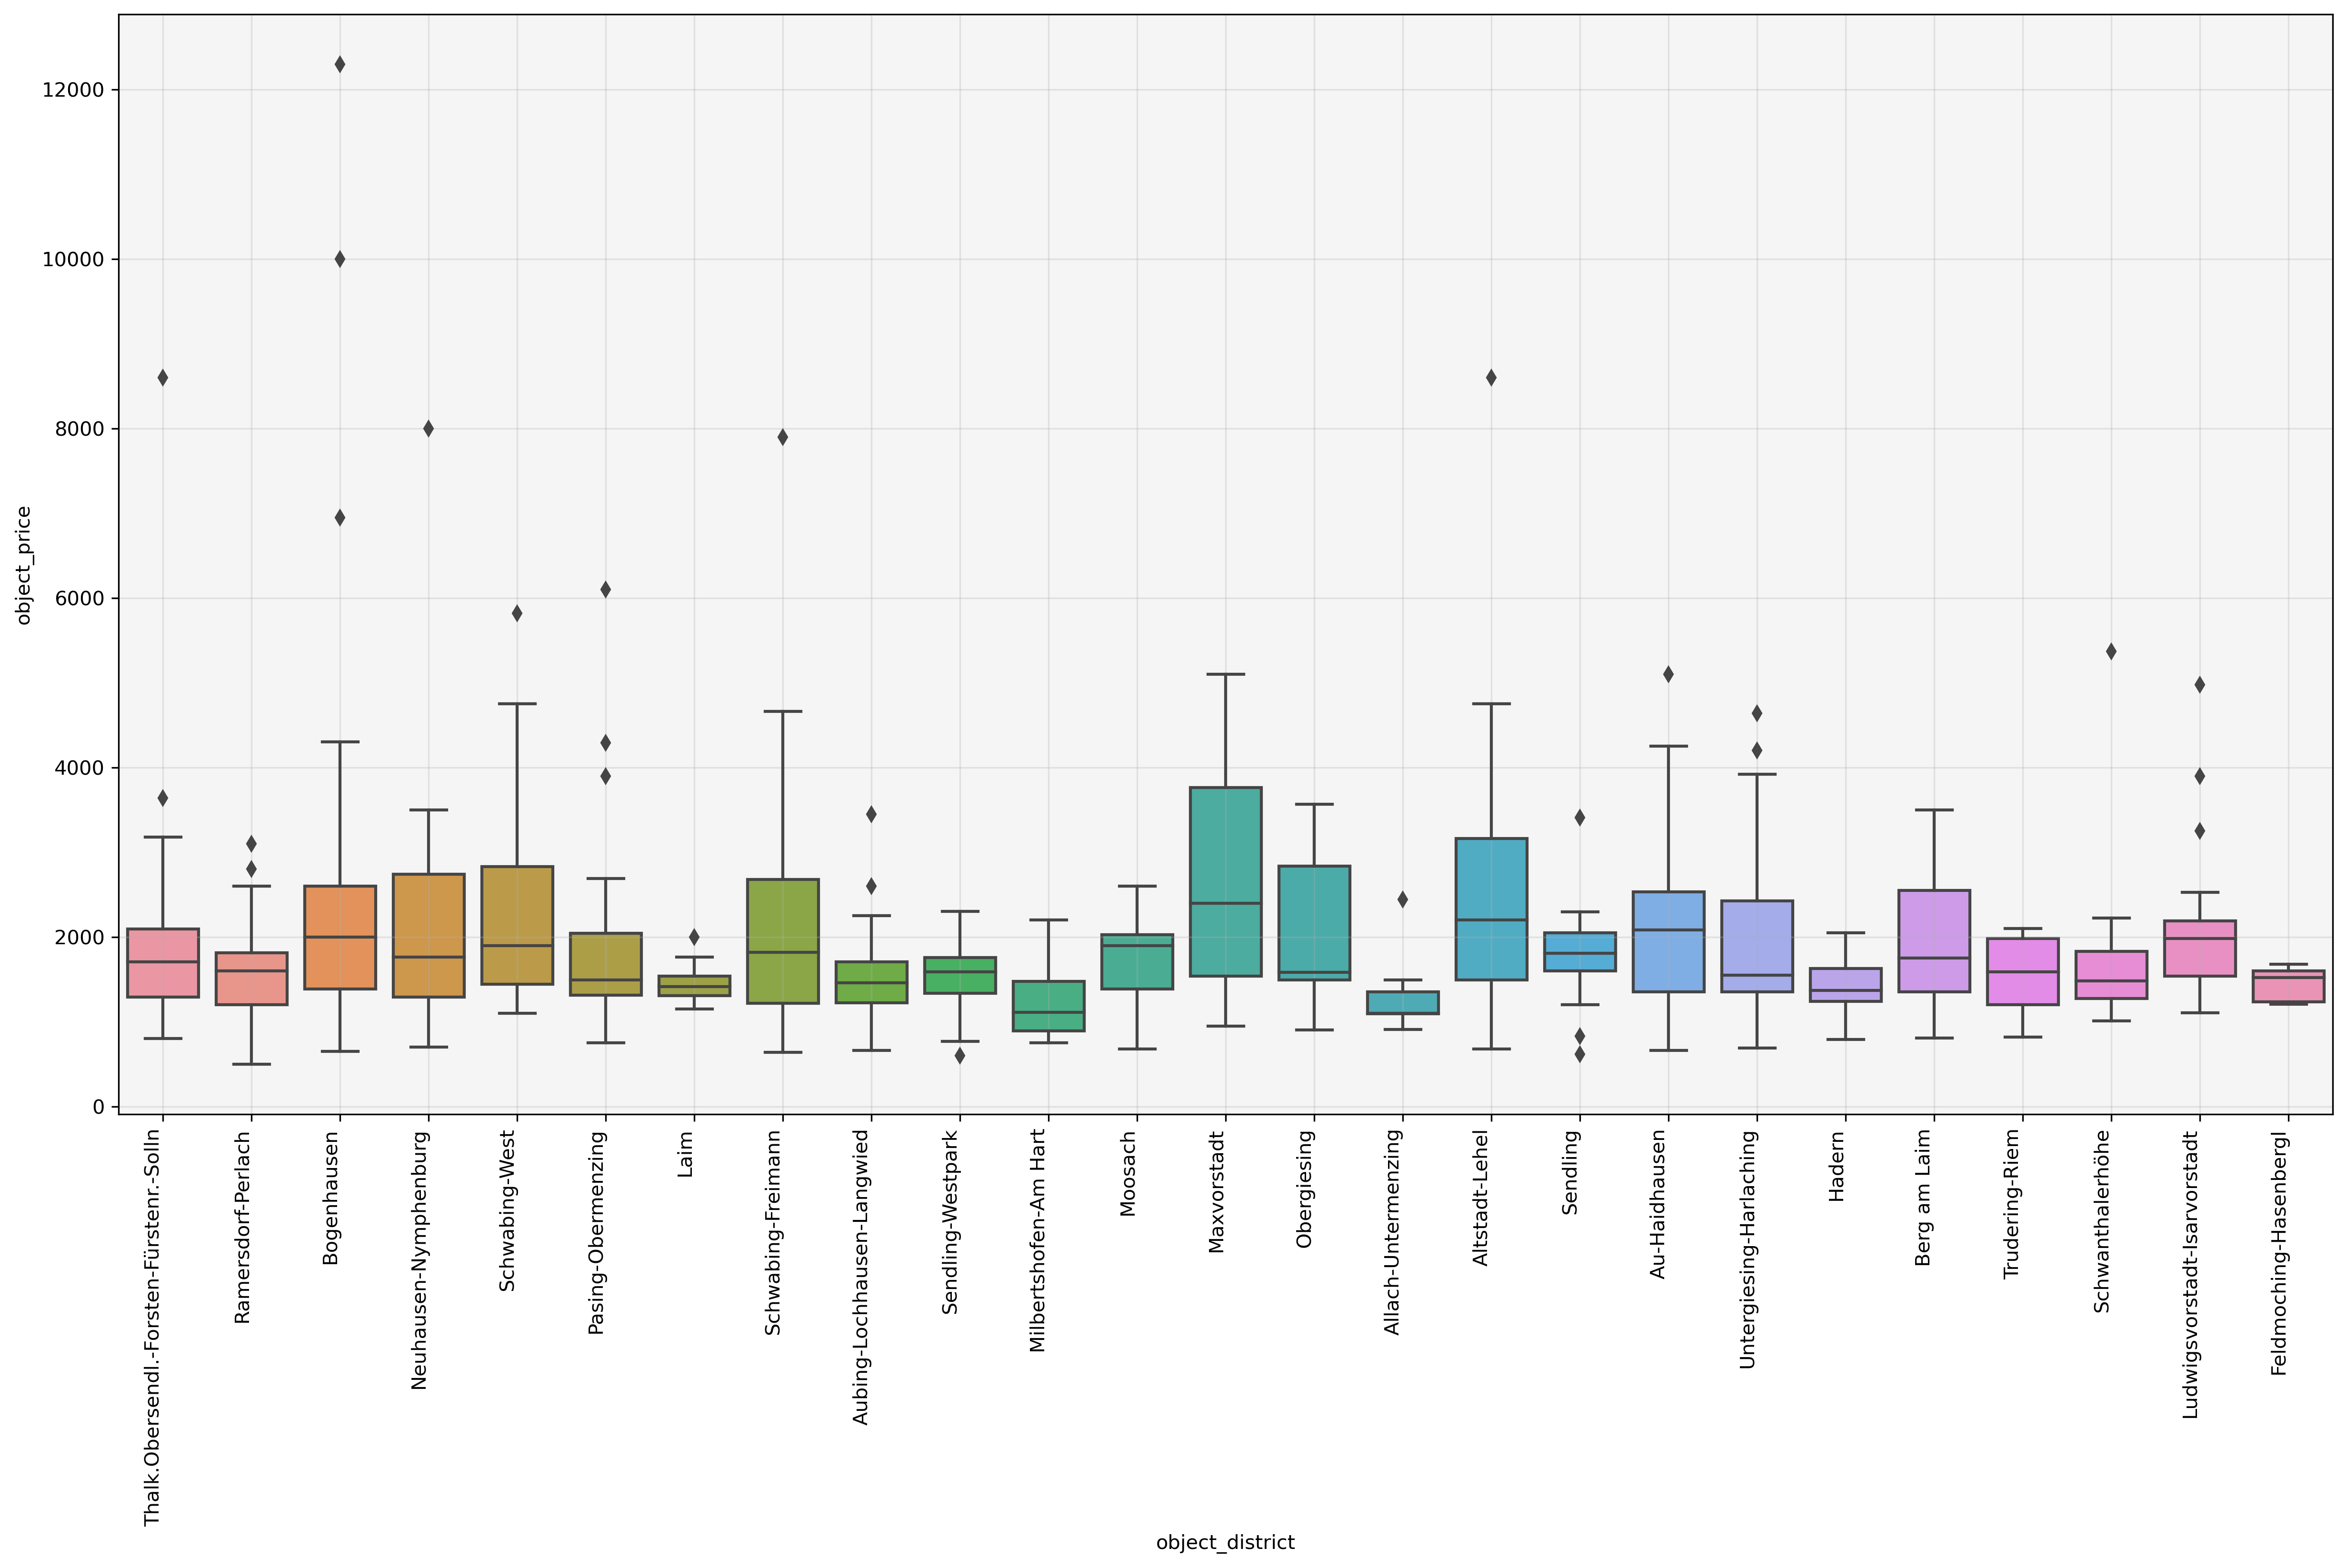

In [1172]:
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.boxplot(data = df5, x = 'object_district', y = 'object_price')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.show()

- The Box-Plot shows that rentable flats in the districts of "Maxvorstadt" and "Altstadt-Lehel" will be definitly more expensive then rentable flats in the district "Allach-Untermenzing" or "Feldmoching-Hasenbergl". The problem here is that there is no clearly distance of one kind of districts to another kind of district, because the rest of the districts have a strong overlap. A splitting of the district data makes hence no sense.
- I see, that there are a lot of outlier with a flat price of more then 4000€. A further analysis should be done to understand if this are really outlier. For example I can look at the price per square meter and compare it with the mean of the district. This will be done in the analysis of the numerice features.
- It seems like that the rent at cheaper districts vary not as much as the pricy ones. To verify this hypthesis I need to dive deeper in this topic. Therefore I need to plot the standard deviation on the mean square meter price of each district.


In [1173]:
def get_mean_std_districts(df):
    list_mean_sqt =[]
    list_std_ads = []
    unique_values = df["object_district"].unique().tolist()
    for i in unique_values:
        df_new = df.iloc[np.where(df["object_district"]==i)]
        if len(df_new["prices_per_square_meter"].tolist()) != 0:
            list_mean_sqt.append(df_new["prices_per_square_meter"].mean())
            list_std_ads.append(df_new["object_price"].std())
    return list_mean_sqt, list_std_ads

In [1201]:
x, y = get_mean_std_districts(df5)

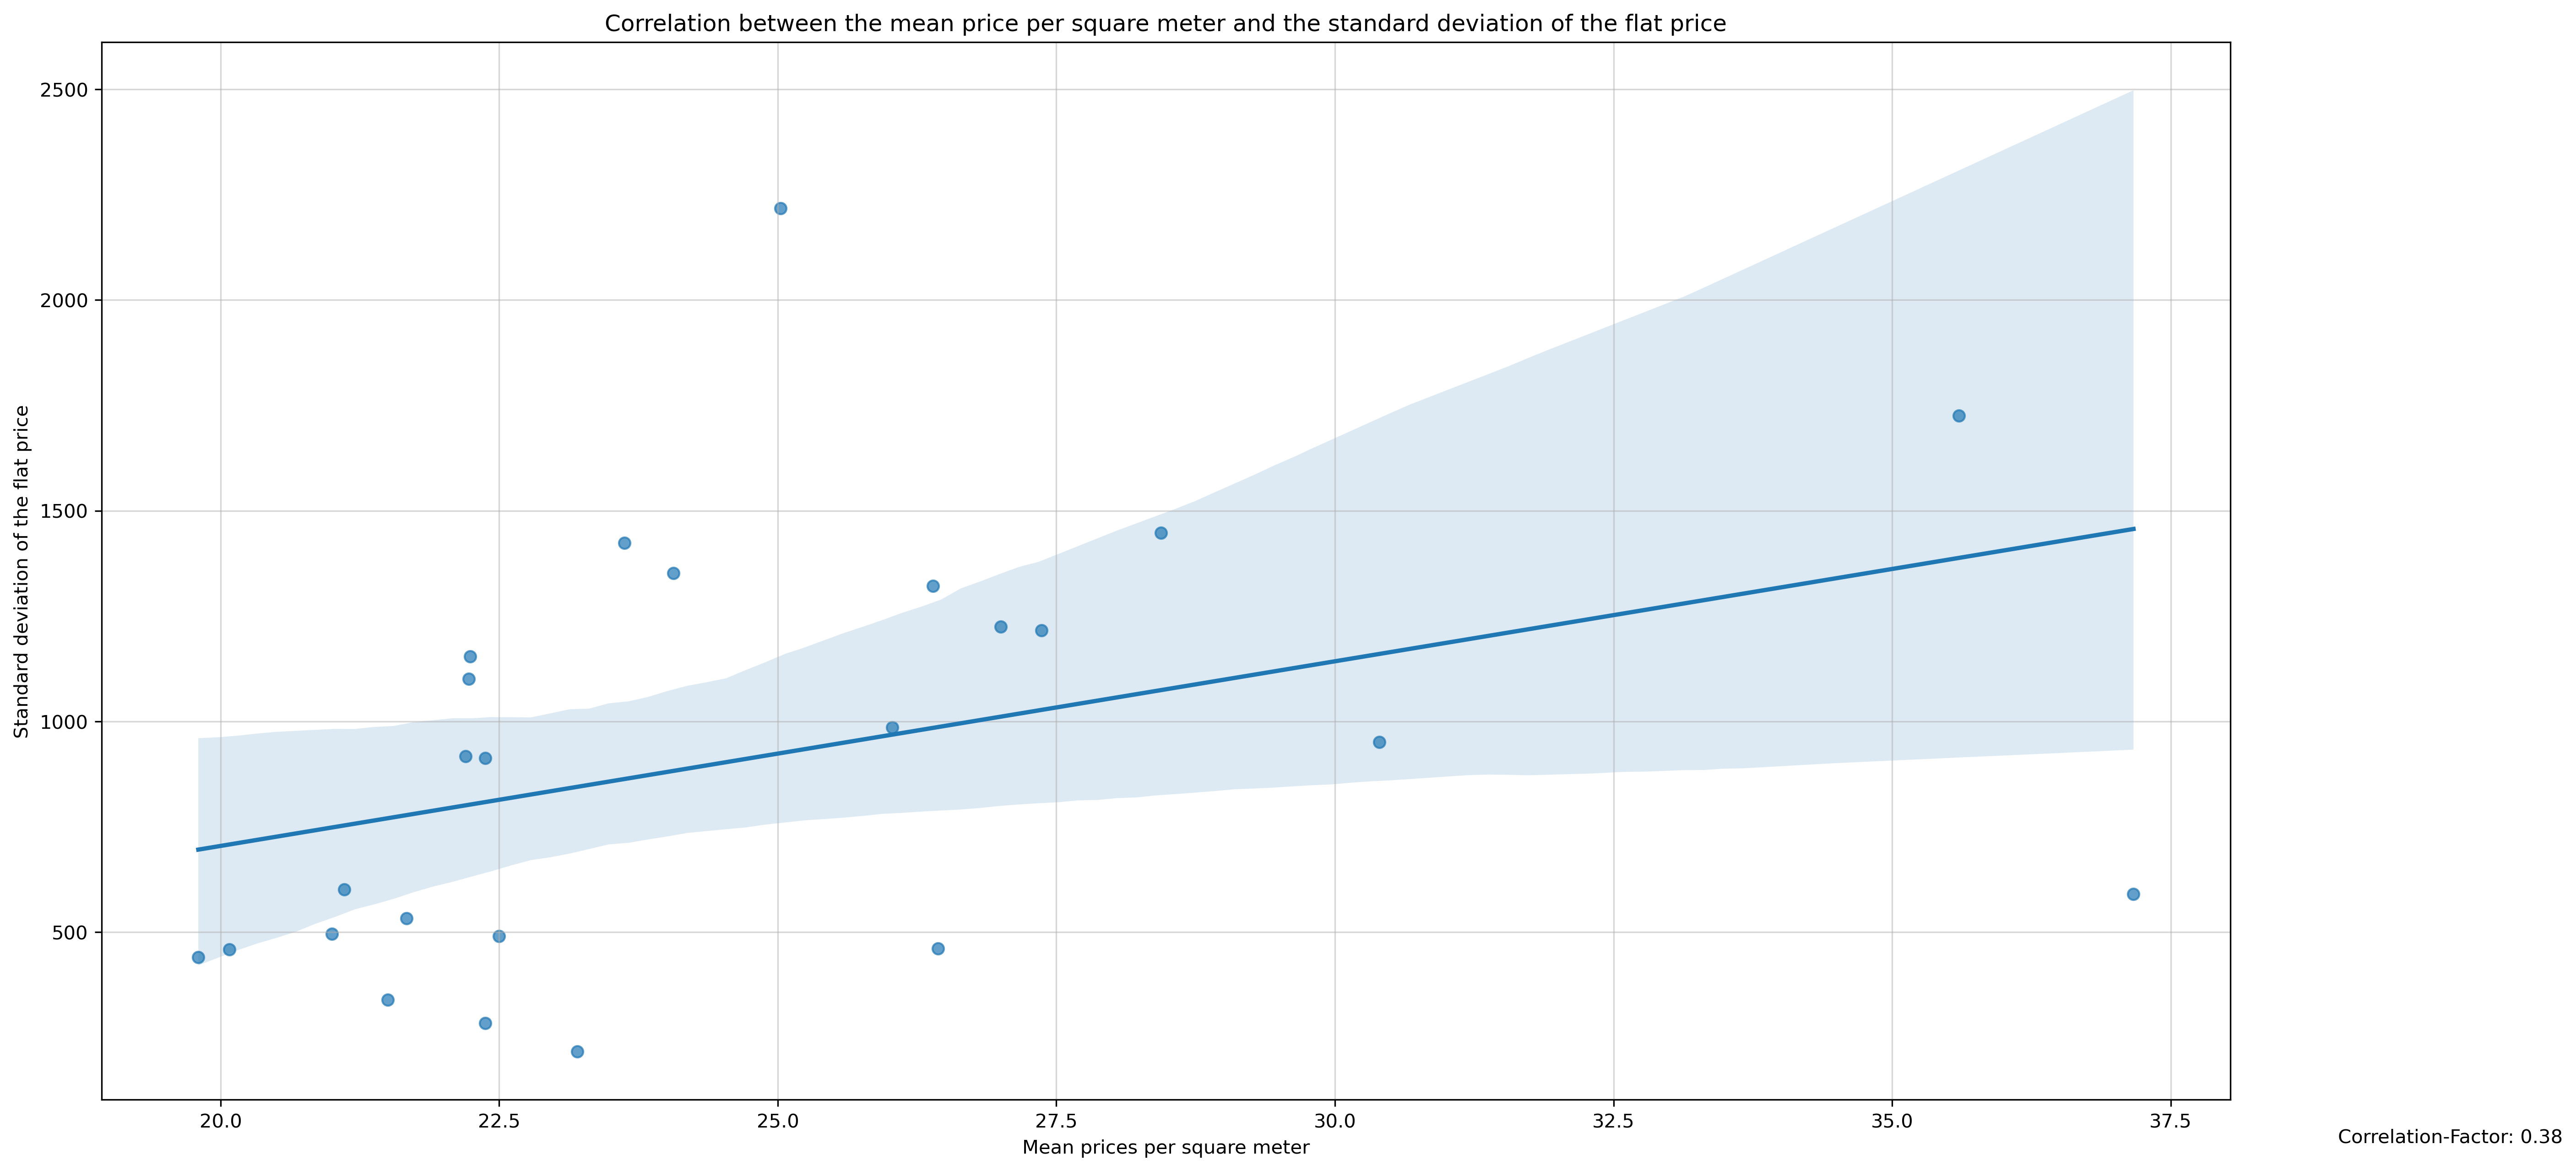

In [1215]:
plt.figure(figsize=(20,10))
plt.grid(alpha=0.5)
ax.set_facecolor("whitesmoke")
plt.title("Correlation between the mean price per square meter and the standard deviation of the flat price")
plt.text(39, 1, 'Correlation-Factor: '+str(round(np.corrcoef(x,y)[1][0],2)))
plt.ylabel("Standard deviation of the flat price")
plt.xlabel("Mean prices per square meter")
sns.regplot(x, y, scatter_kws={'alpha':0.7}, ci=95)
plt.show()

The visualization makes it clear that there is a light correlation between the mean price per square meter and the flat price standard deviation  of each district. That tells me that the more expensive the district is, the more the rent price tend to vary. The rent price per square meter is in cheaper districts more similar. 

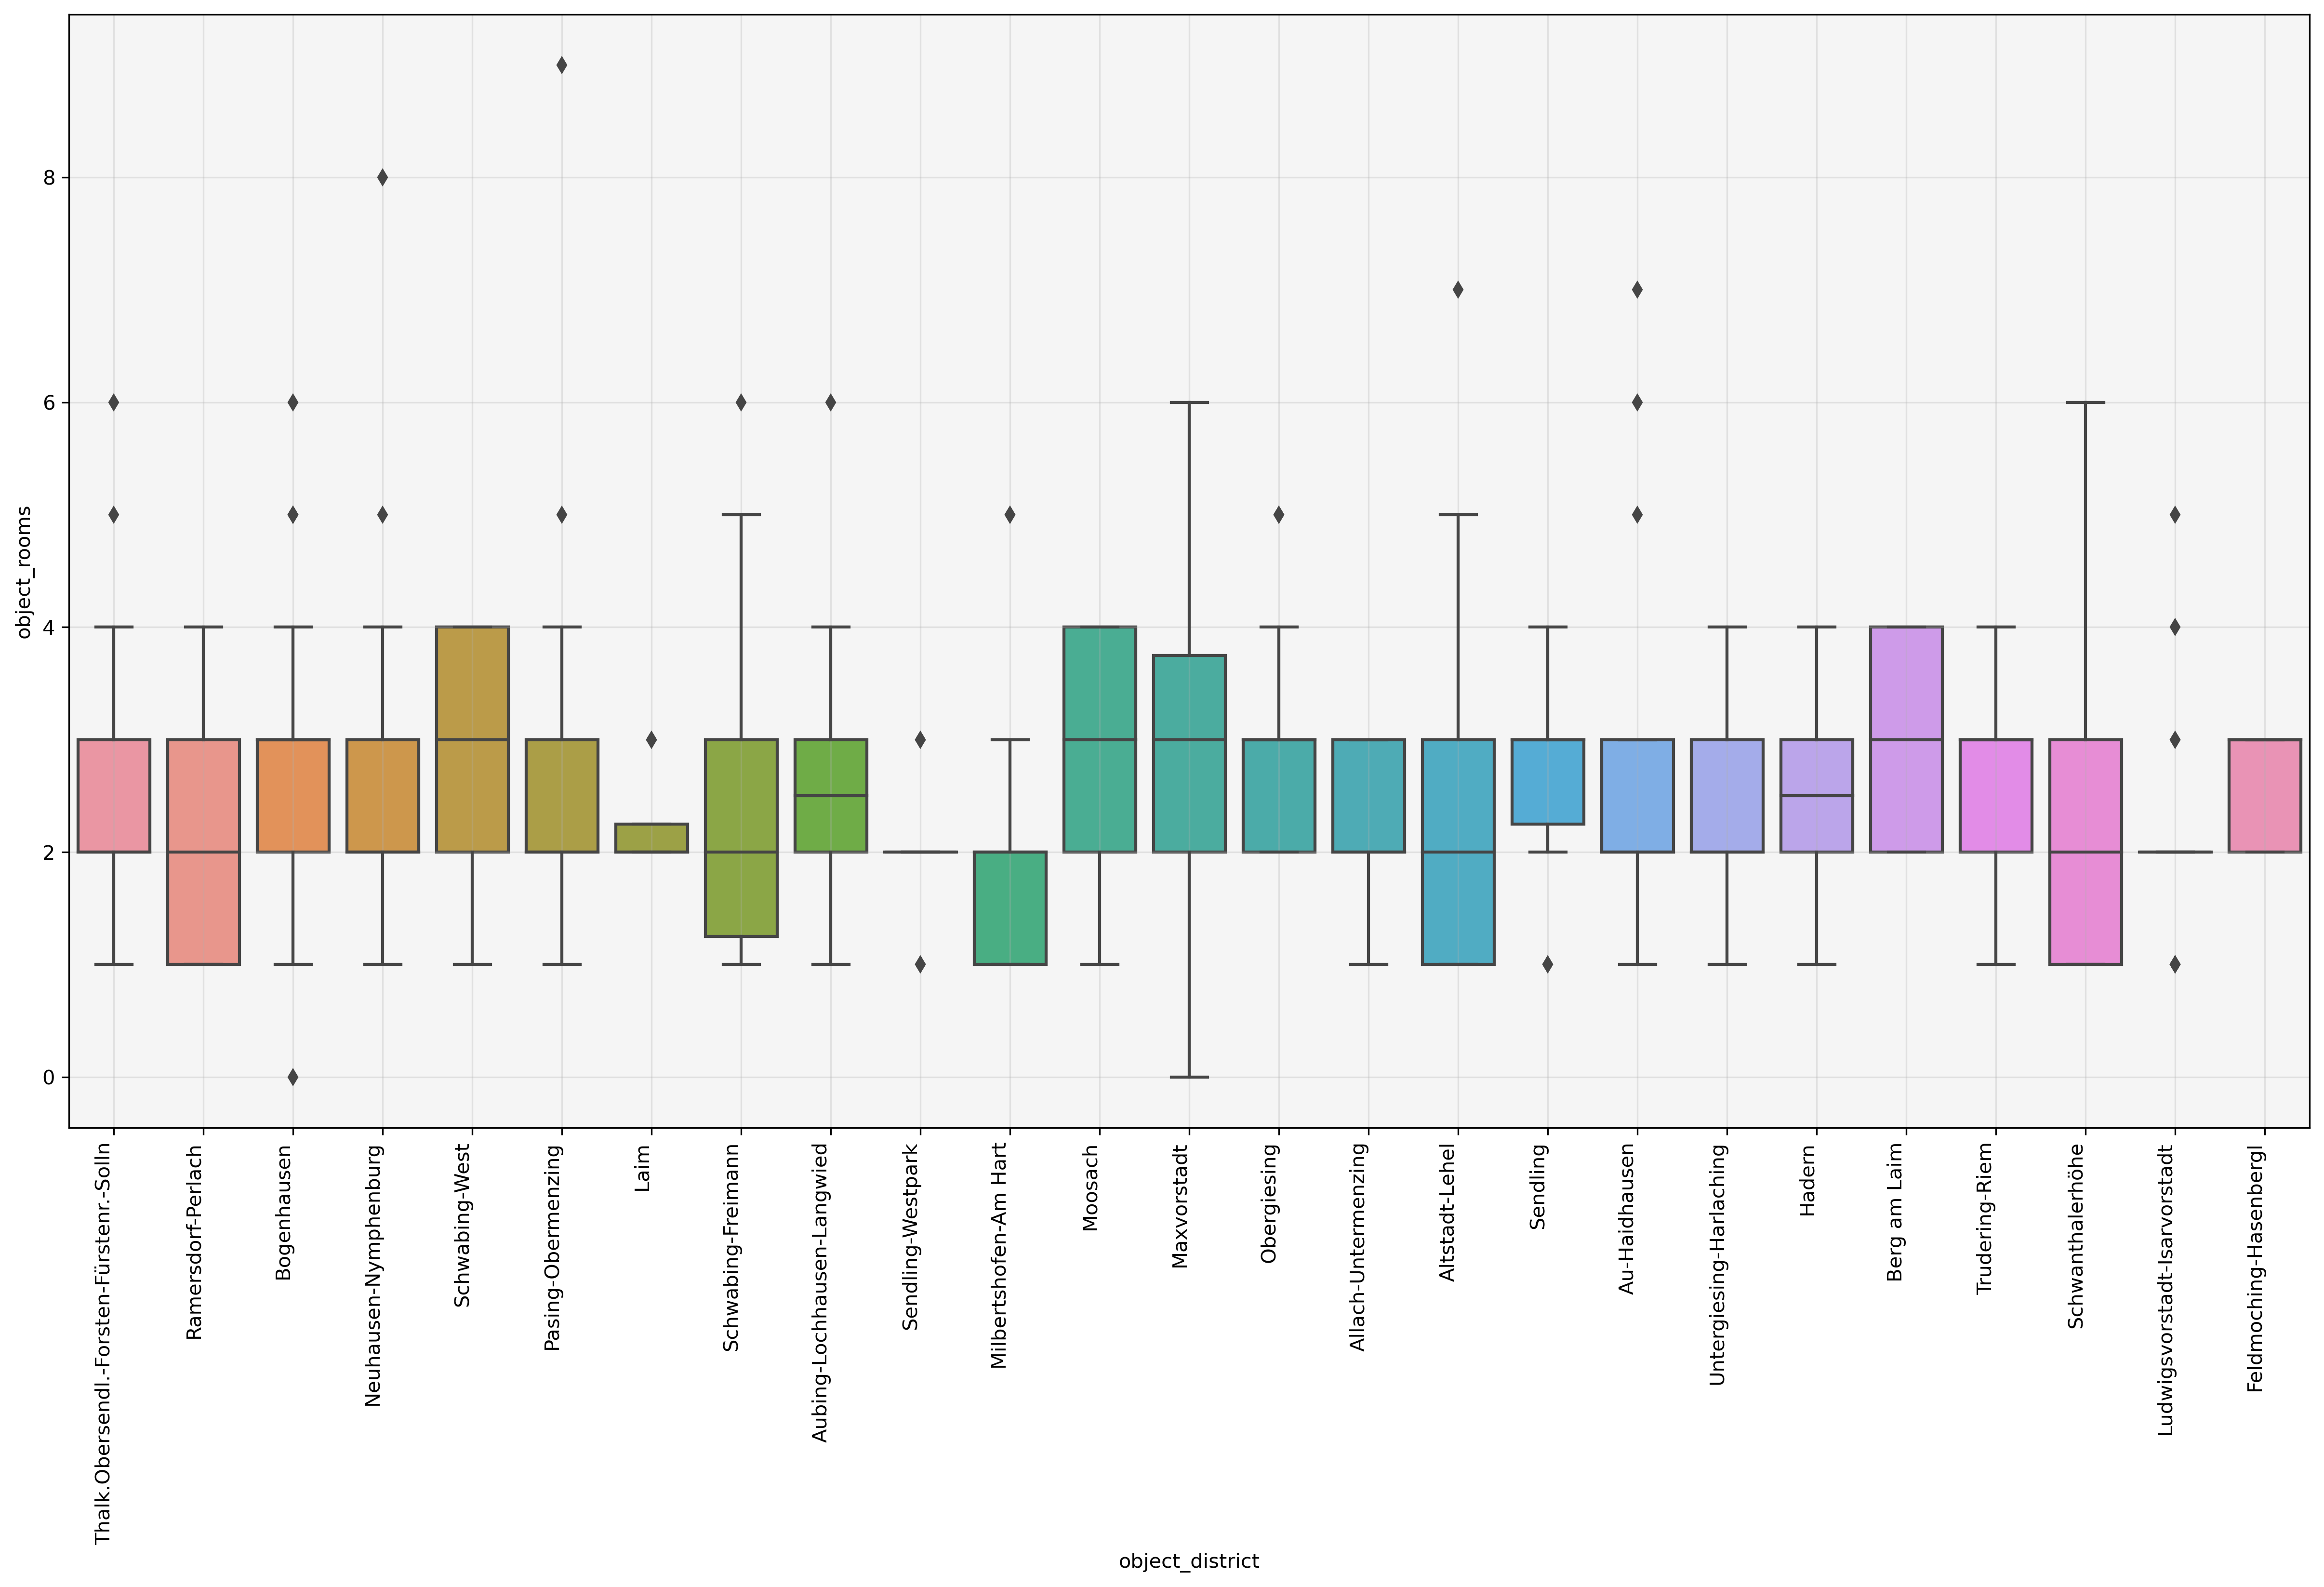

In [1176]:
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.boxplot(data = df5, x = 'object_district', y = 'object_rooms')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.show()

- In this box plot I can see that some districts have a very low or respectively no deviation in the number of rooms (e.g. Sendling-Westpark, Laim). On the first glimp this looks like that in this districts are offered flats with just 2 rooms.
- Most of the districts have a big overlap of the number of rooms. One exception is the district "Milbertshofen-Am Hart". Here the districts tend to be smaller then in other districts. 
- The plots of "Maxvorstadt" and "Schwanthalerhöhe" have the most spread in the number of rooms. This means that in this districts you can finde flats in many different room sizes.  
- There is a flat with zero rooms. This is a outlier and should be removed. This will be done in the analysis of the numerice features.
- Also, there is a flat with 9 rooms. This will be further analysed in the numeric part of this EDA. 

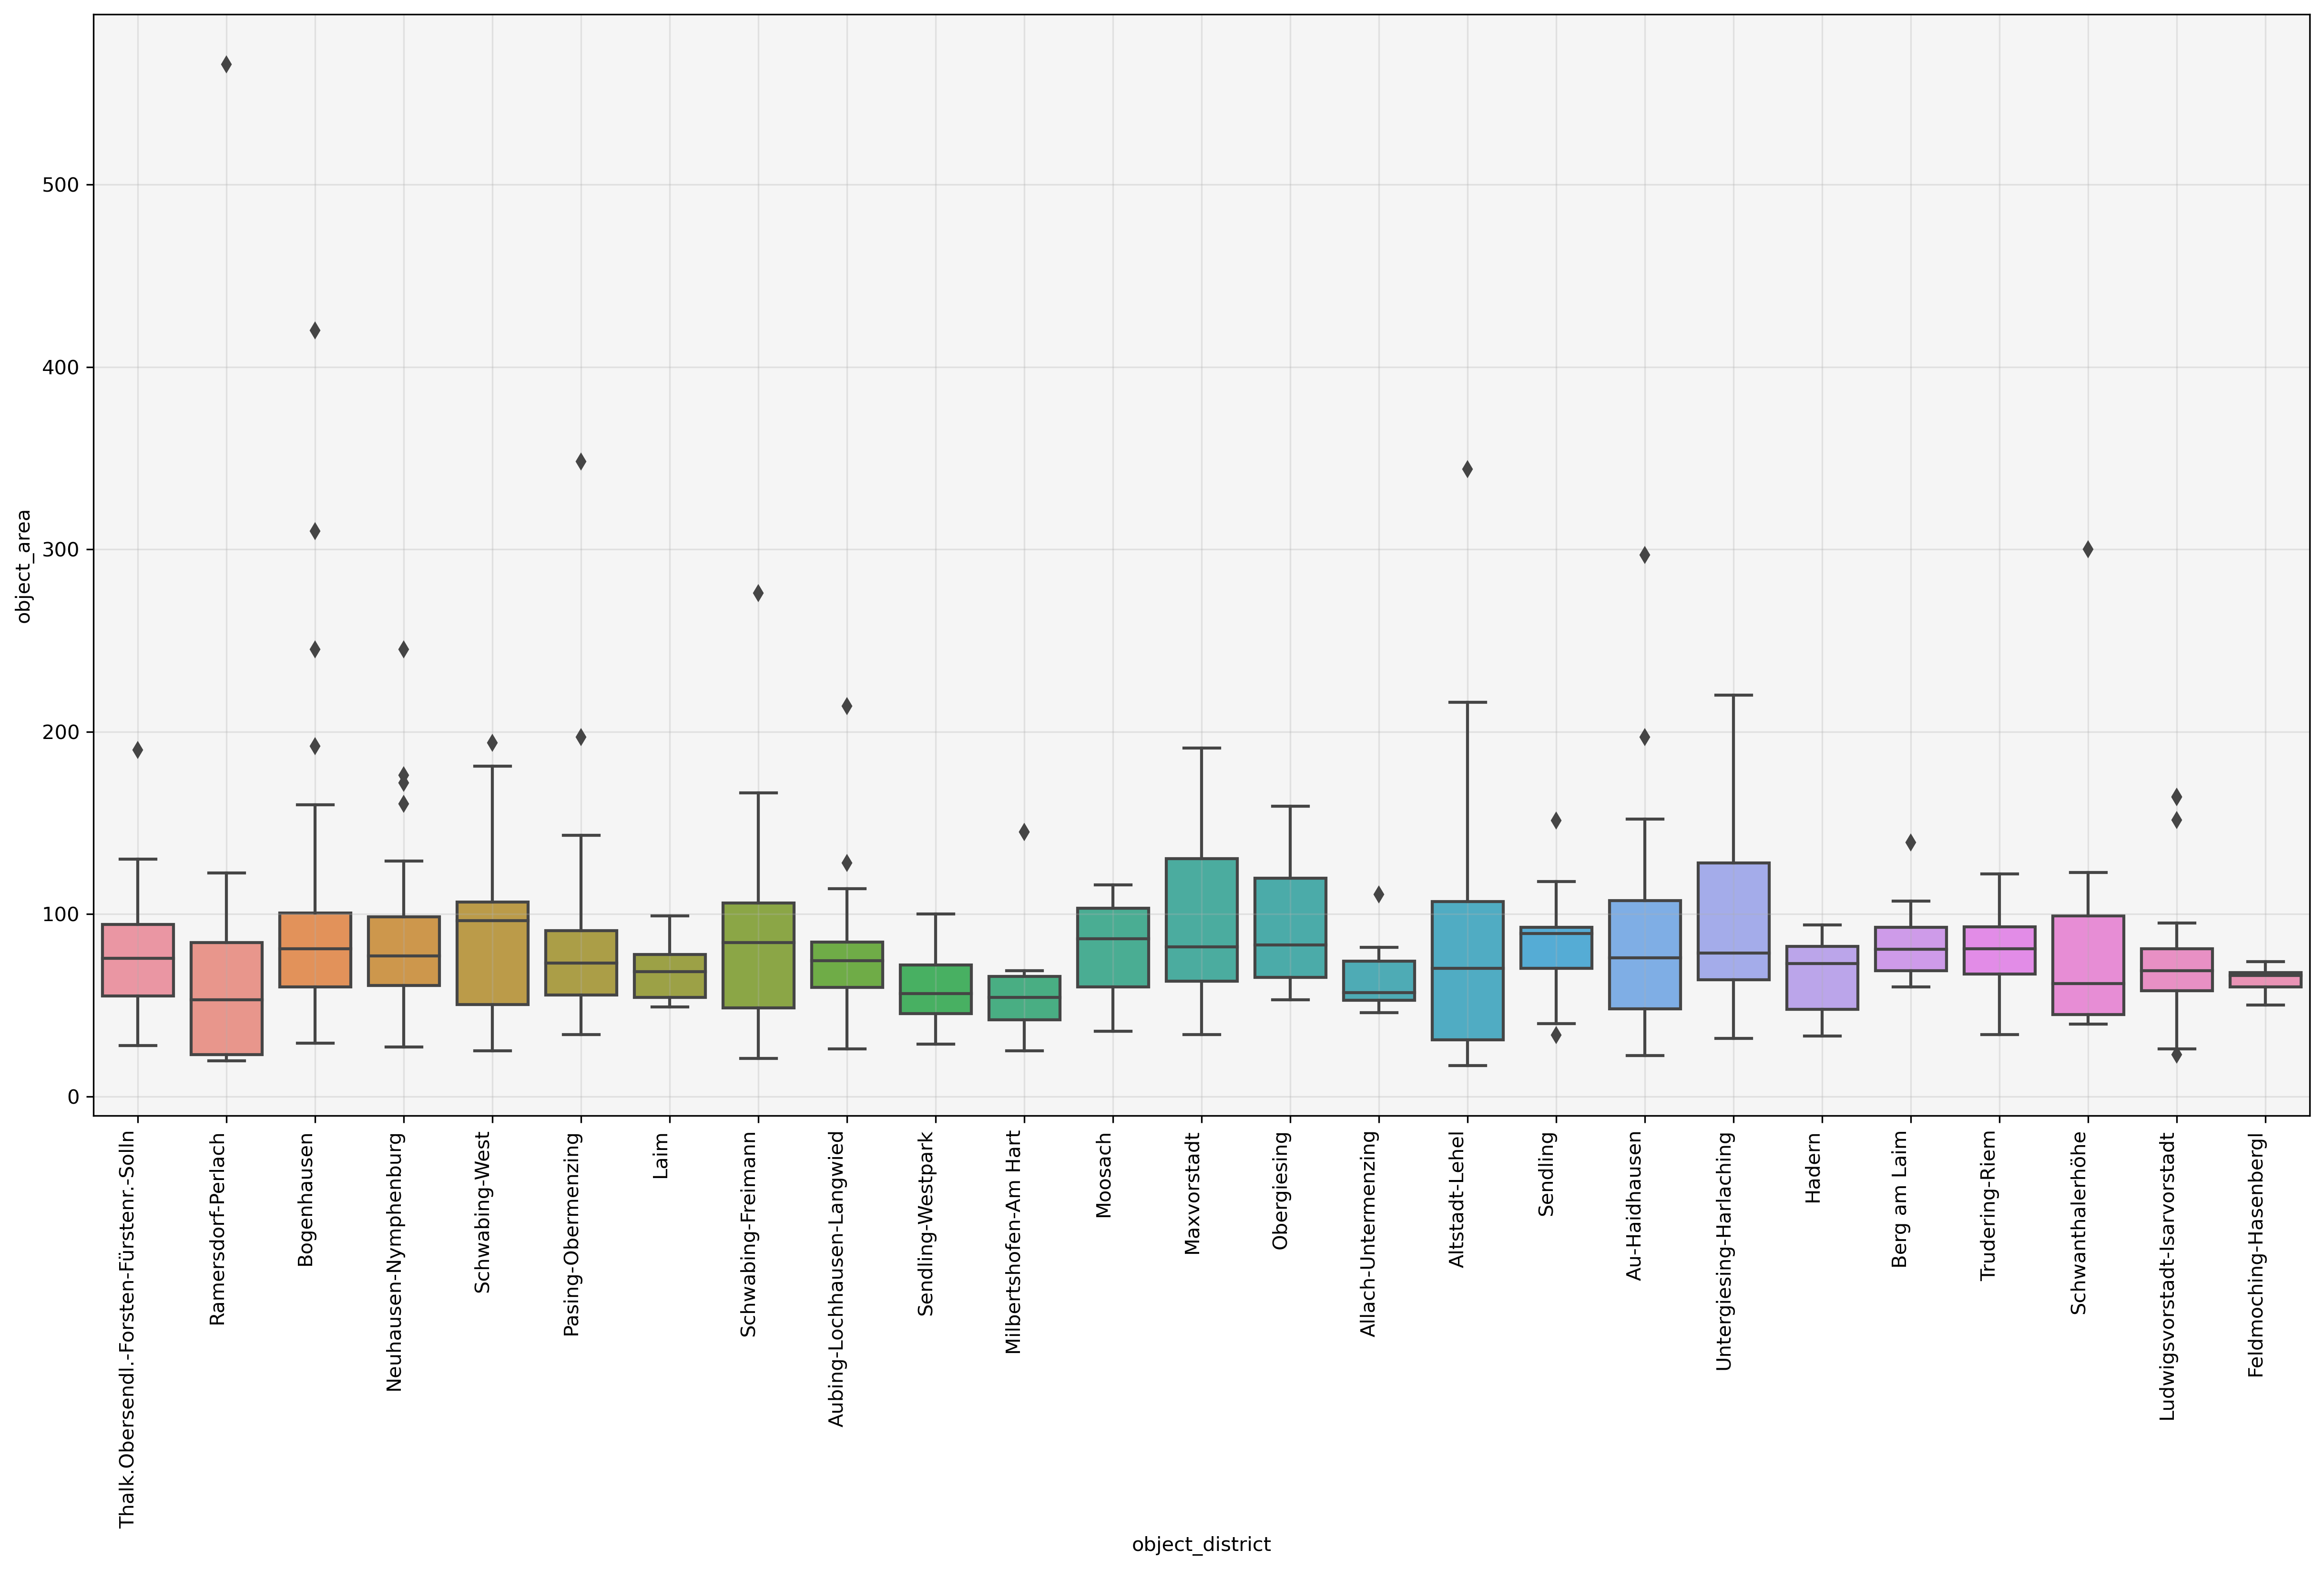

In [1177]:
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.boxplot(data = df5, x = 'object_district', y = 'object_area')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.show()

- I can see that there are alot of flats which are very big (>120m^2). This need to be further analyized. This will be done in the analysis of the numerice features.
- It´s seems like, that cheaper districts tend to have smaller flats. This needs also a further analyse.
- A splitting of the district data makes here no sense, because all districts have a overlap. That´s why one part of the data haven´t a correlation to the other part of the data. If there were a correlation a splitting could improve the performence of a machine learning model.

To get the Data of the mean of the price per square meter and the mean of the object area for each district I use a similar function like in the last analysis. 

In [1178]:
def get_mean_area_districts(df):
    list_mean_sqt =[]
    list_mean_area = []
    unique_values = df["object_district"].unique().tolist()
    for i in unique_values:
        df_new = df.iloc[np.where(df["object_district"]==i)]
        if len(df_new["prices_per_square_meter"].tolist()) != 0:
            list_mean_sqt.append(round(sum(df_new["prices_per_square_meter"].tolist())/len
                                       (df_new["prices_per_square_meter"].tolist()),2))
            list_mean_area.append(df_new["object_area"].mean())
    return list_mean_sqt, list_mean_area

In [1216]:
x, y = get_mean_area_districts(df5)

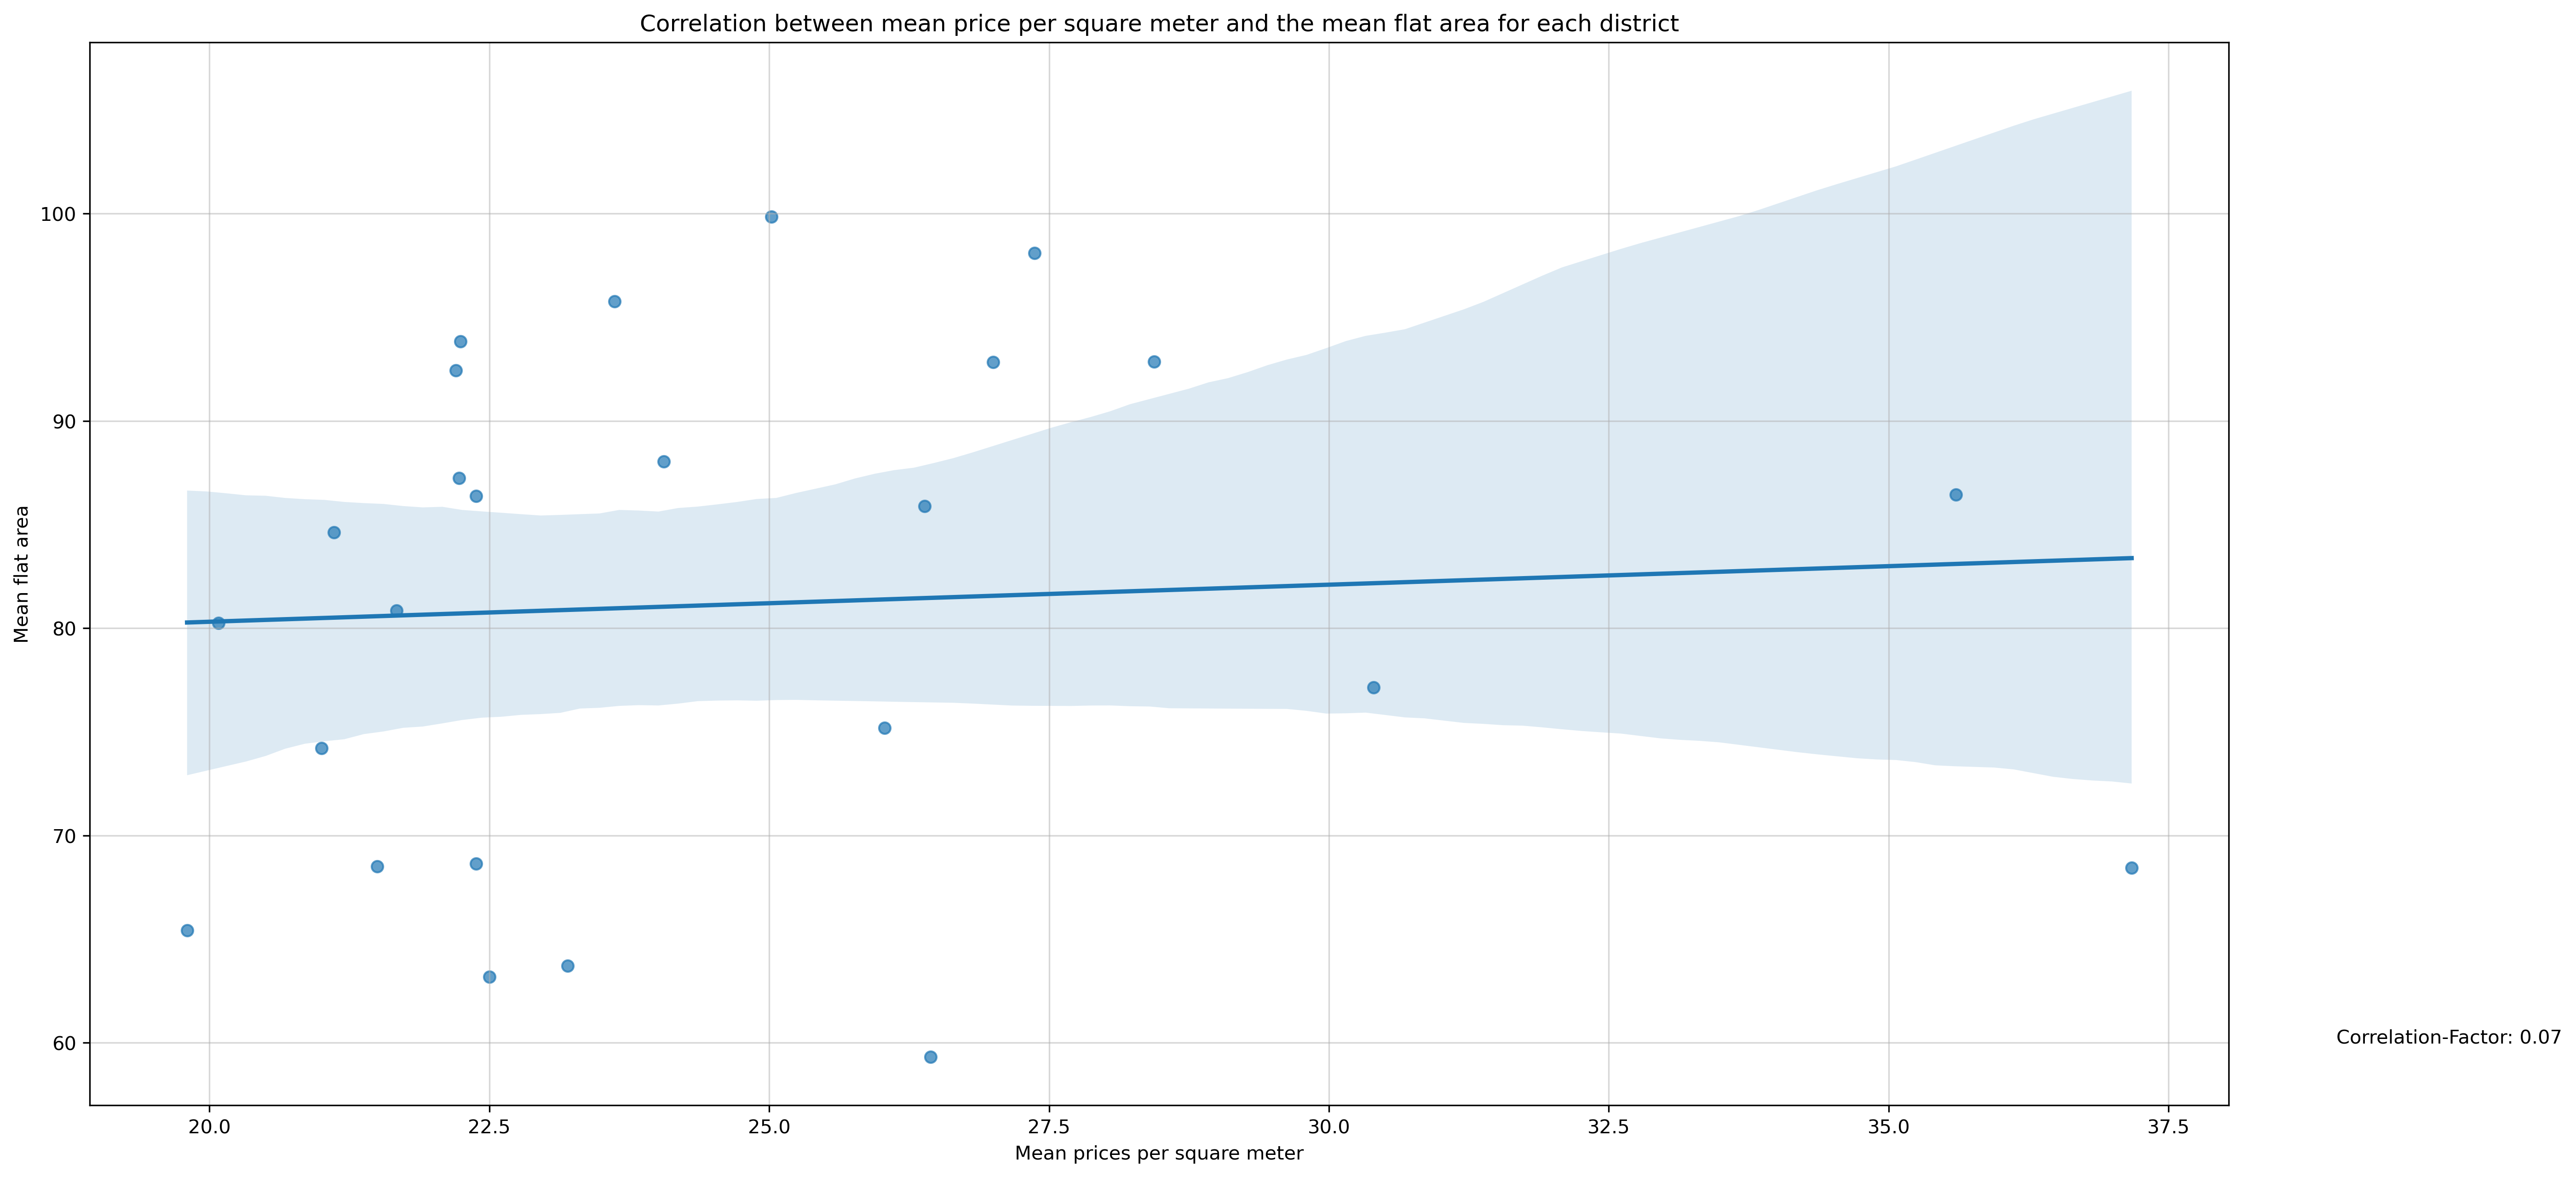

In [1217]:
plt.figure(figsize=(20,10))
plt.grid(alpha=0.5)
ax.set_facecolor("whitesmoke")
plt.title("Correlation between mean price per square meter and the mean flat area for each district")
plt.text(39, 60, 'Correlation-Factor: '+str(round(np.corrcoef(x,y)[1][0],2)))
plt.ylabel("Mean flat area")
plt.xlabel("Mean prices per square meter")
sns.regplot(x, y, scatter_kws={'alpha':0.7}, ci=95)
plt.show()

My hypothesis was completly wrong. There is no correlation between the expensiveness and their room size of a district.

# 2.4.2. Feature "object_feature"

The next feature is the "object_features".

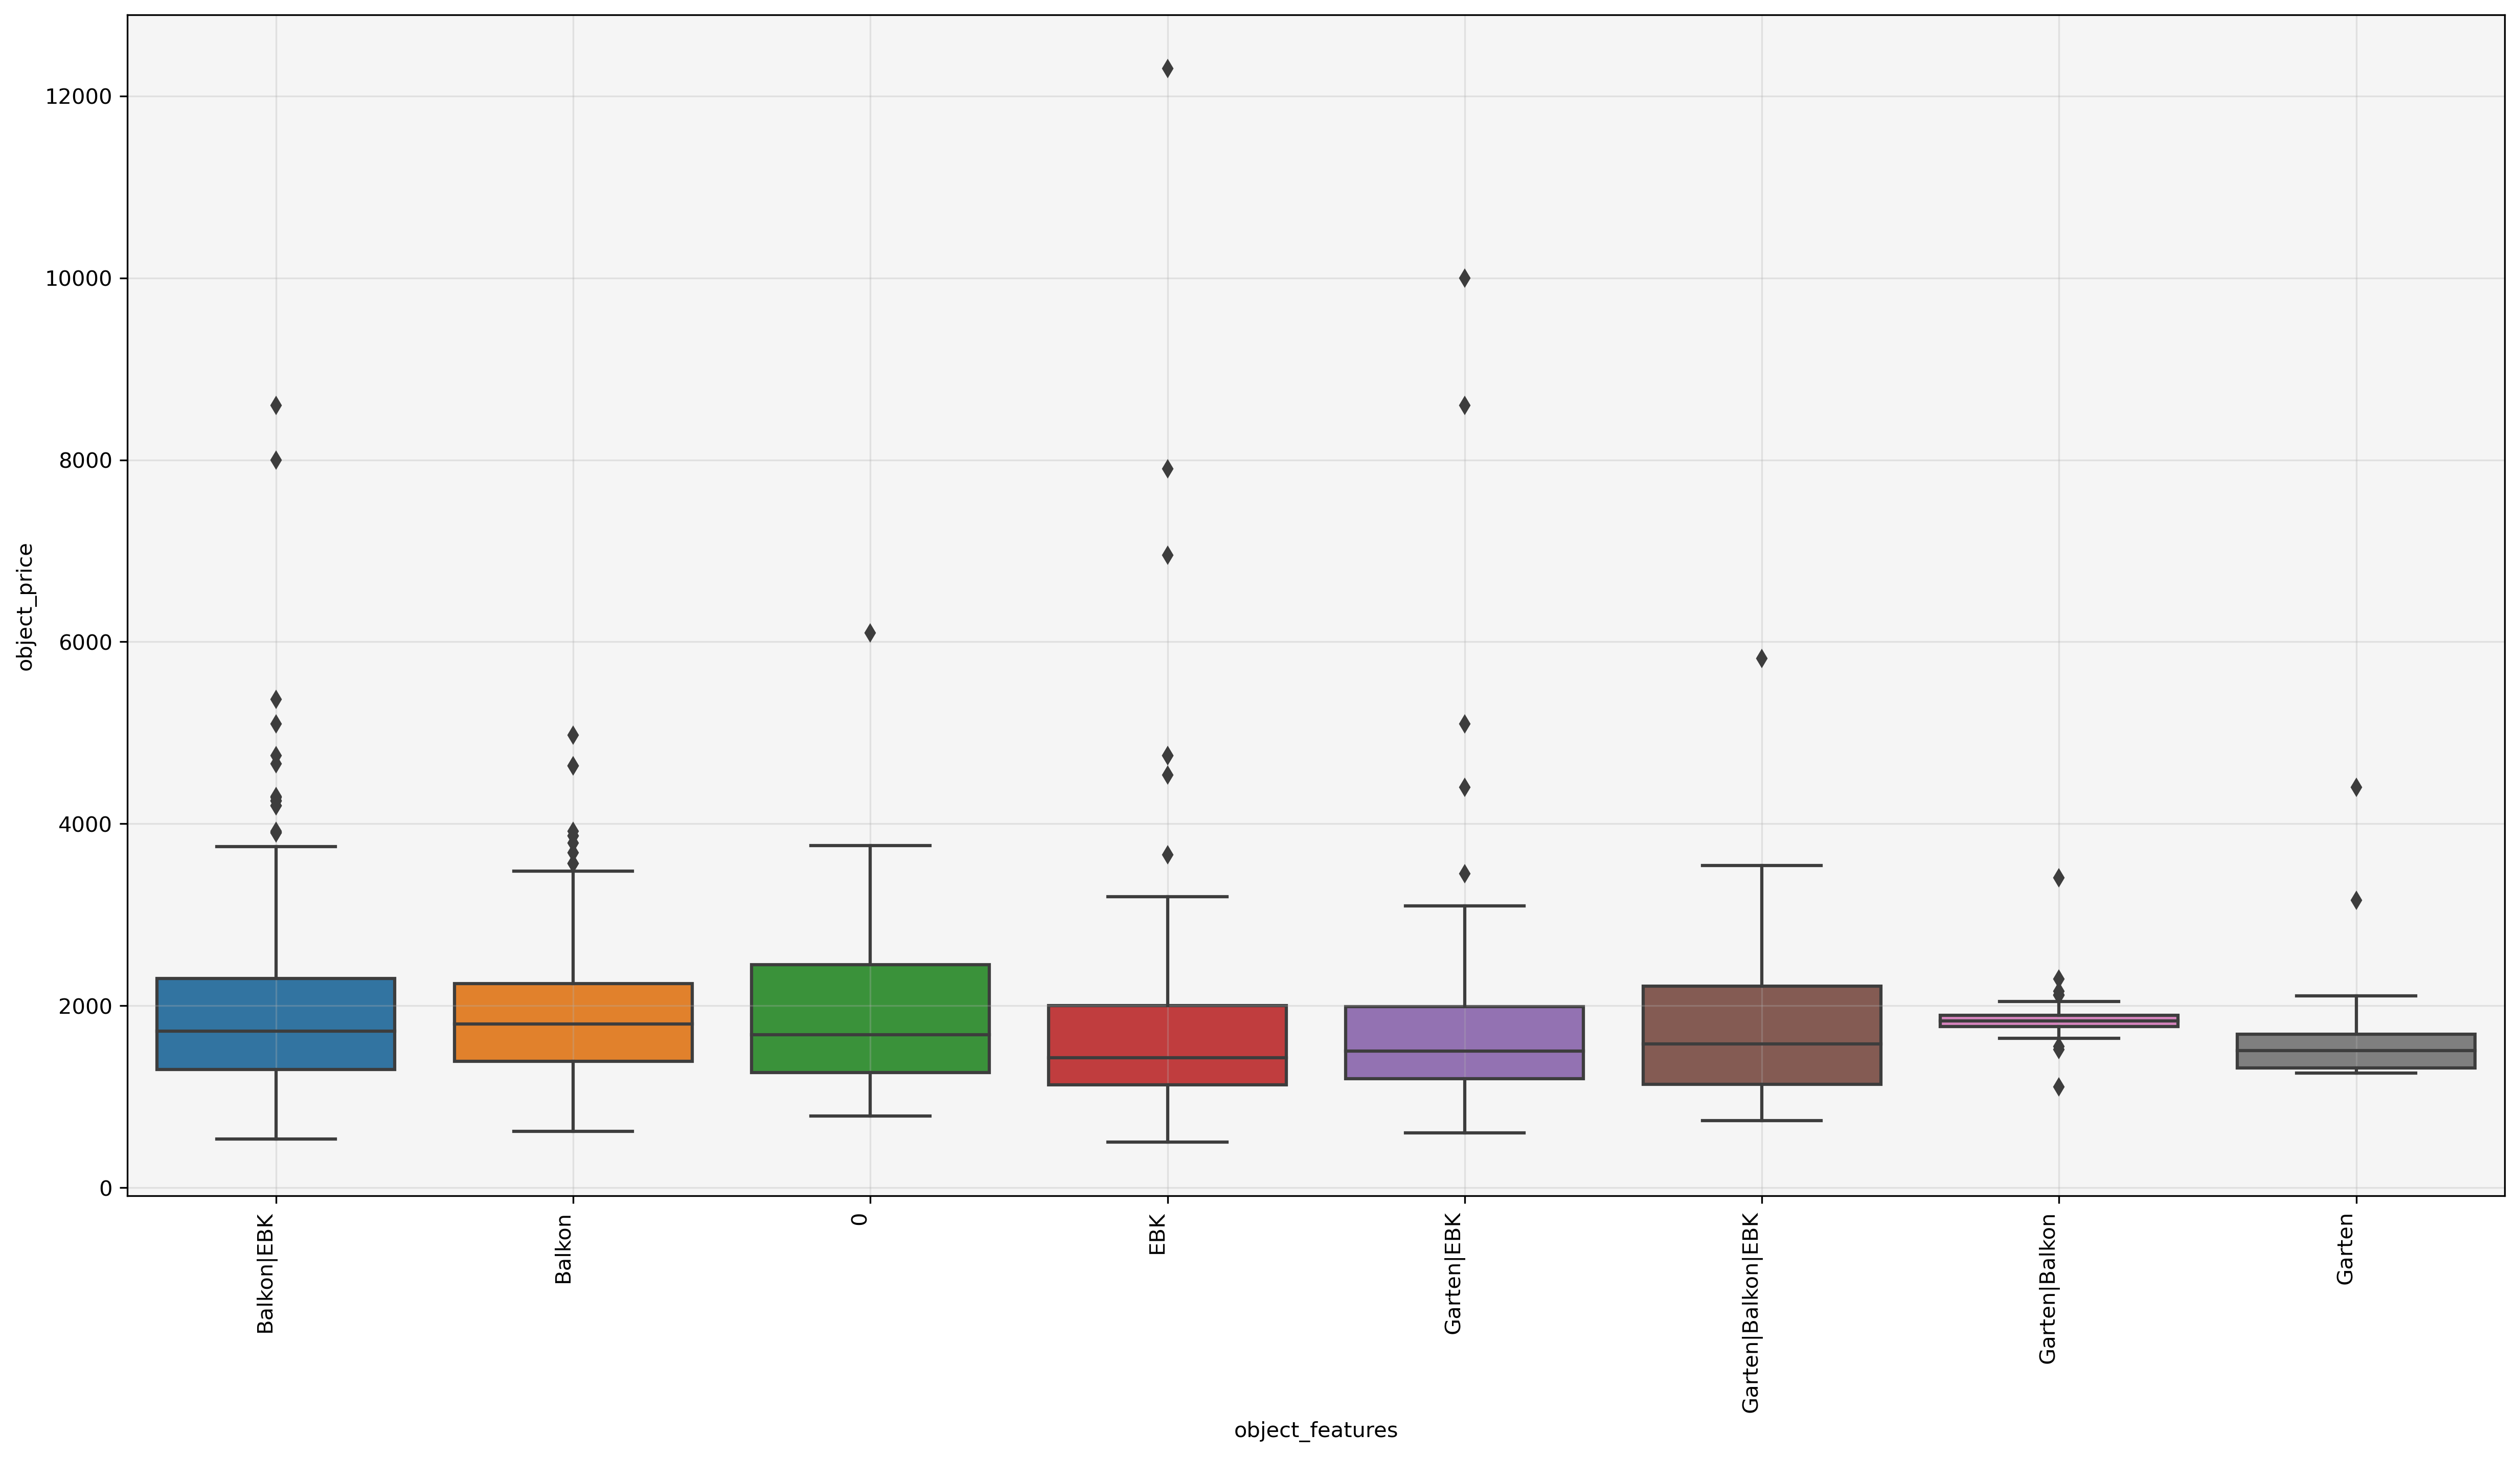

In [1191]:
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.boxplot(data = df5, x = 'object_features', y = 'object_price')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.show()

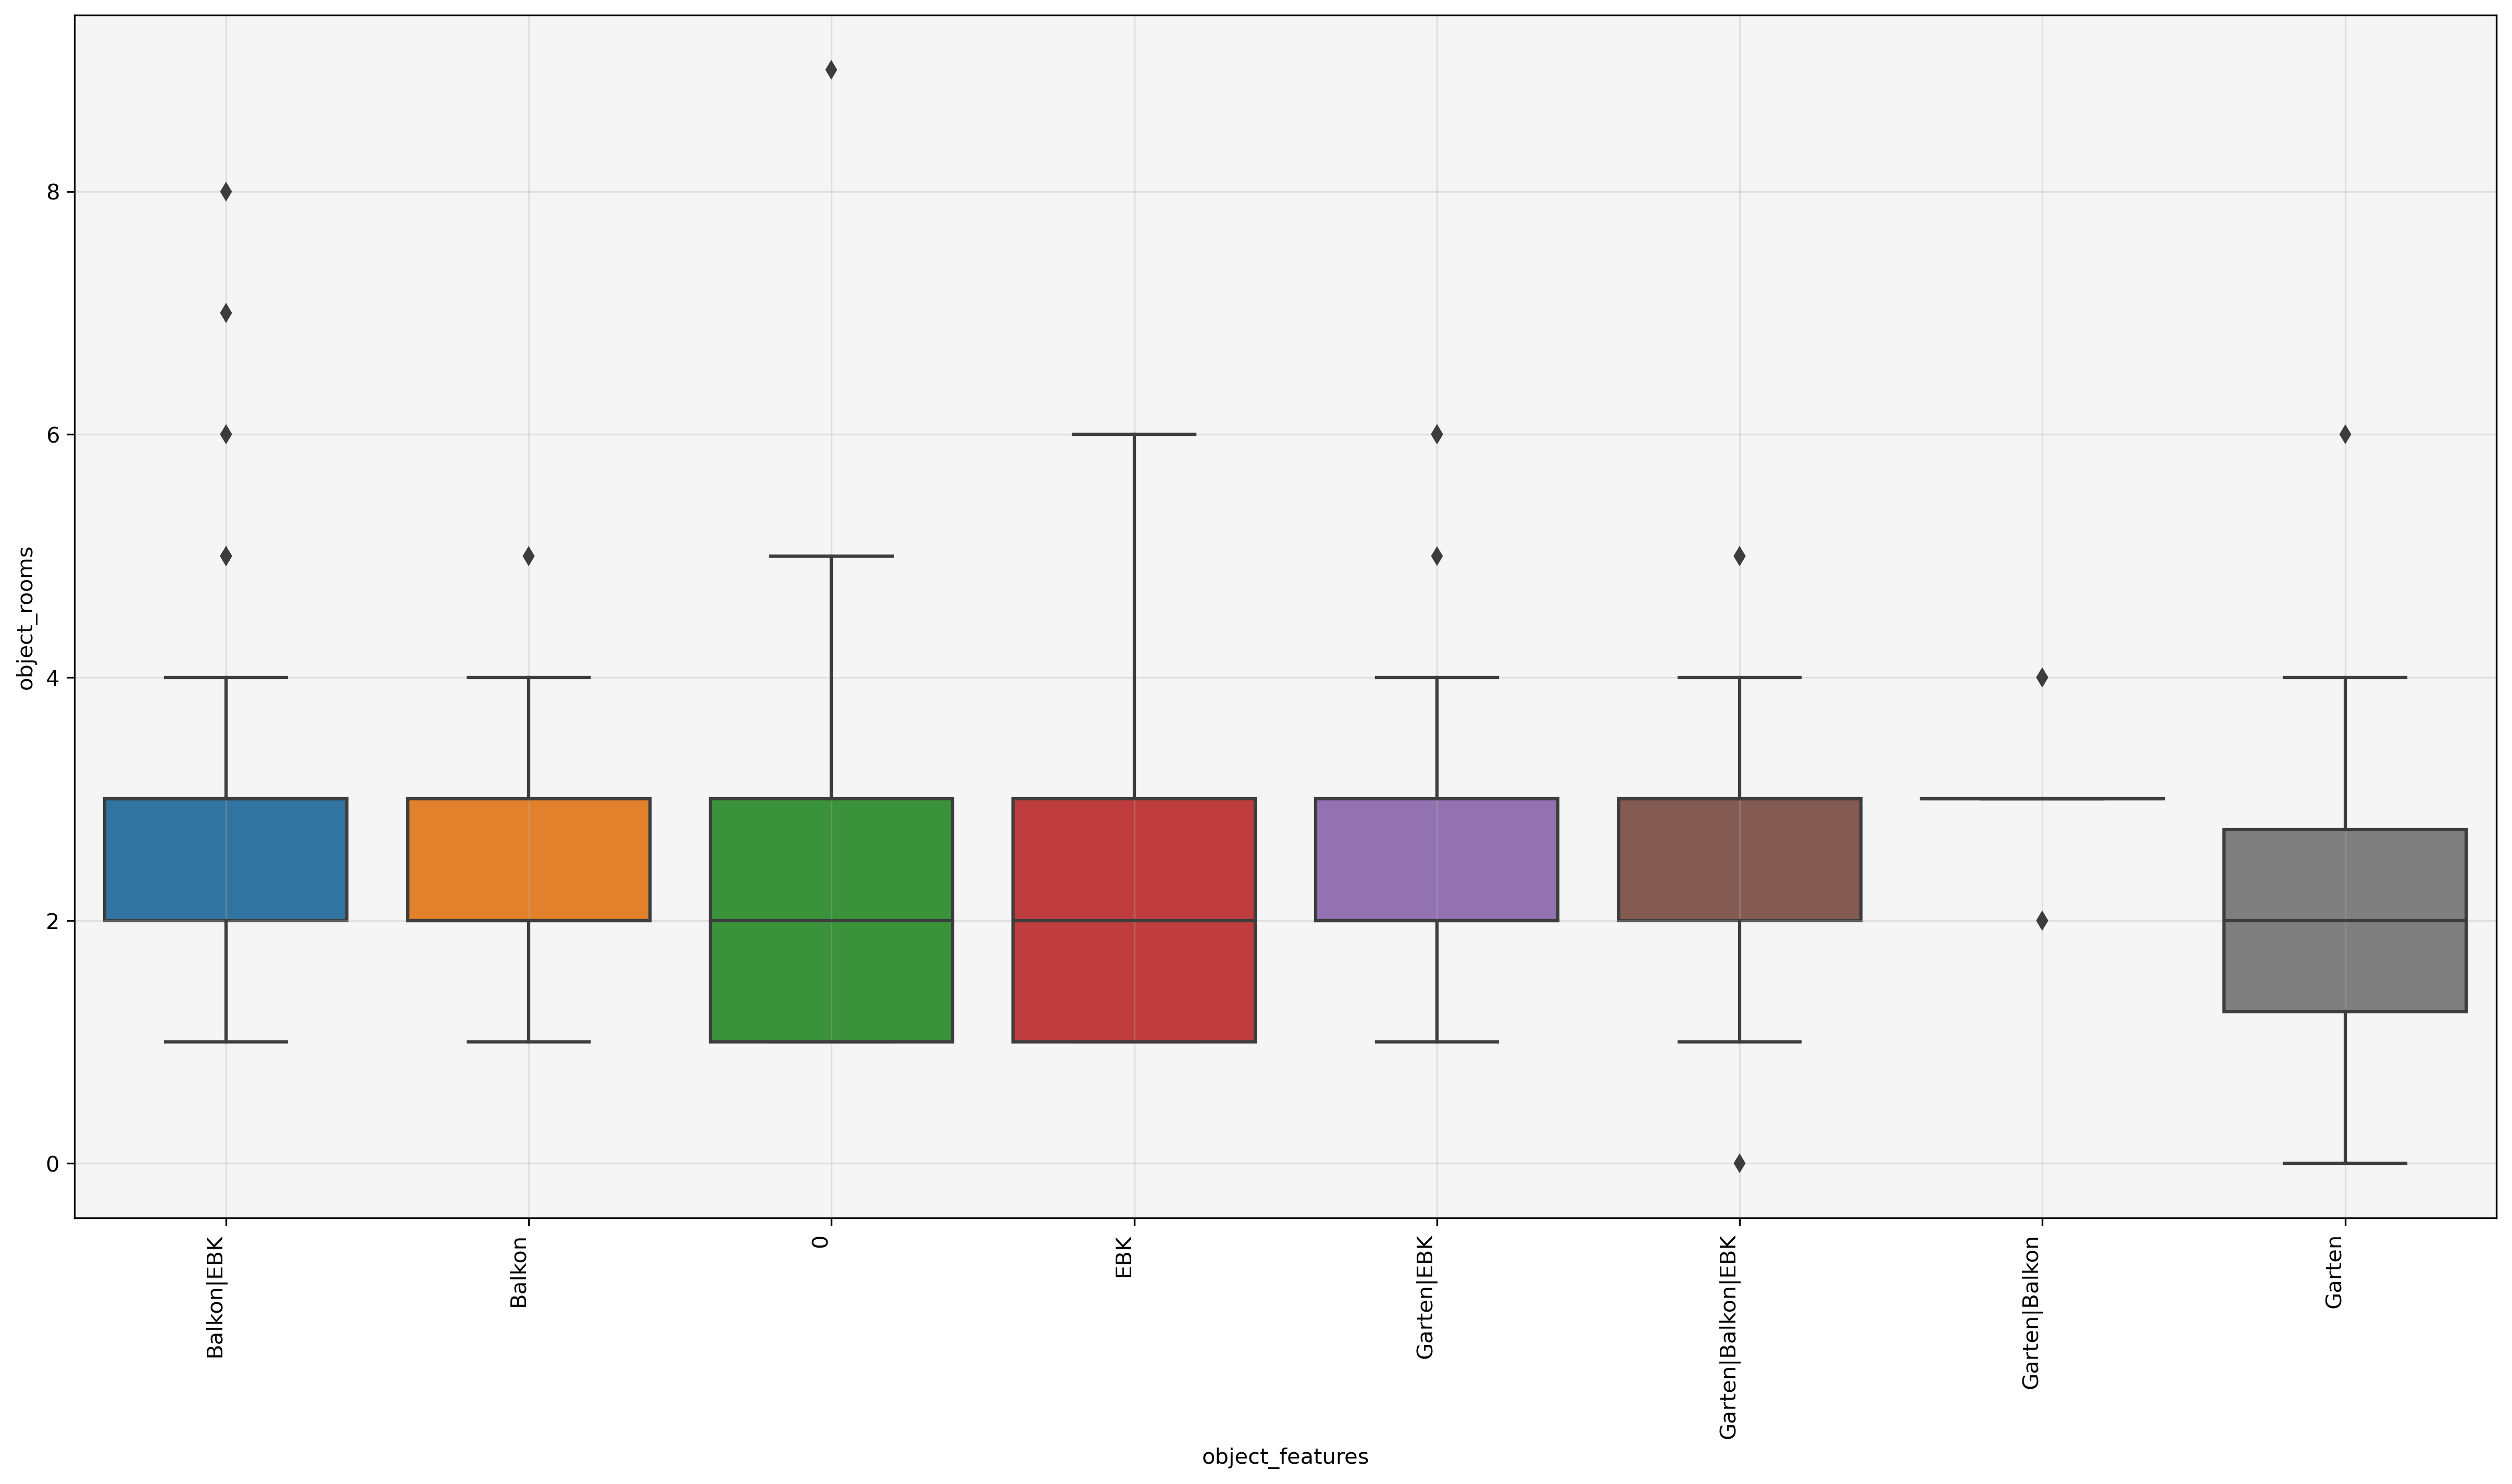

In [1192]:
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.boxplot(data = df5, x = 'object_features', y = 'object_rooms')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.show()

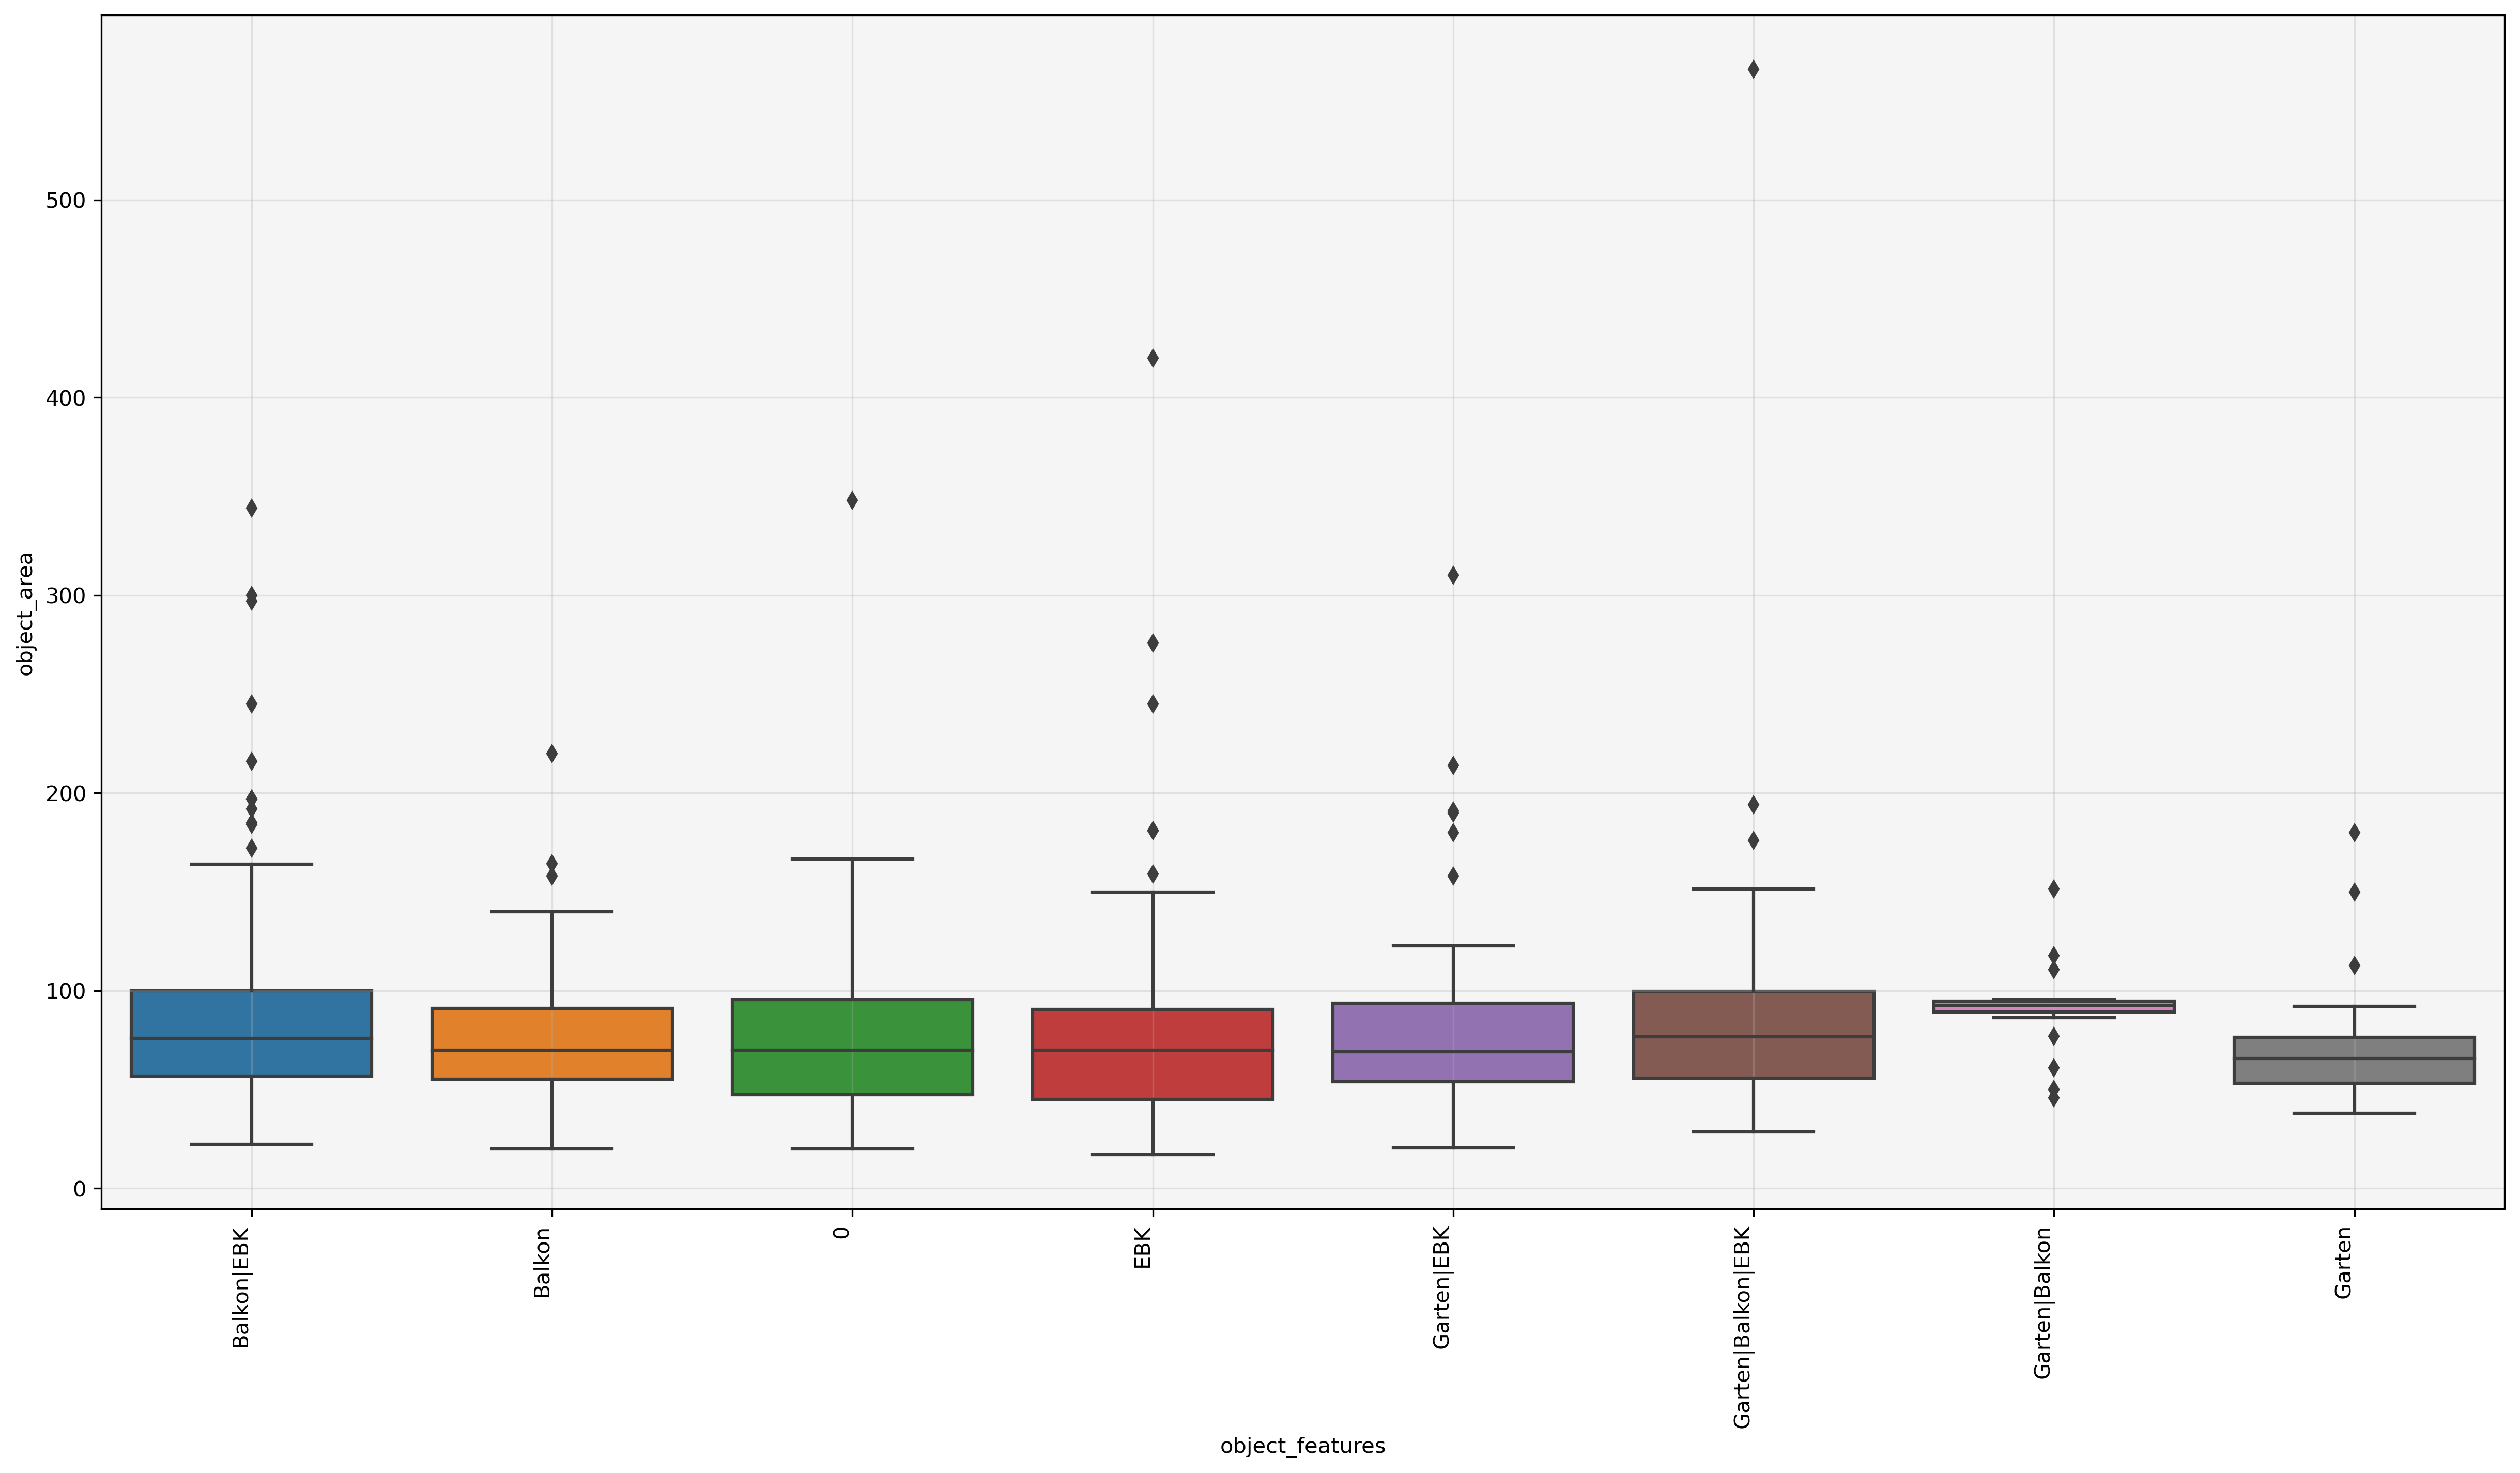

In [1193]:
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.boxplot(data = df5, x = 'object_features', y = 'object_area')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.show()

# 2.4.2. Feature "object_objektart_sub"

Lastly I look at the feature "object_objektart_sub".

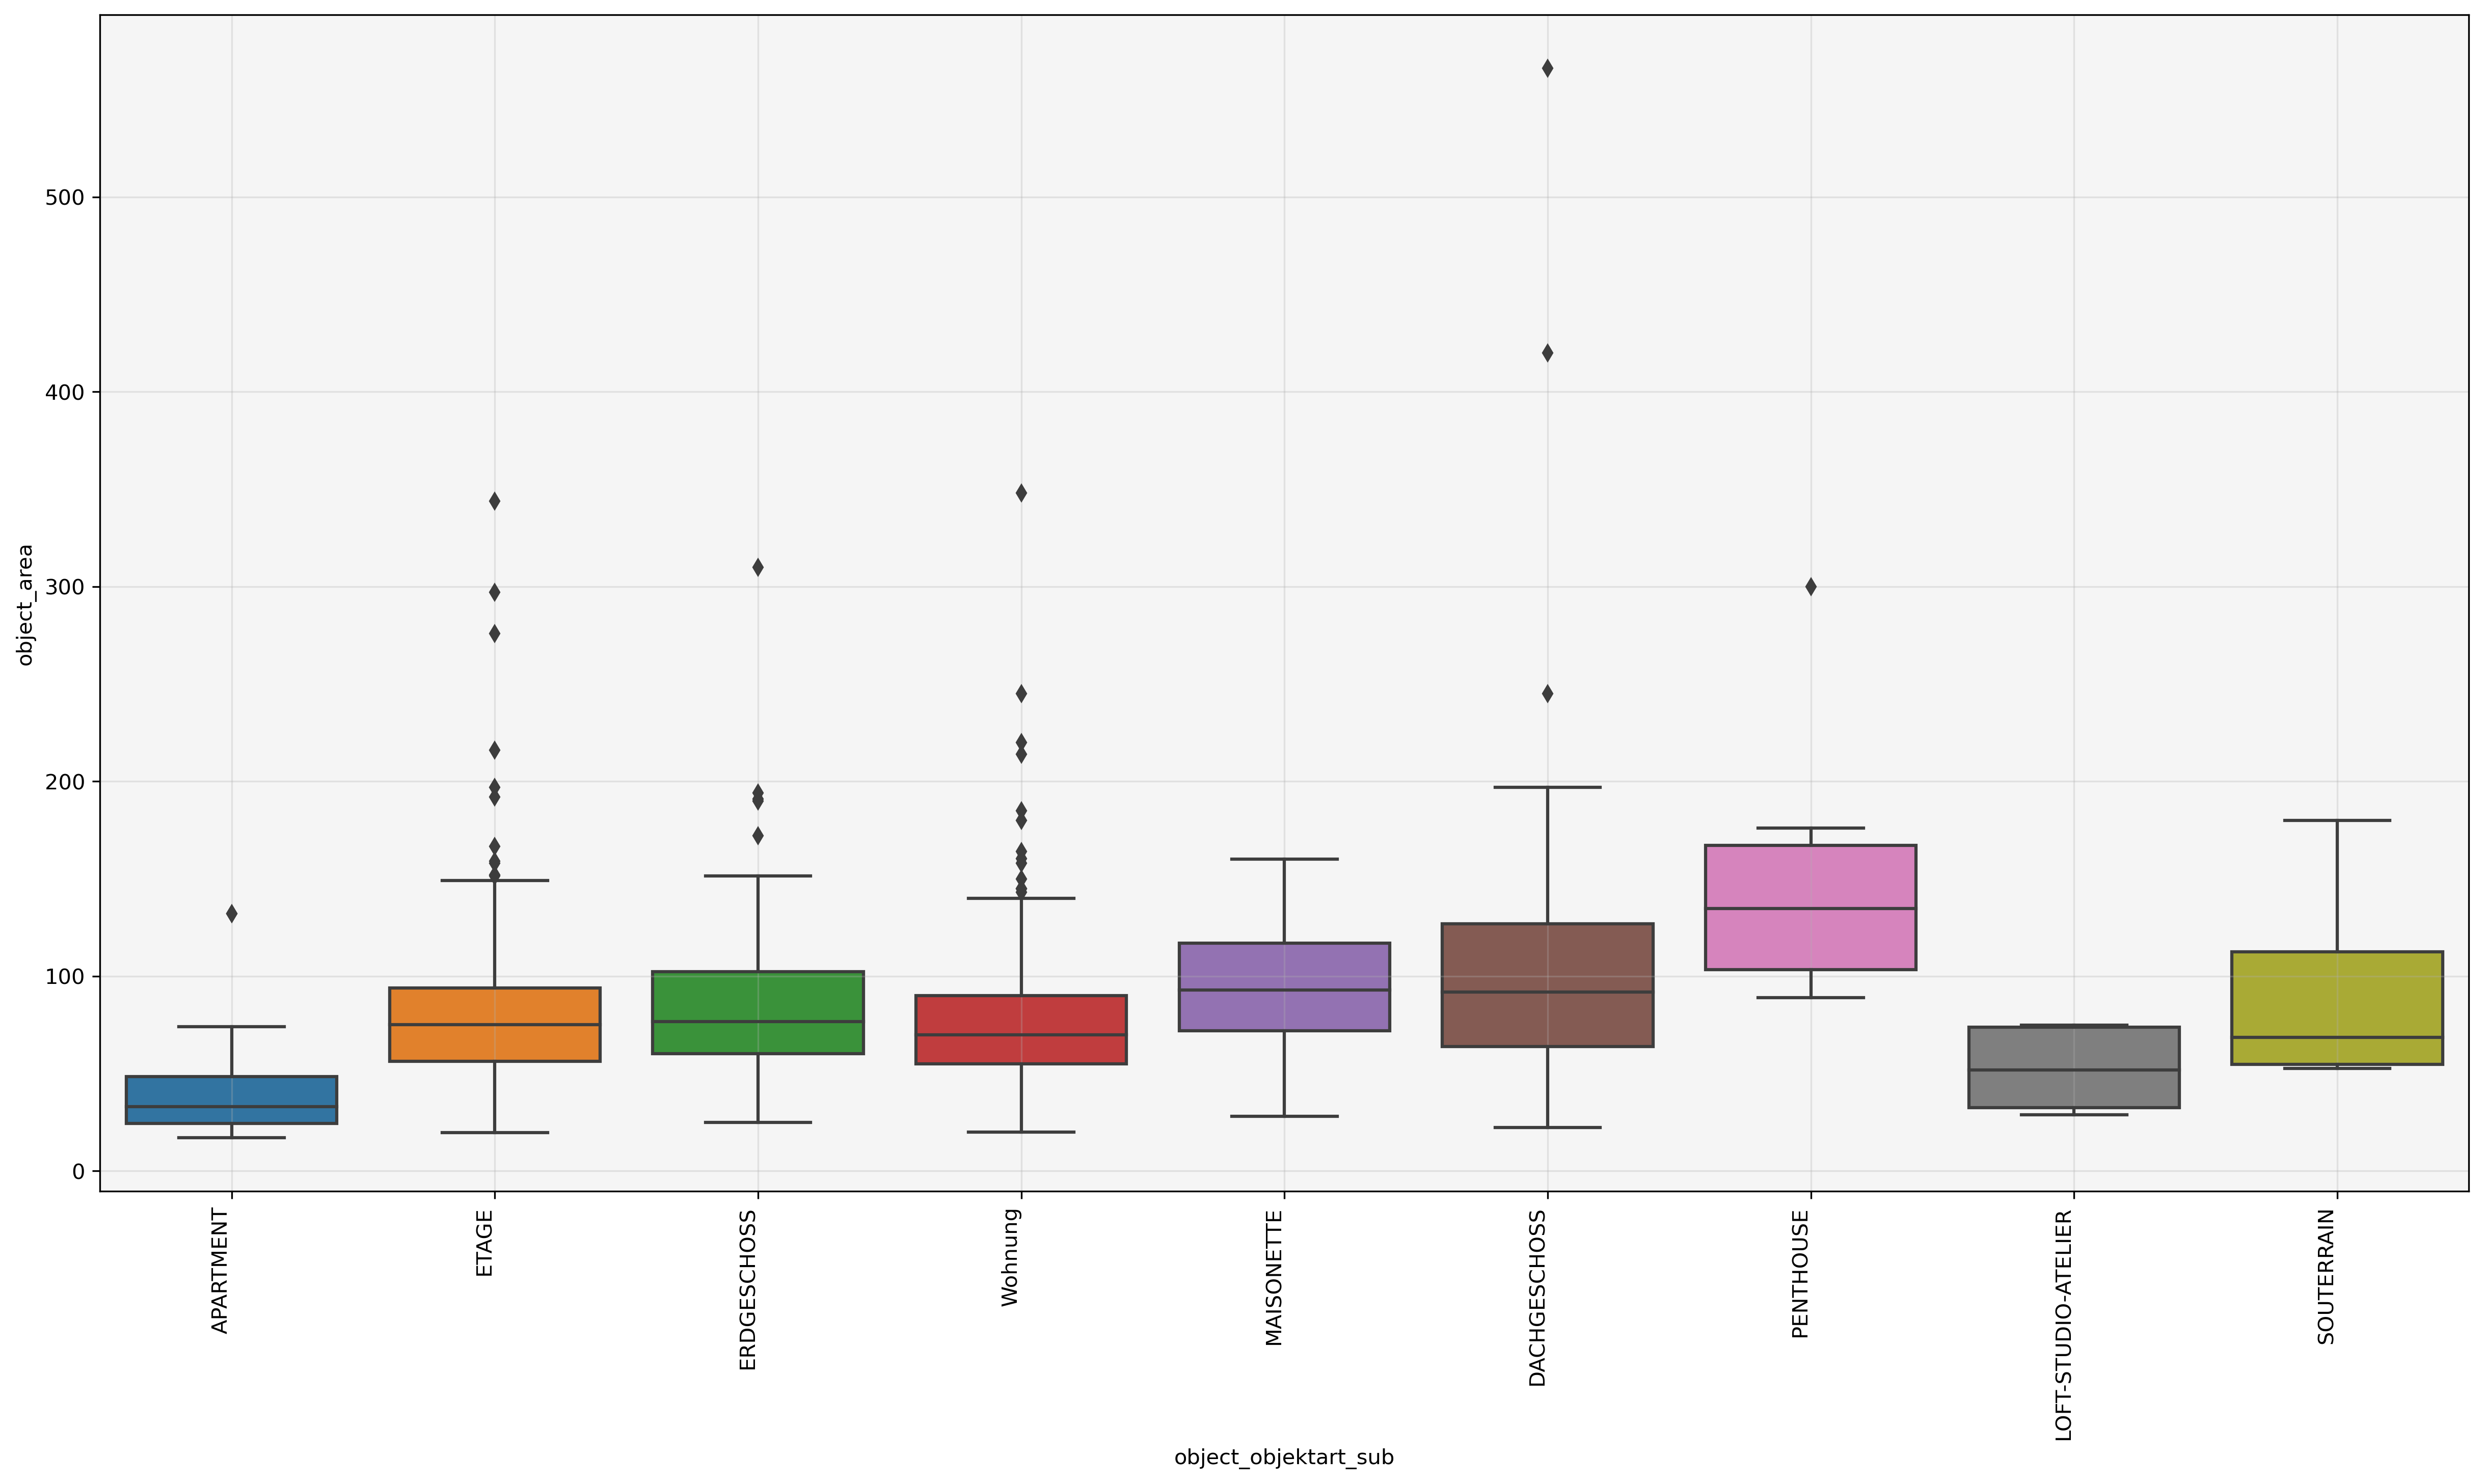

In [1194]:
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.boxplot(data = df5, x = 'object_objektart_sub', y = 'object_area')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.show()

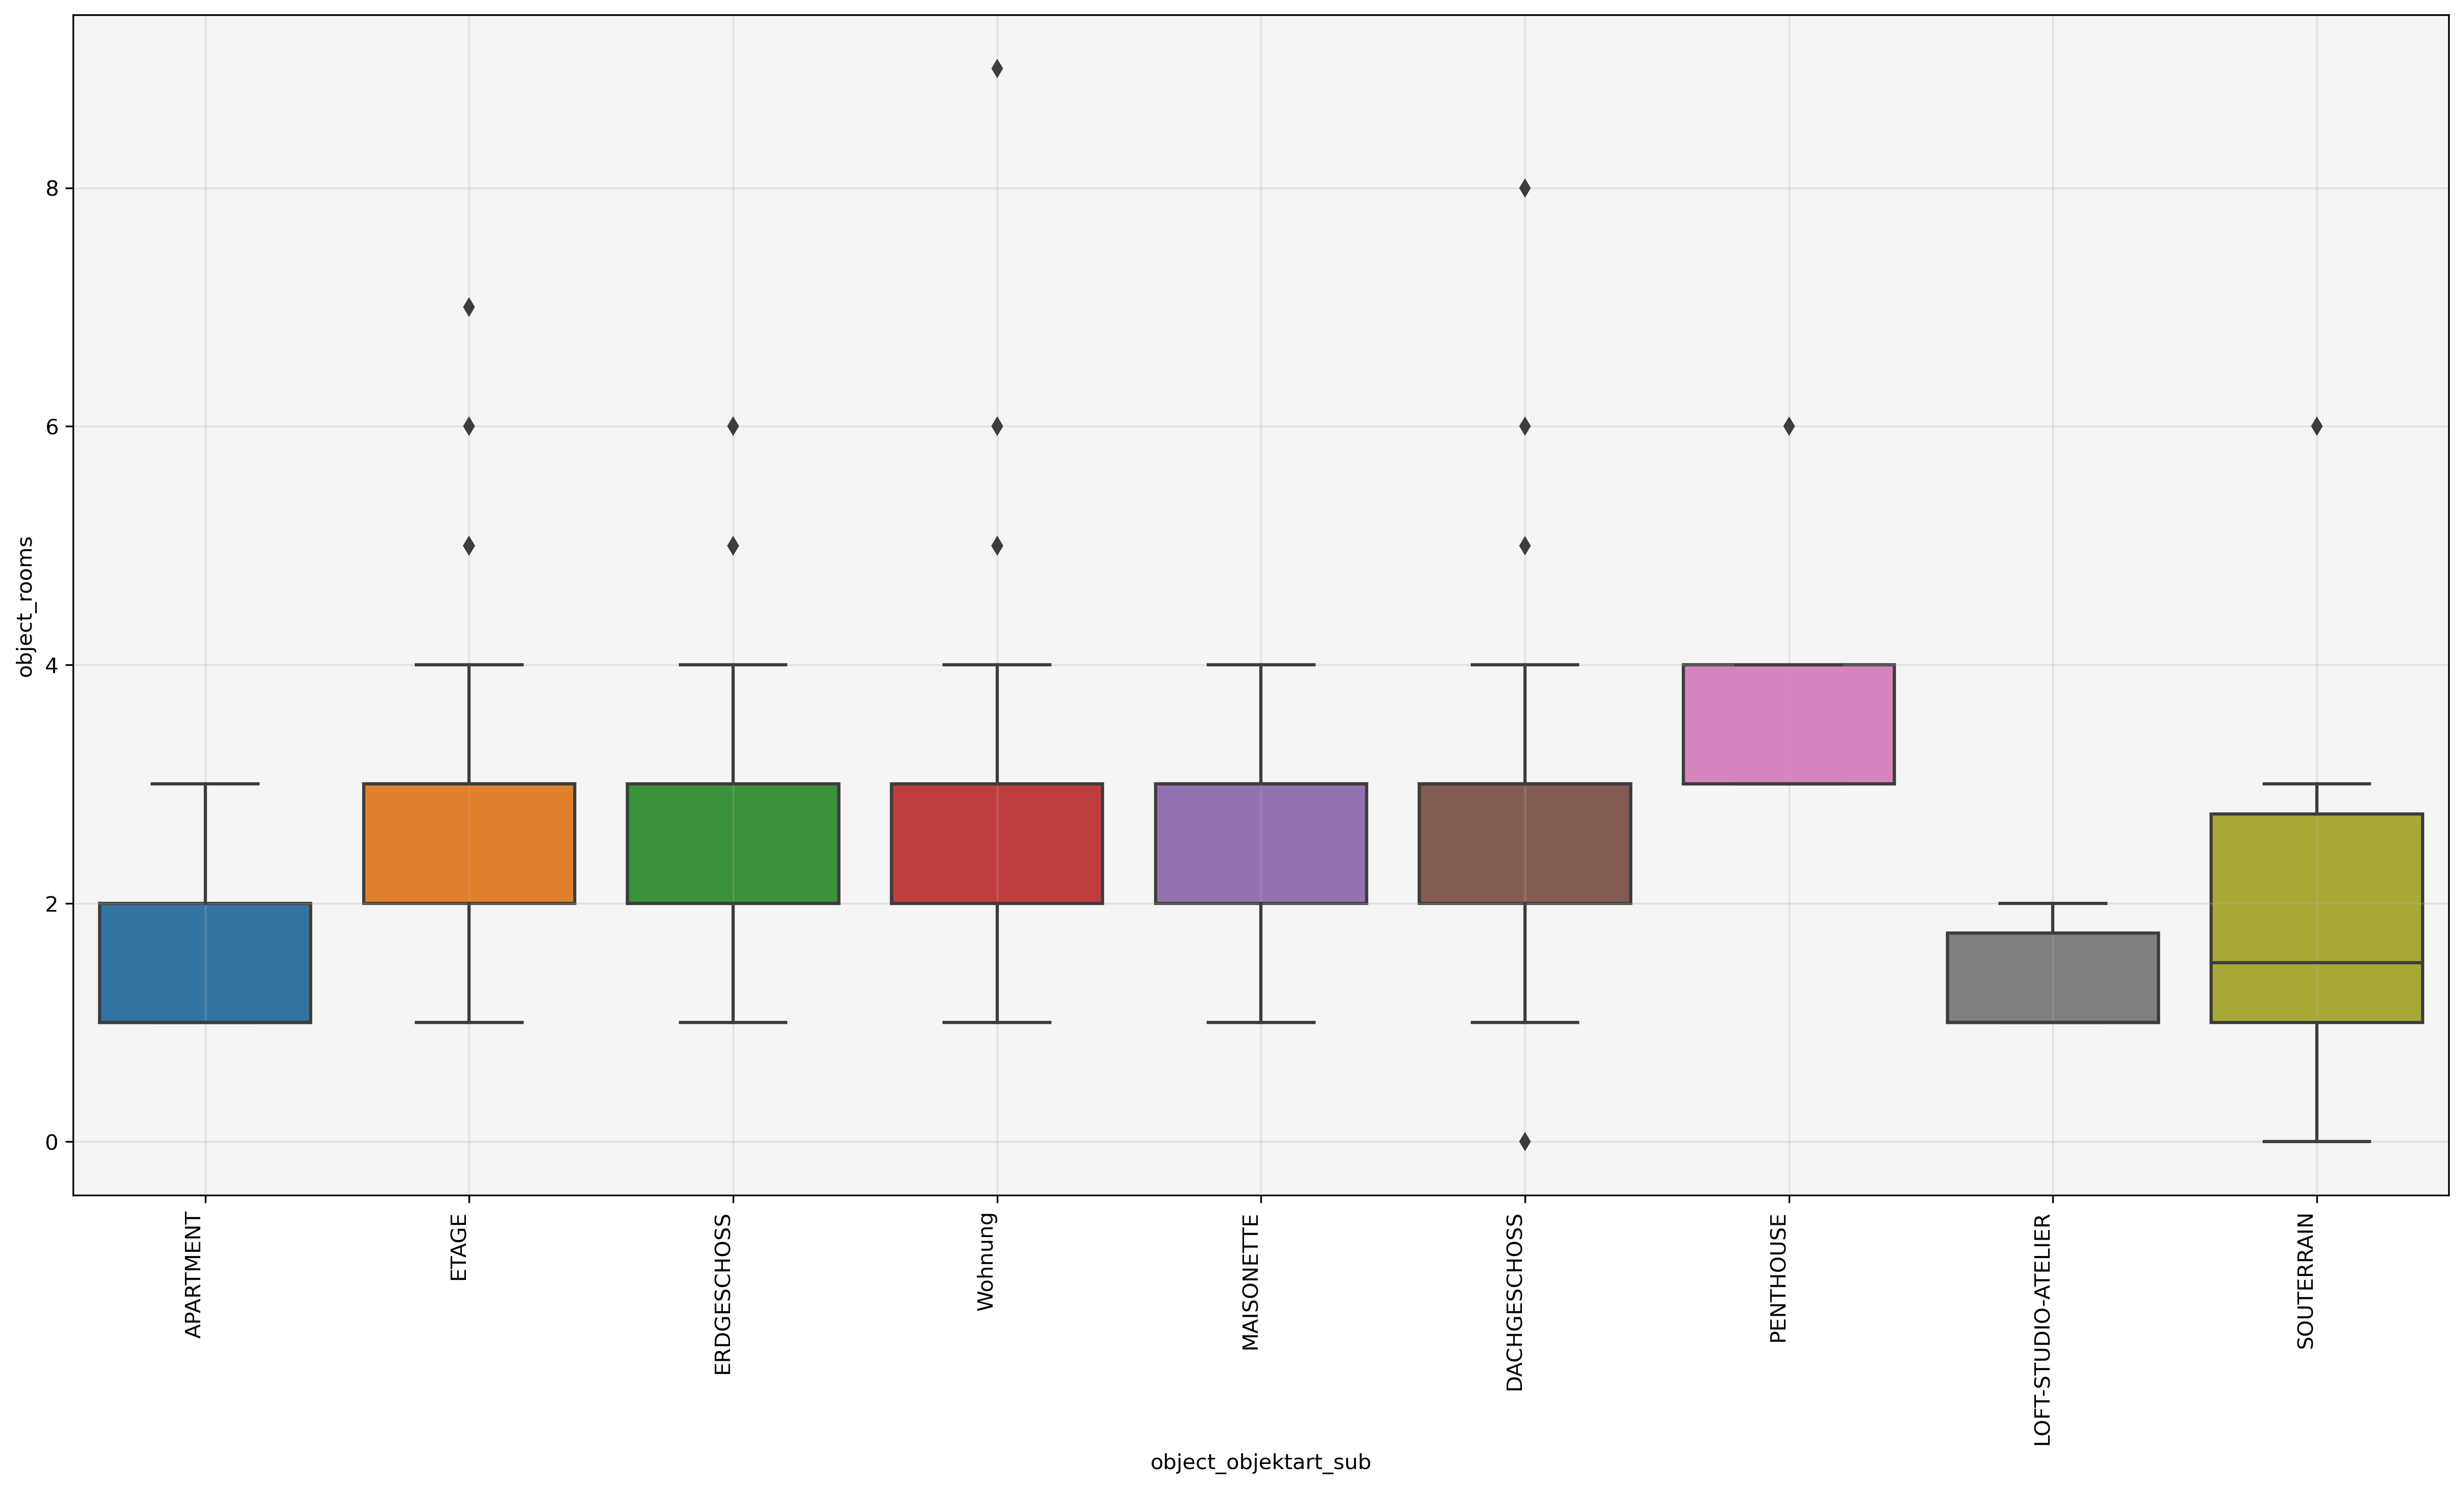

In [1195]:
plt.figure(figsize=(20,10))
ax= plt.subplot()
sns.boxplot(data = df5, x = 'object_objektart_sub', y = 'object_rooms')
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.show()

# 3. Categorical Feature Encoding

First of all the data in the feature "object_features" should be splitted, because there are many values which includes more then one feature. This features should be in seperate columns.

I create therefore the new feature columns and then I design the function to fill them.

In [1098]:
df5['Balkon'] = pd.Series(dtype='object')
df5['EBK'] = pd.Series(dtype='object')
df5['Garten'] = pd.Series(dtype='object')
df5_1 = df5.fillna(0)

In [1099]:
def seperate_featueres(df):
    row_count = -1
    for i in df["object_features"]:
        row_count += 1
        if i != 0:
            splitted_values = i.split("|")
            for k in range(len(splitted_values)):
                if splitted_values[k] == "Balkon":
                    df["Balkon"][row_count] = 1
                elif splitted_values[k] == "EBK":
                    df["EBK"][row_count] = 1
                elif splitted_values[k] == "Garten":
                    df["Garten"][row_count] = 1
    return df

I had the problem with the function above that my programm didn´t work right. The first 100 rows were ok, but then copying were wrong. There was some kind of offset. I look at the data and see that so indexes are missing. Probably because of the deleting of some rows. I reset the indexes and after that the programm works perfectly. 

In [1100]:
df5_1 = df5_1.reset_index()

In [1102]:
df5_2 = seperate_featueres(df5_1)

After the transformation to the new columns, the original column can be deleted.

In [1103]:
df5_3 = df5_2.drop("object_features", axis=1)

The next challenges will be to transform the remaining object data to numeric values. The challenge here is to choose the right technique, which not harm the machine learning modell.

Because all the object features are nominal the simplest method to encode them is the One-Hot Encoding. In this process each unique value of each object column will be transformed to the value "1" and also get his own column. All other values in this column will be "0".

In [565]:
def one_hot_encoding(df):
    for i in df:
        if df[i].dtypes == "object" and (i !="id" or i !="index"):
            df = pd.get_dummies(data=df, columns=[i])
    return df

In [566]:
df6 = one_hot_encoding(df5_3)

In [567]:
df6.columns

Index(['index', 'id', 'enh_impression_position', 'search_sortby',
       'object_area', 'object_price', 'object_rooms',
       'prices_per_square_meter', 'Balkon', 'EBK', 'Garten',
       'object_district_Allach-Untermenzing', 'object_district_Altstadt-Lehel',
       'object_district_Au-Haidhausen',
       'object_district_Aubing-Lochhausen-Langwied',
       'object_district_Berg am Laim', 'object_district_Bogenhausen',
       'object_district_Feldmoching-Hasenbergl', 'object_district_Hadern',
       'object_district_Laim', 'object_district_Ludwigsvorstadt-Isarvorstadt',
       'object_district_Maxvorstadt', 'object_district_Milbertshofen-Am Hart',
       'object_district_Moosach', 'object_district_Neuhausen-Nymphenburg',
       'object_district_Obergiesing', 'object_district_Pasing-Obermenzing',
       'object_district_Ramersdorf-Perlach',
       'object_district_Schwabing-Freimann', 'object_district_Schwabing-West',
       'object_district_Schwanthalerhöhe', 'object_district_Sendling

Now there are clearly more columns then before. This can be lead to overfitting model, but nevertheless this is for this kind of data type the best option. To solve the problems of a overfittung model there are other options.

# 4. Numeric Feature Analysis

The next part is to look closer to the numeric values.

The "enh_impression_position" and "search_sortby" functions count values from the website, from which the values were scraped. That´s why they can be deleted.

There also index columns which can also be deleted (index, id).

In [570]:
df7 = df6.drop(["enh_impression_position", "search_sortby", "index", "id"], axis=1)

Before I move further, I check if there are some missing values in the numeric features.

In [571]:
df7.isnull().iloc[:, :5].sum()

object_area                0
object_price               0
object_rooms               0
prices_per_square_meter    0
Balkon                     0
dtype: int64

Ok, there are no missing values. But may be there are implausible values.

In the following table are the statistic informations about numeric variables.

In [719]:
df7.describe().iloc[:, :4]

object_area  object_price  object_rooms  prices_per_square_meter
count   583.000000    583.000000    583.000000               583.000000
mean     82.157839   1951.560892      2.509434                25.696398
std      50.797129   1187.834053      1.176589                10.954864
min      17.000000    500.000000      0.000000                 3.000000
25%      54.700000   1294.500000      2.000000                20.000000
50%      74.540000   1680.000000      2.000000                23.000000
75%      94.600000   2195.000000      3.000000                28.000000
max     565.970000  12300.000000      9.000000                98.000000

- I see here that in "object rooms" is the smallest value zero. This cann´t be truth. Let´s take a look at them, if there more of them.

- Also, is see that the smallest "prices_per_square_meter" is 3. This might be also untruth.

- The room number of 9 is extremely high. This need to be analyzed to check, if that value is plausible.

- Max price of over 12T€ seems also suspicious.

- The same applies to the max values of the "object_area"

- To see if the mean is the right value to definie the middle of the data I need to check the distribution.

In [720]:
print(df7[df7["object_rooms"]==0.0].count()[0])
df7[df7["object_rooms"]==0.0].iloc[:, :4]

2


object_area  object_price  object_rooms  prices_per_square_meter
181         52.6          1262             0                     24.0
519         84.0          3000             0                     36.0

I see that only 2 rows of the whole dataset are zeros. This could be a error of the my web scraper or an error of the website. Because there not so much of them I delete all of them.

In [727]:
df8 = df7.loc[df7["object_rooms"]!=0.0]

Now I look at the suspicious min value of "prices_per_square_meter".

In [728]:
print(df8[df8["prices_per_square_meter"]<15].count()[0])
df8[df8["prices_per_square_meter"]<15].iloc[:10, :4]

8


object_area  object_price  object_rooms  prices_per_square_meter
80         73.32           806             2                     11.0
81         67.00           816             2                     12.0
87         62.40           900             2                     14.0
116        81.00          1068             3                     13.0
117        76.88          1077             3                     14.0
140        81.73          1142             3                     14.0
158        93.69          1200             4                     13.0
326       565.97          1750             2                      3.0

It´s clear that this value significant small than the other values. Let´s visual this to make it clearer!

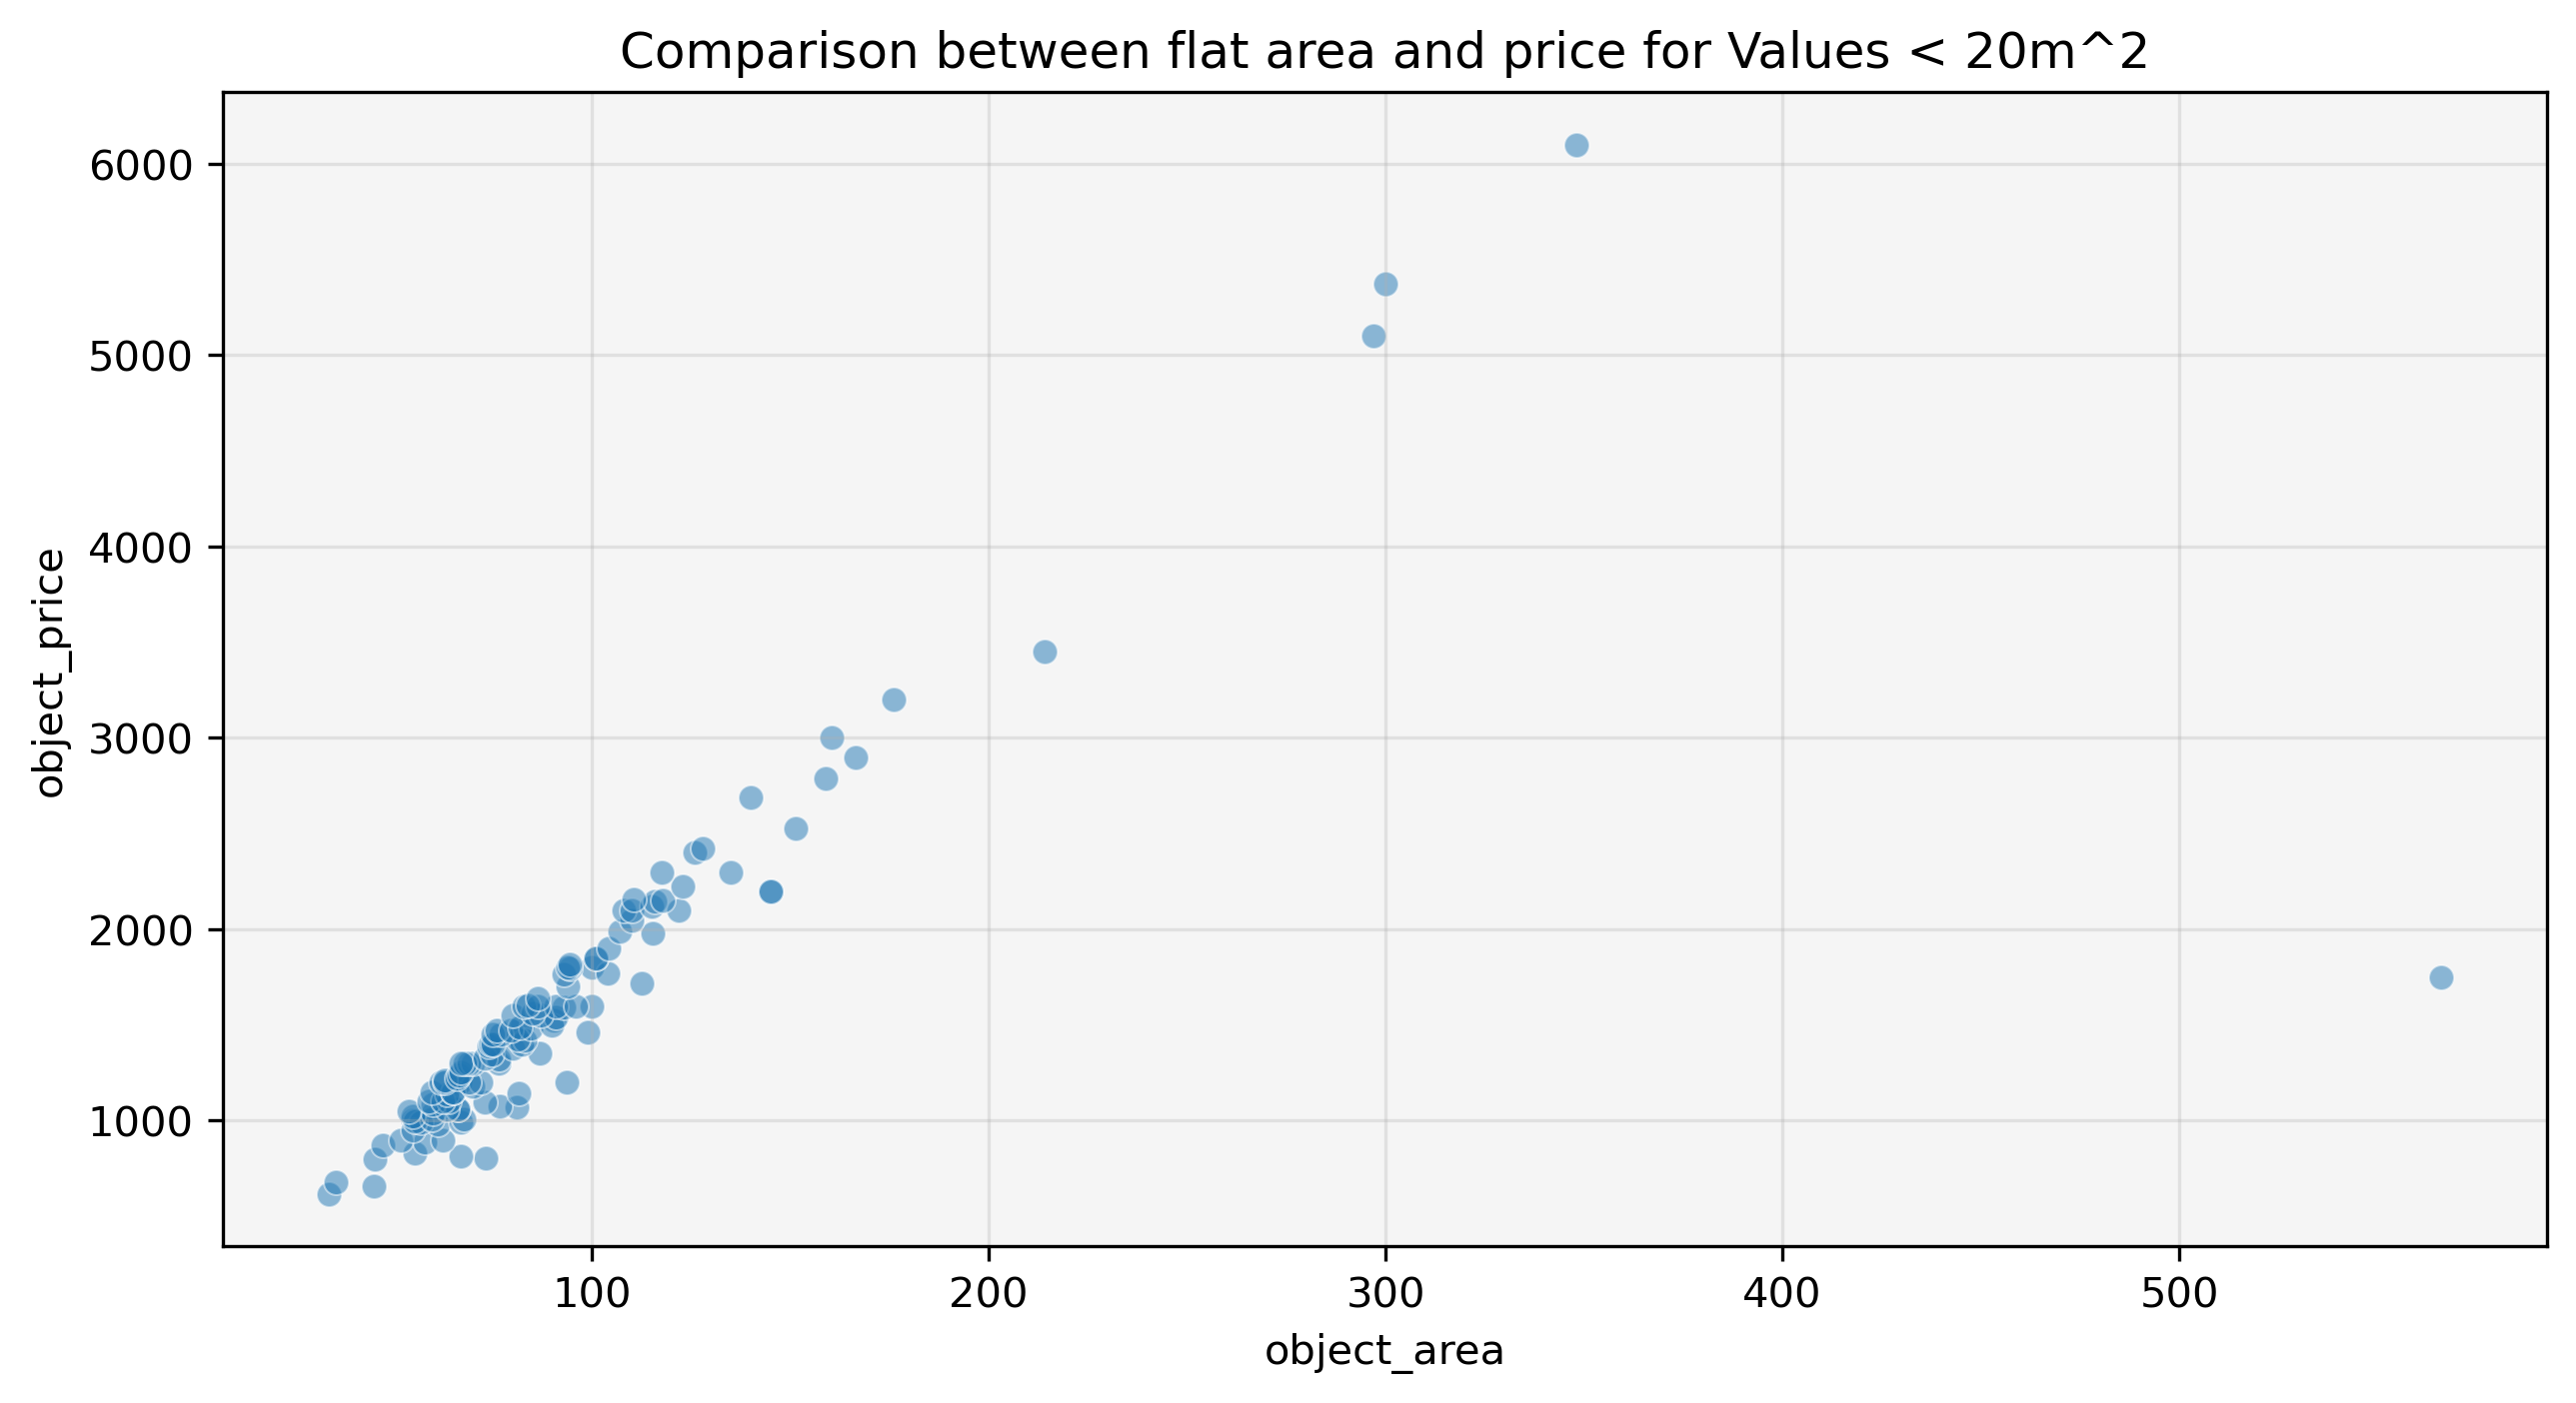

In [729]:
plt.figure(figsize=(10,5))
ax = plt.axes()
sns.scatterplot(
    data=df8[df8["prices_per_square_meter"]<20].iloc[:, :5], x="object_area", y="object_price",
    alpha=0.5
)
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.title("Comparison between flat area and price for Values < 20m^2")
plt.show()

The price grows linear with the object area. But there is on expection. This is clearly a outlier. This value is alos the max value of my for the flat area in my data.
This outlier will mislead my machine learning model if I don´t delete it.

In [730]:
df9 = df8.loc[df8["prices_per_square_meter"]!=3.0]

Now I check the max value of "object_rooms". 

In [776]:
print(df9[df9["object_rooms"]>4].count()[0])
df9[df9["object_rooms"]>4].iloc[21:31, 0:4]

31


object_area  object_price  object_rooms  prices_per_square_meter
572        297.0          5100             6                     17.0
573        300.0          5370             6                     18.0
575        348.0          6100             9                     18.0
576        245.0          6950             5                     28.0
577        276.0          7900             6                     29.0
578        245.0          8000             8                     33.0
579        344.0          8600             7                     25.0
580        190.0          8600             6                     45.0
581        310.0         10000             5                     32.0
582        420.0         12300             6                     29.0

With the tabelle it is difficult to understand if the max value is unplausible or not. Let's visualize it..

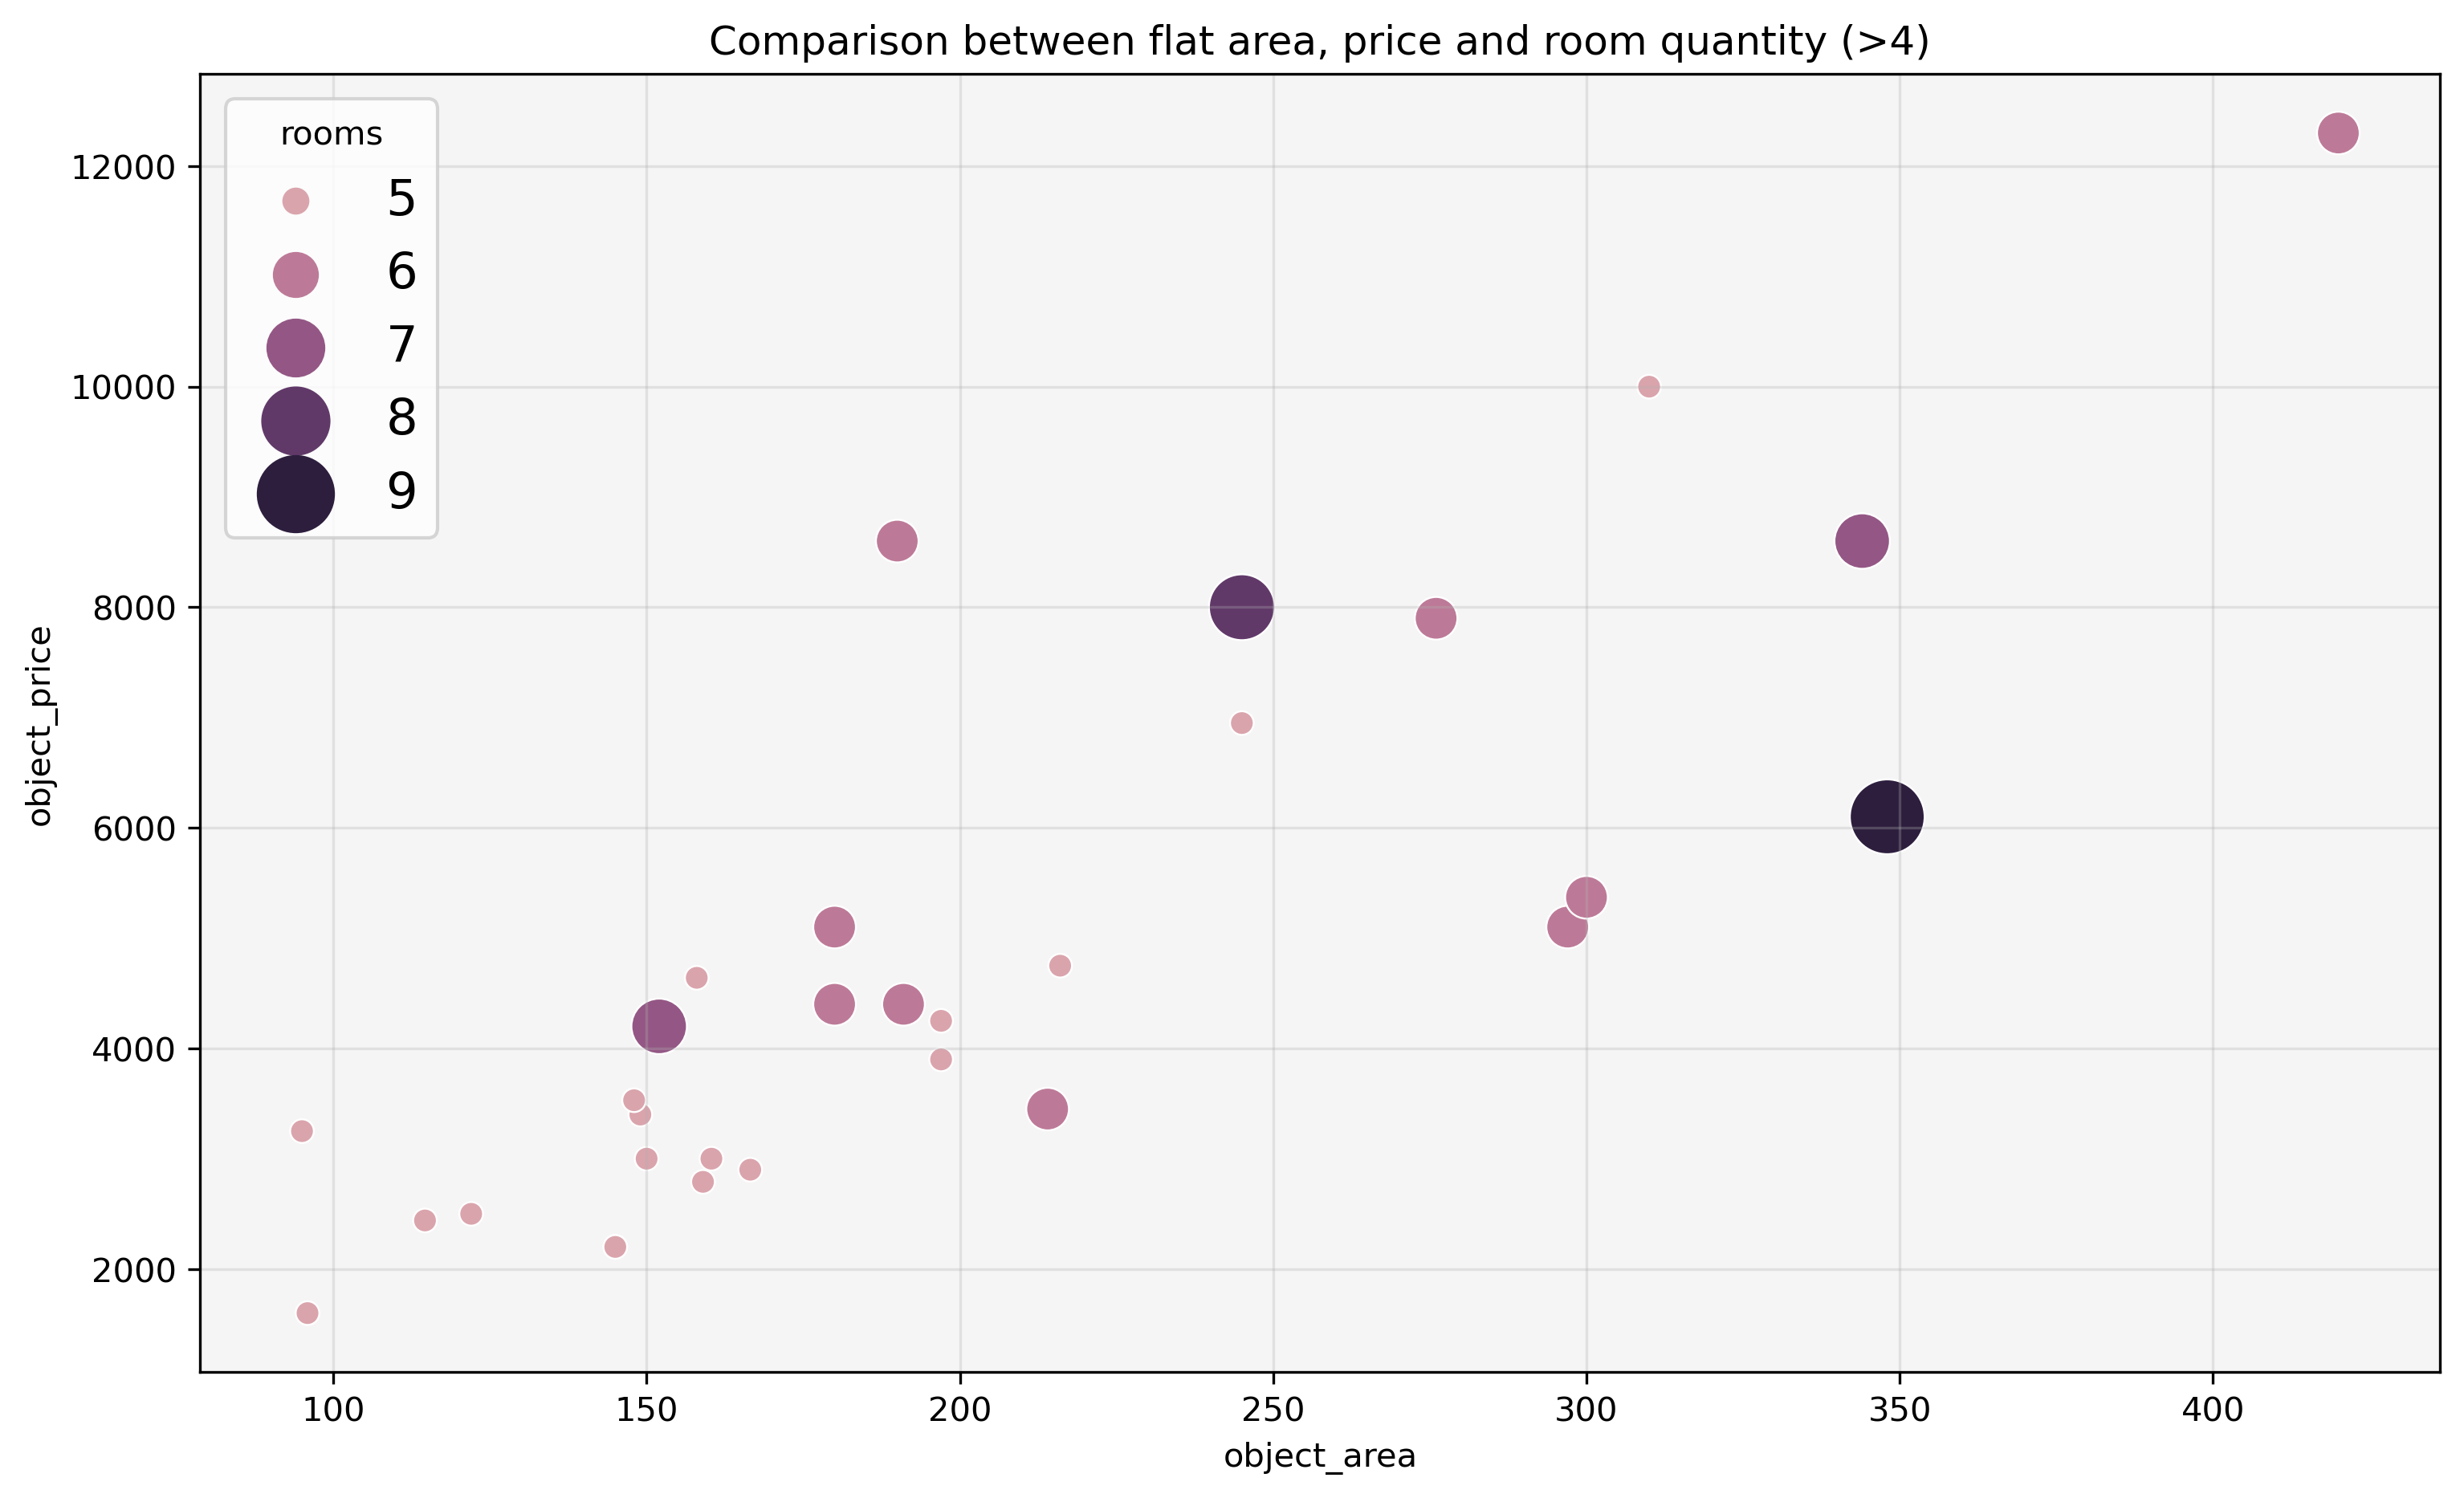

In [814]:
plt.figure(figsize=(12,7))
ax = plt.axes()
sns.scatterplot(
    data=df9[df9["object_rooms"]>4].iloc[:, :4], x="object_area", y="object_price", size="object_rooms",
    sizes=(50, 500), hue="object_rooms", hue_norm=(4, 9), legend="full"
)
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.legend(fontsize=15, title="rooms")
plt.title("Comparison between flat area, price and room quantity (>4)")
plt.show()

The obeject area and the price have a linearity. But it seems that the number of rooms do have a weak correlation with the object area. This tells me that the max value of the price is valide, because it has the biggest area. Also, the max number of rooms might be right, because with a weak correlation the room number is more independed from the flat area. This is plausible, because it´s possible that there are flats which have the same size like other flats but seperated in more smaller rooms. 

Now I check the min values if there is something weird or interesting. 

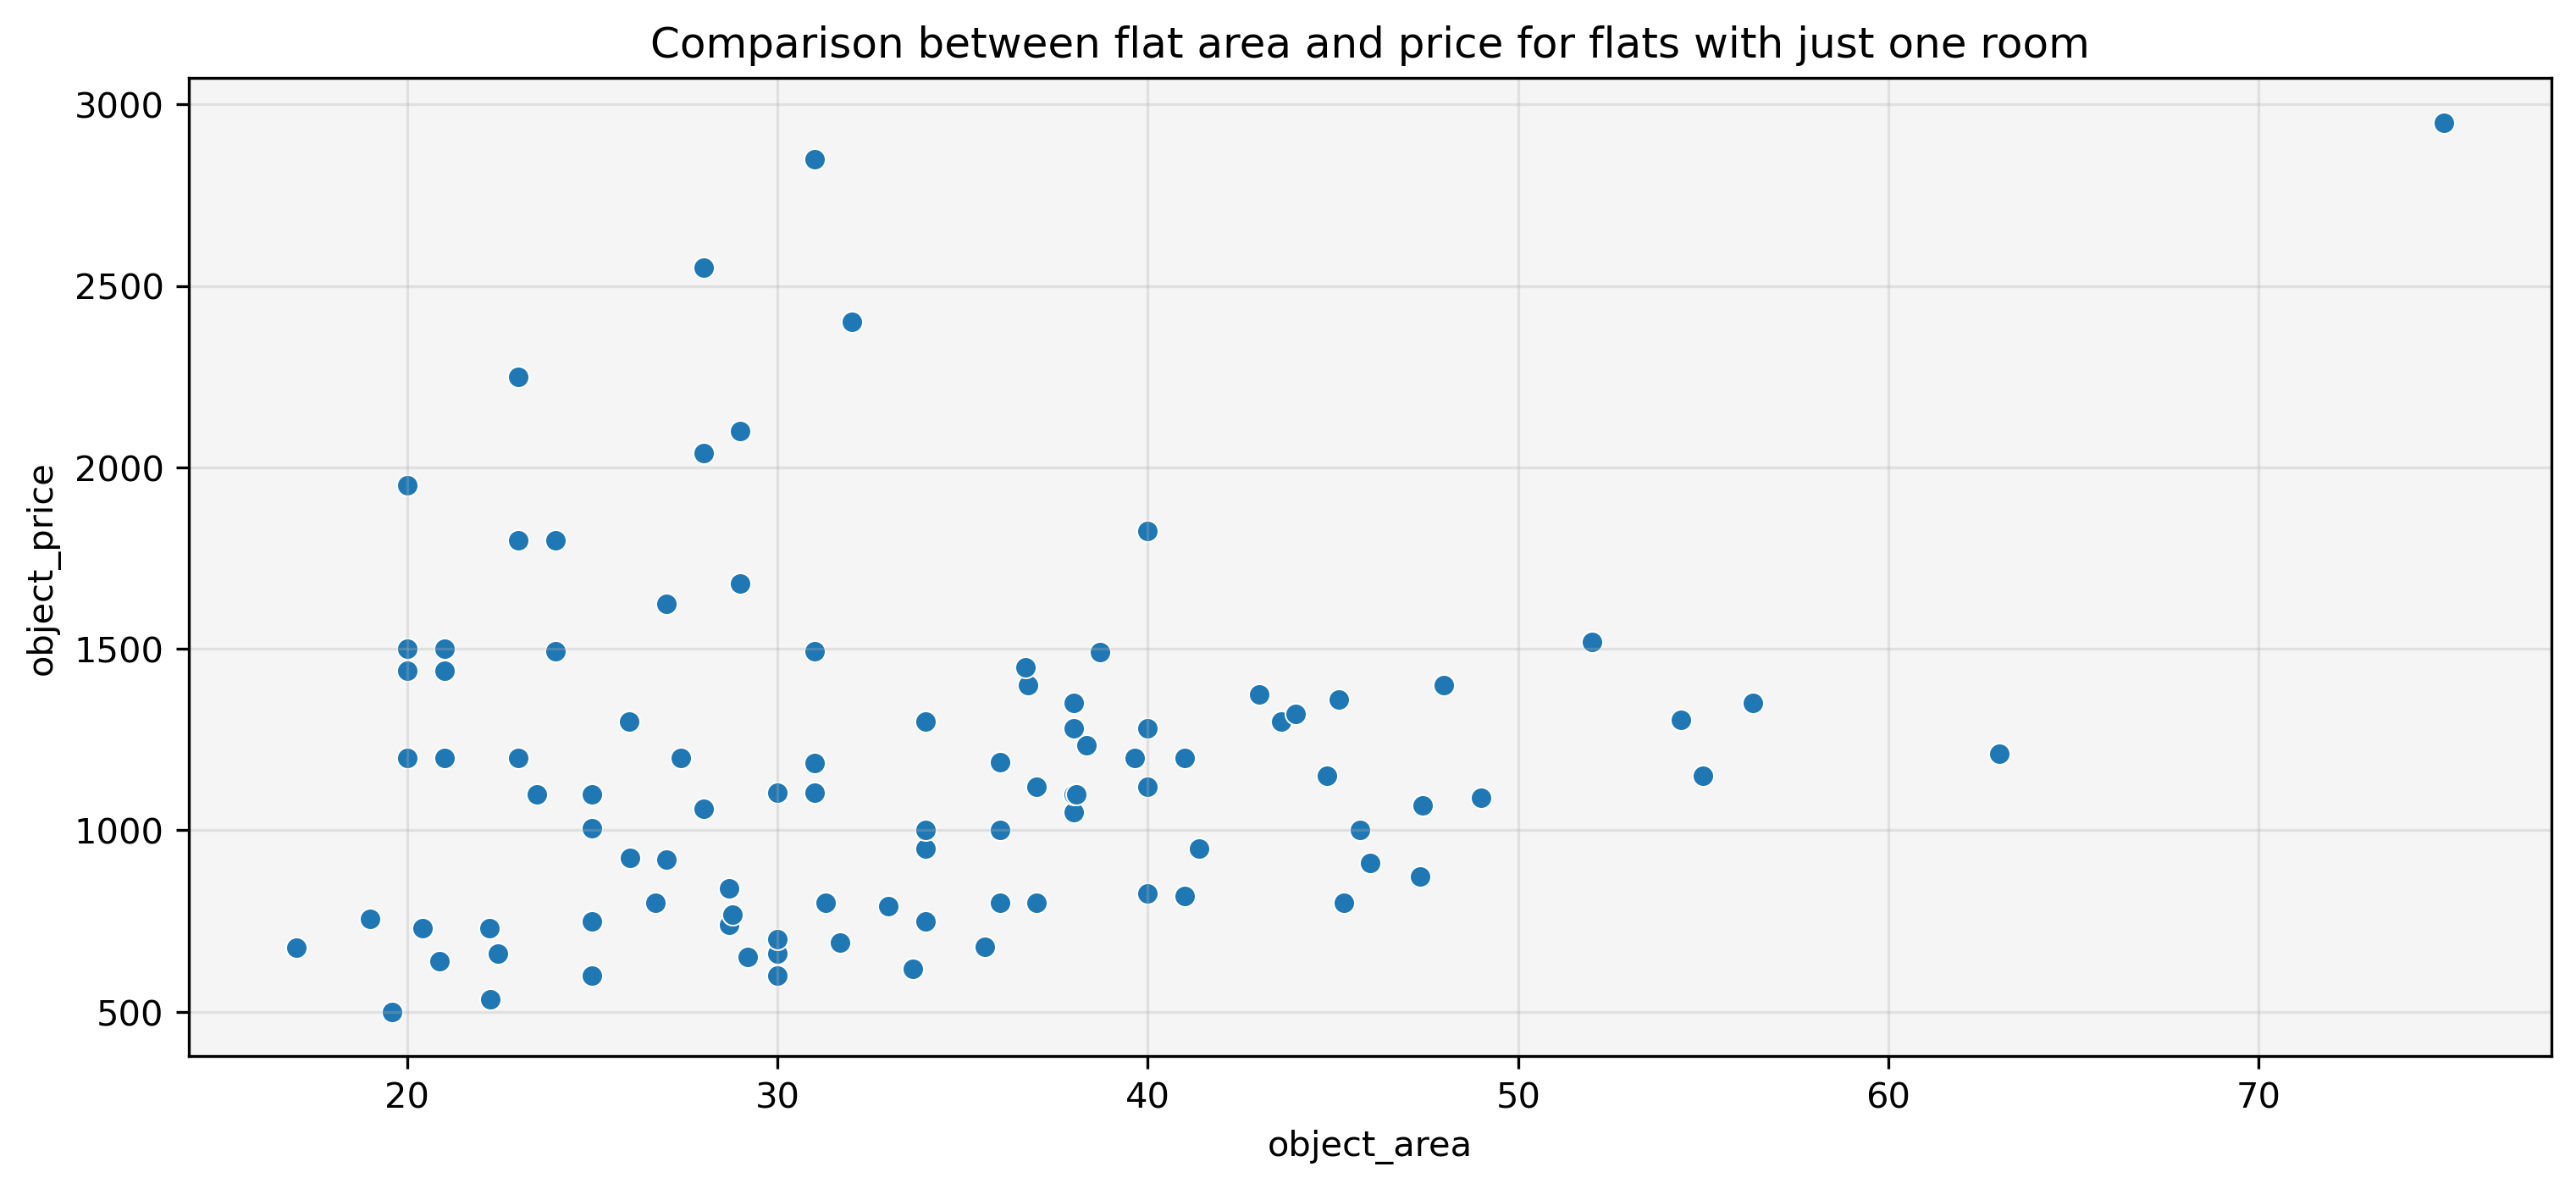

In [833]:
plt.figure(figsize=(12,5))
ax = plt.axes()
sns.scatterplot(
    data=df9[df9["object_rooms"]<2].iloc[:, :4], x="object_area", y="object_price")
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.title("Comparison between flat area and price for flats with just one room")
plt.show()

Ok, I see that there are many values which have extreme high object prices for a really small area. Letzte look at the price per square meter.

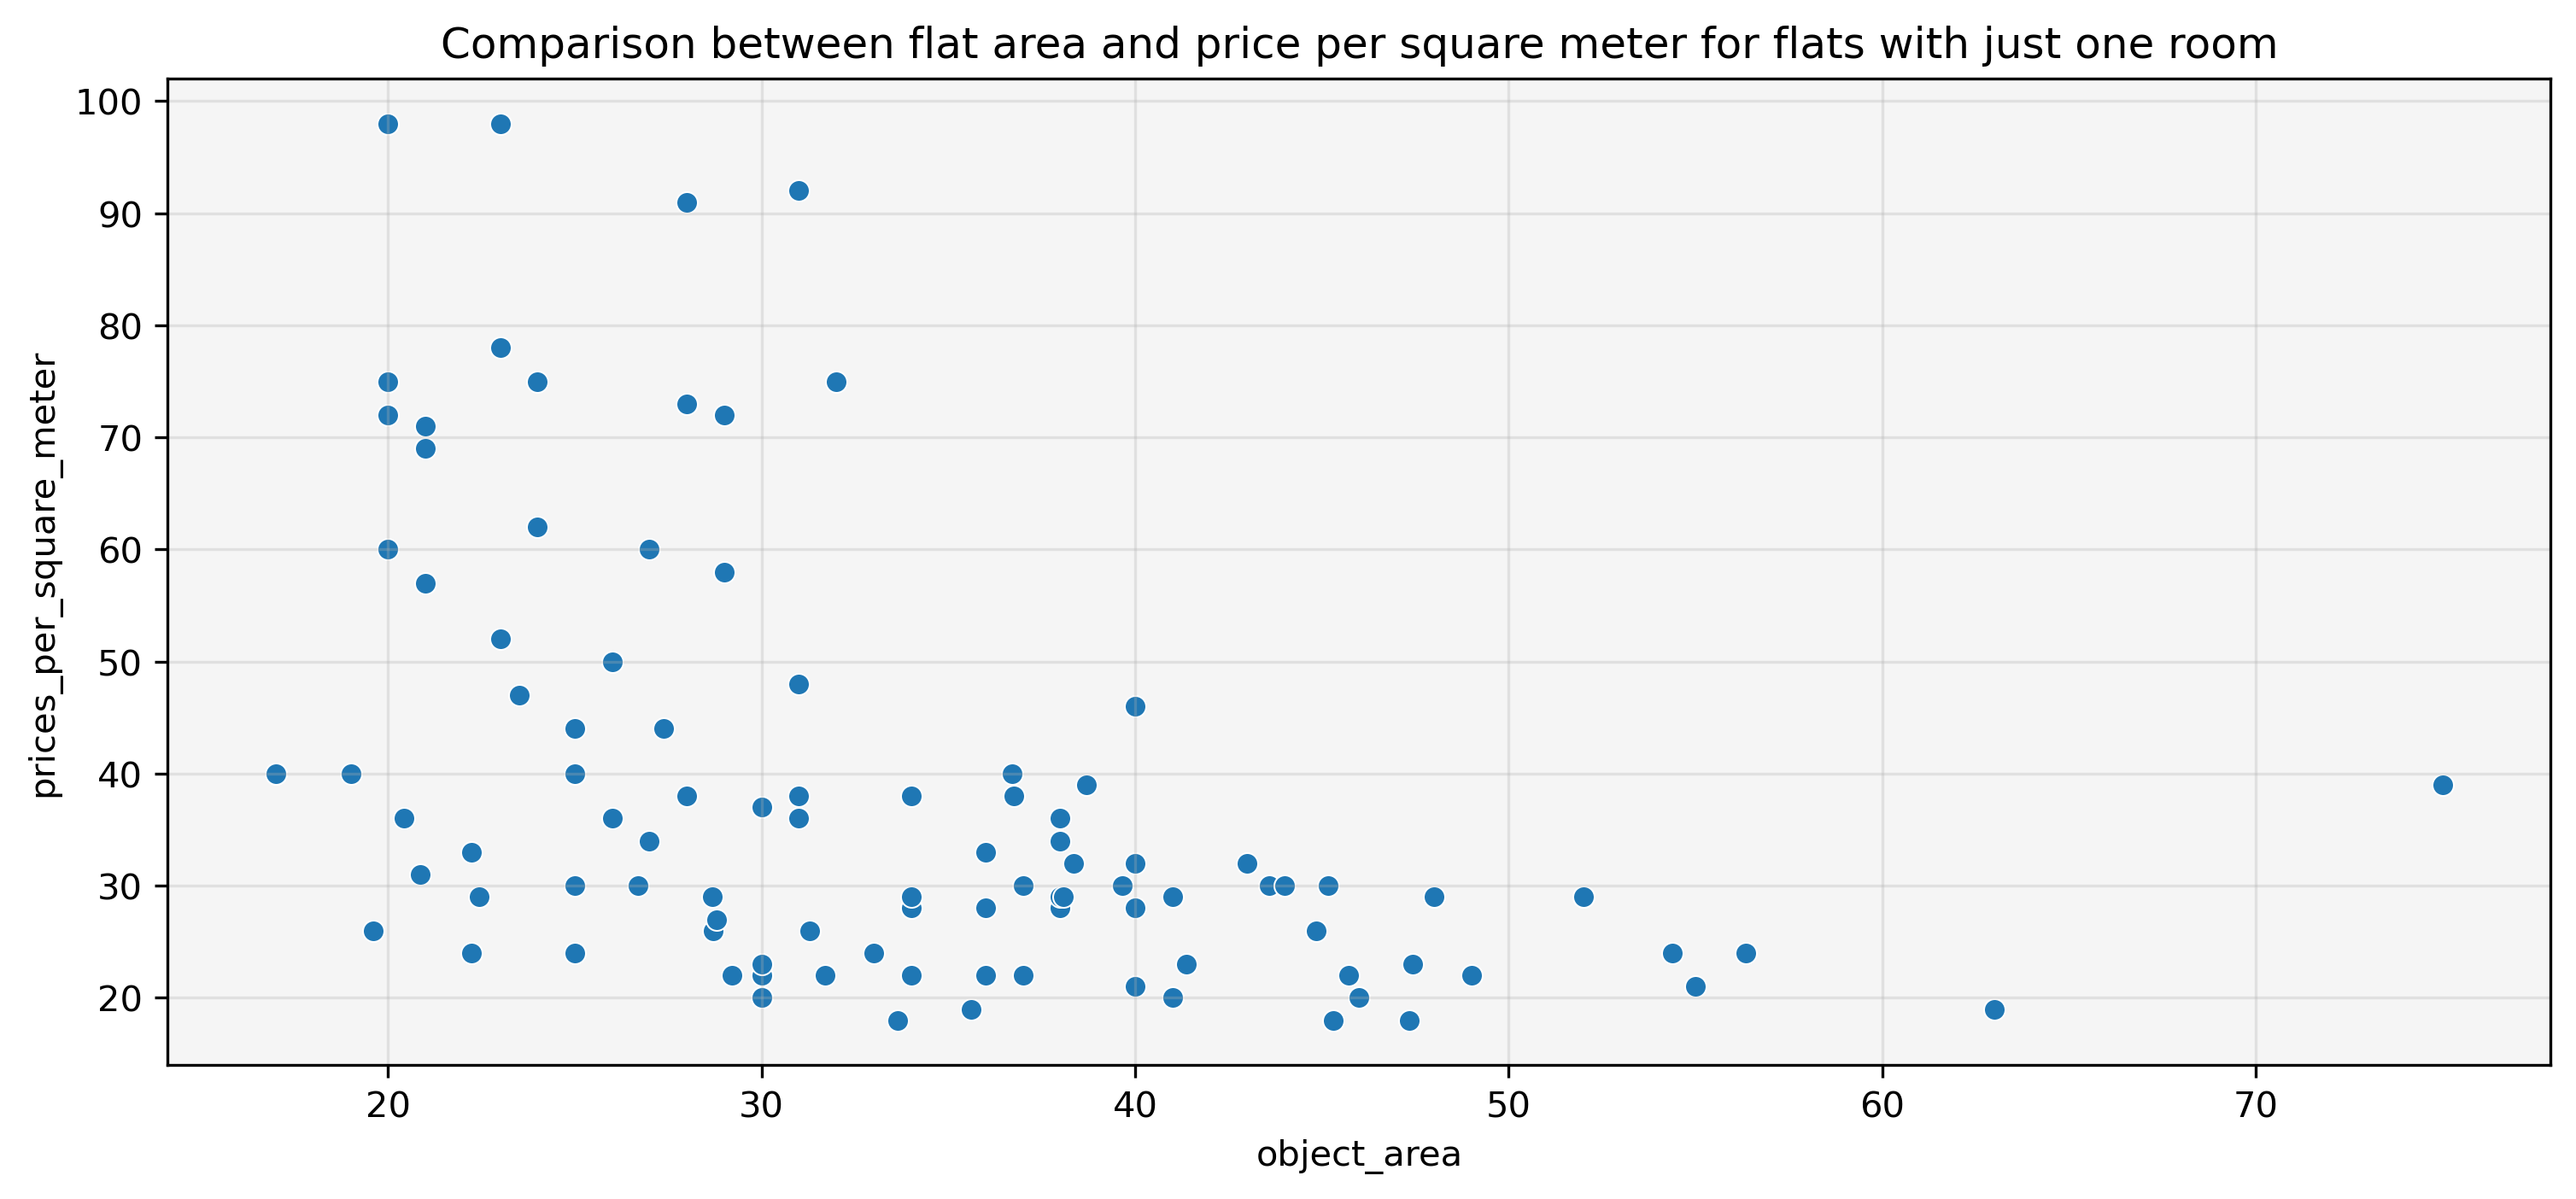

In [835]:
plt.figure(figsize=(12,5))
ax = plt.axes()
sns.scatterplot(
    data=df9[df9["object_rooms"]<2].iloc[:, :4], x="object_area", y="prices_per_square_meter")
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.title("Comparison between flat area and price per square meter for flats with just one room")
plt.show()

Here it will be more clear. The price per square meter is constant except for a area between 20 and 30 square meters. Let´s look at the whole data set if this phanomen appears over the whole dataset.

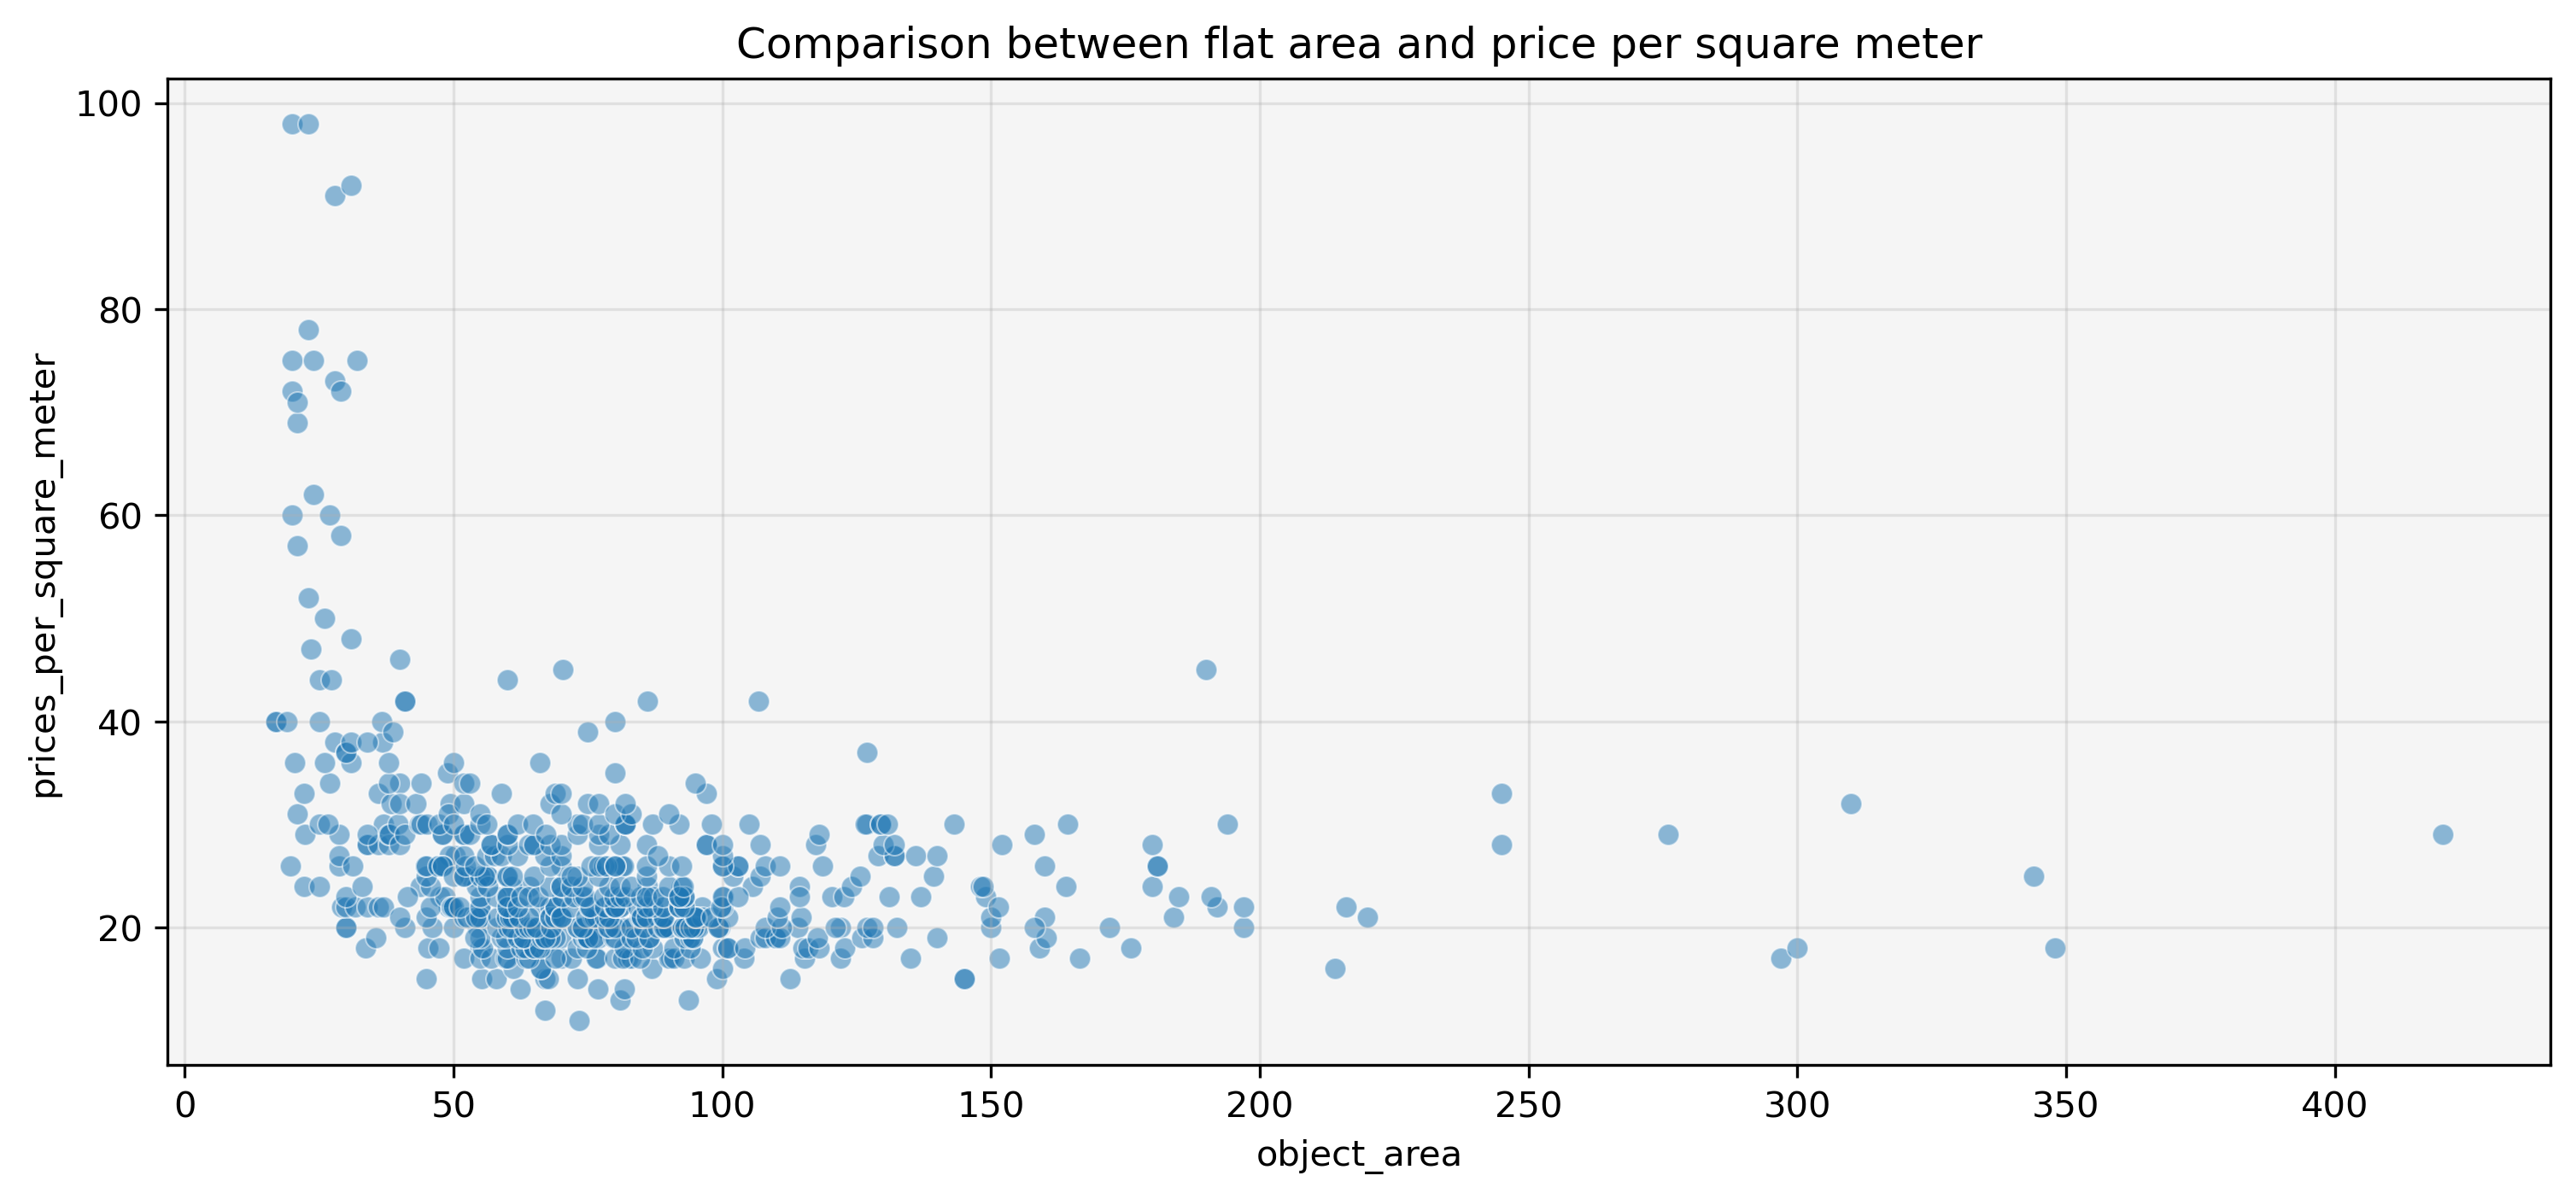

In [863]:
plt.figure(figsize=(12,5))
ax = plt.axes()
sns.scatterplot(
    data=df9, x="object_area", y="prices_per_square_meter", alpha=0.5)
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.title("Comparison between flat area and price per square meter")
plt.show()

This phanomen appears over the whole dataset. Maybe the values can be explained that they are in expensice districts.

In [857]:
print(len(df5[df5["prices_per_square_meter"]>=50]))
df5[df5["prices_per_square_meter"]>=50].iloc[:,:10]

20


id enh_impression_position  search_sortby  object_area  \
159  159                     5.0         320584         23.0   
164  164                    10.0         316913         21.0   
165  165                    11.0         316913         20.0   
193  193                    13.0         320584         26.0   
243  243                    11.0         316913         20.0   
244  244                    12.0         316913         21.0   
260  260                     2.0        1589106         24.0   
267  267                     9.0        3074107         20.0   
268  268                    10.0        3074107         21.0   
306  306                    22.0        1589106         27.0   
318  318                     8.0         316913         29.0   
354  354                    18.0        3074107         23.0   
355  355                    19.0        3074107         24.0   
401  401                    13.0        3074107         20.0   
426  426                    12.0         316913         28.0   
440  440                    26.0        3074107         29.0   
466  466                    26.0        3074107         23.0   
482  482                    16.0        3074107         32.0   
496  496                     4.0        3074107         28.0   
519  519                     1.0        3074107         31.0   

                              object_district object_features  \
159              Ludwigsvorstadt-Isarvorstadt          Balkon   
164                        Ramersdorf-Perlach               0   
165                        Ramersdorf-Perlach               0   
193              Ludwigsvorstadt-Isarvorstadt          Balkon   
243                        Ramersdorf-Perlach               0   
244                        Ramersdorf-Perlach          Balkon   
260                            Altstadt-Lehel      Garten|EBK   
267                        Ramersdorf-Perlach          Balkon   
268                        Ramersdorf-Perlach               0   
306                            Altstadt-Lehel      Garten|EBK   
318                        Ramersdorf-Perlach               0   
354                        Ramersdorf-Perlach          Balkon   
355                        Ramersdorf-Perlach          Balkon   
401                        Ramersdorf-Perlach          Balkon   
426                        Ramersdorf-Perlach               0   
440  Thalk.Obersendl.-Forsten-Fürstenr.-Solln               0   
466                        Ramersdorf-Perlach          Balkon   
482  Thalk.Obersendl.-Forsten-Fürstenr.-Solln          Balkon   
496  Thalk.Obersendl.-Forsten-Fürstenr.-Solln               0   
519  Thalk.Obersendl.-Forsten-Fürstenr.-Solln          Balkon   

    object_objektart_sub  object_price  object_rooms  prices_per_square_meter  
159                ETAGE          1200             1                     52.0  
164              Wohnung          1200             1                     57.0  
165              Wohnung          1200             1                     60.0  
193                ETAGE          1300             1                     50.0  
243              Wohnung          1440             1                     72.0  
244              Wohnung          1440             1                     69.0  
260            APARTMENT          1494             1                     62.0  
267            APARTMENT          1500             1                     75.0  
268            APARTMENT          1500             1                     71.0  
306            APARTMENT          1624             1                     60.0  
318              Wohnung          1680             1                     58.0  
354            APARTMENT          1800             1                     78.0  
355            APARTMENT          1800             1                     75.0  
401            APARTMENT          1950             1                     98.0  
426              Wohnung          2040             1                     73.0  
440  LOFT-STUDI

- There are 20 flats with an extreme high price per square meter.
- It´s interesting that the all flats with extreme high price per square meter have just one room.
- Some flats are in expensive districts (Top 3), but not all. 
- If you search for this extreme price per square meter flats, then you find business flats which are full furnished and you can rent them for an indiviual periode of time (e.g. 1 month). => This is the reason why this flats have such an extreme price.

Because my machine learning modell should predict an realistic price of an normal flat, the values abouve are outlier and I delete them.

In [864]:
df10 = df9[df9["prices_per_square_meter"] <= 50]

# 4.1. Feature Distribution Analysis

In this chapter I look at the distribution to find further interesting information about the data. With a look at the distribution I can see if the data is normal distribute. This is importent to know for my machine learning model, because most of the model can handle normal distributed data. 
Also, with the knowledge I can decide which value is the right one to determine the middle of the data.

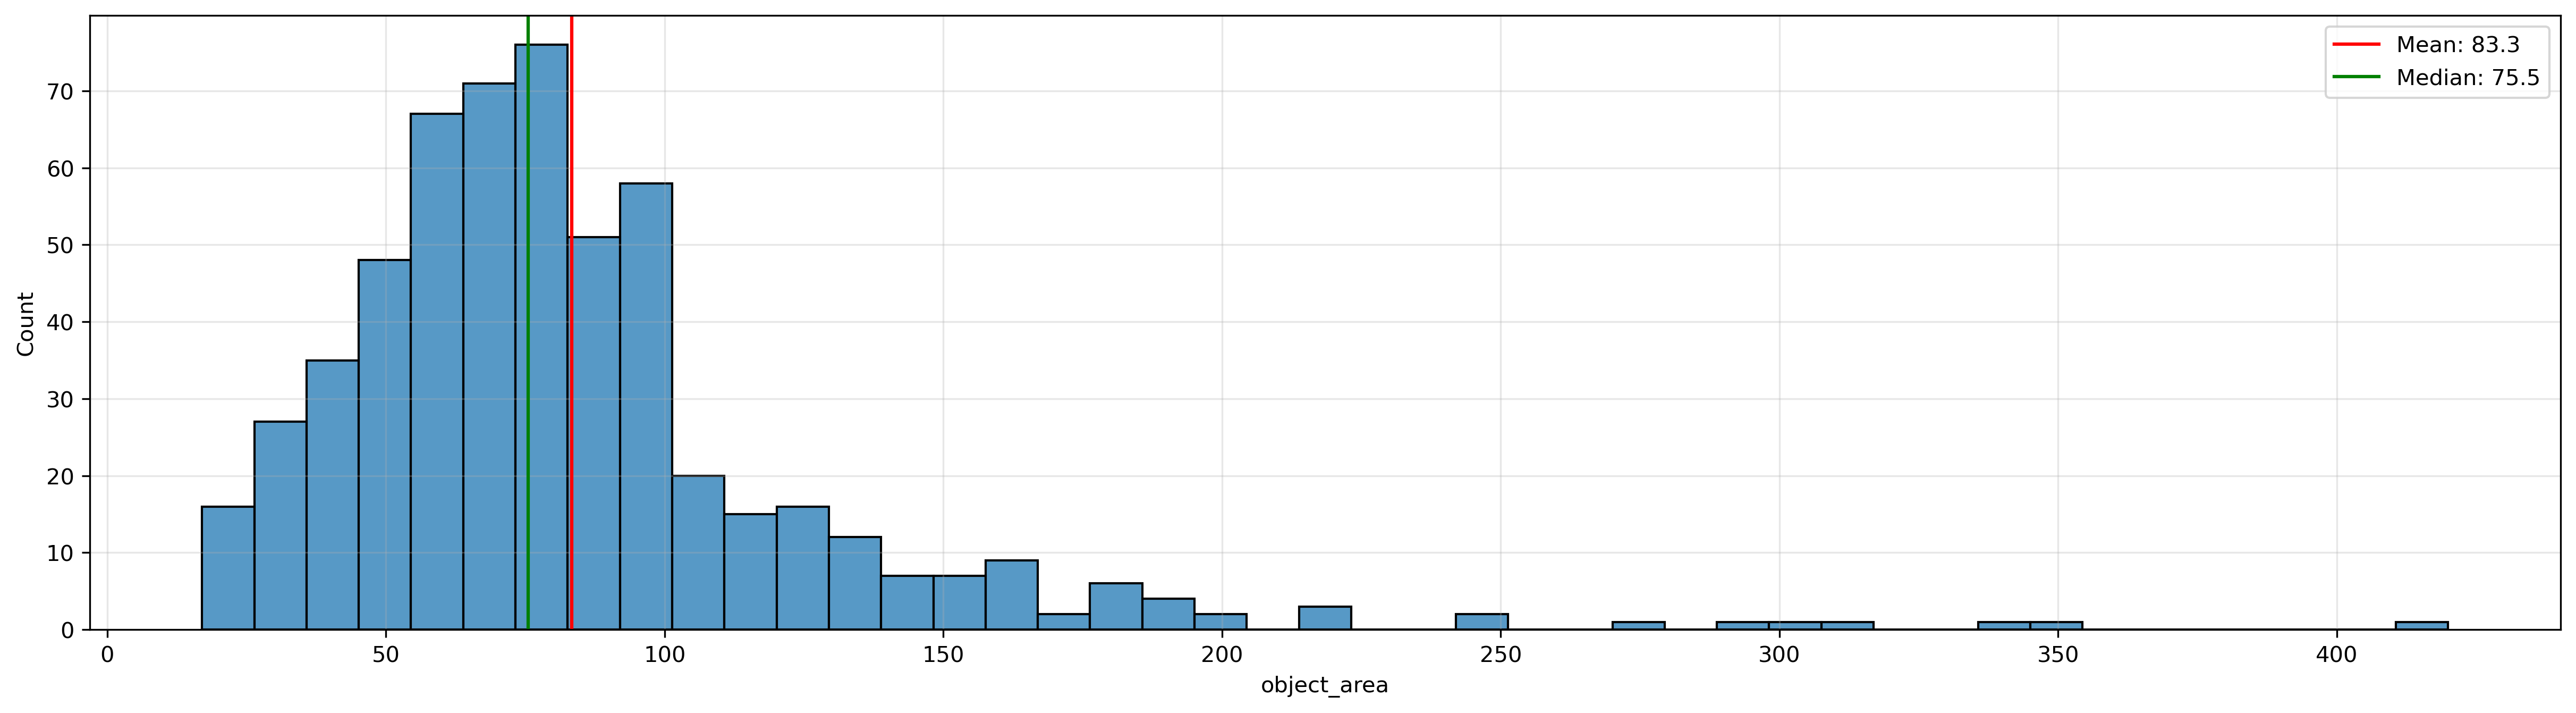

In [895]:
plt.figure(figsize=(20,5))
sns.histplot(x="object_area", data=df10)
plt.axvline(x=df10["object_area"].mean(),
            color='red')
plt.axvline(x=df10["object_area"].median(),
            color='green')
plt.legend(labels=['Mean: '+ str(round(df10["object_area"].mean(),2)), 'Median: '
                   + str(round(df10["object_area"].median(),2))])
plt.grid(alpha=0.3)
plt.show()
plt.close()

The distribution of the feature "object_area" is right skewed. That means that there are many "big" values which are far away from the centre. This can happen naturally then there is a lower limit but not a upper. In the case of the object area there is a natural limit which goes in the direction of zero, but can´t be zero. In the over direction there is just a theoretical limit. This can have an impact on my machine learning model. If the choose machine learning model based on linearity then the data needs to be transfrom.

Because of the right skew the mean is not a suffiziend metric to get the middle of the data. The mean can be more influenced through extreme values (which I have) in a distribution. That´s why the median is the right measurement for the middel of the data.

The middle flat size is in Munich 75,5m^2.

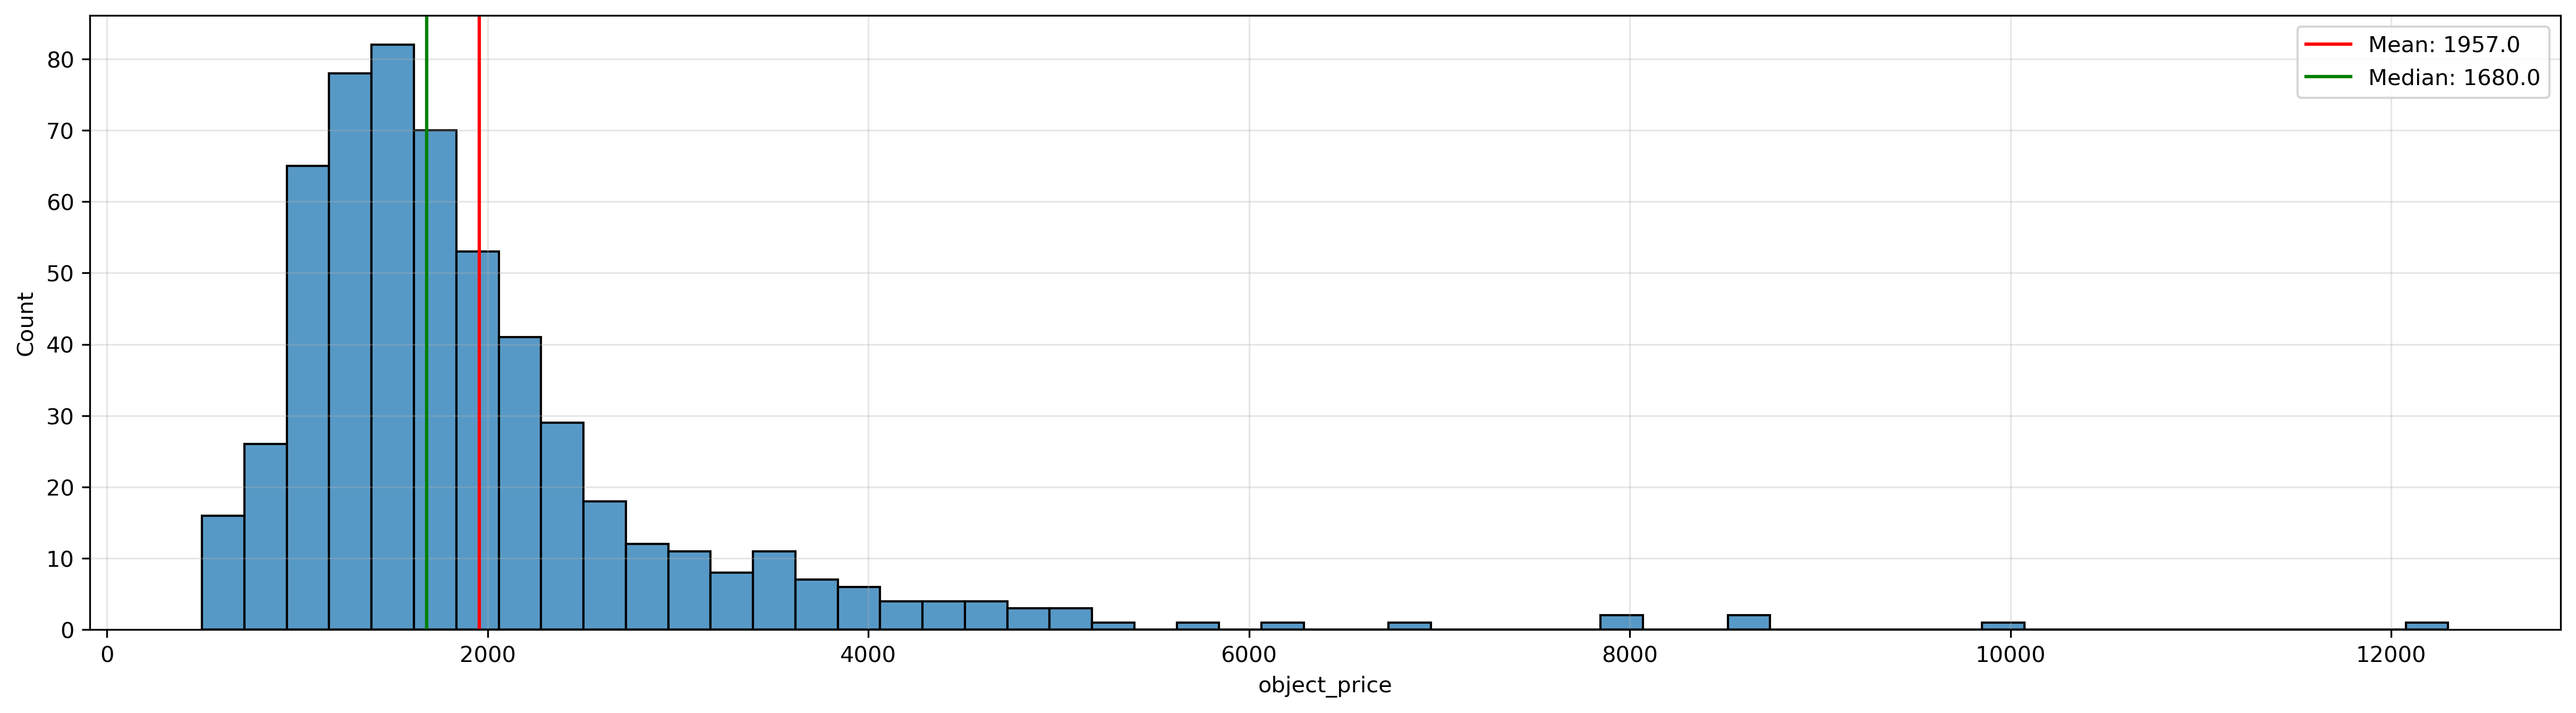

In [898]:
plt.figure(figsize=(20,5))
sns.histplot(x="object_price", data=df10)
plt.axvline(x=df10["object_price"].mean(),
            color='red')
plt.axvline(x=df10["object_price"].median(),
            color='green')
plt.legend(labels=['Mean: '+ str(round(df10["object_price"].mean(),0)), 'Median: '
                   + str(round(df10["object_price"].median(),0))])
plt.grid(alpha=0.3)
plt.show()

There is a similar picture for the feature "object_price". 

The middle flat price is in Munich 1680€.

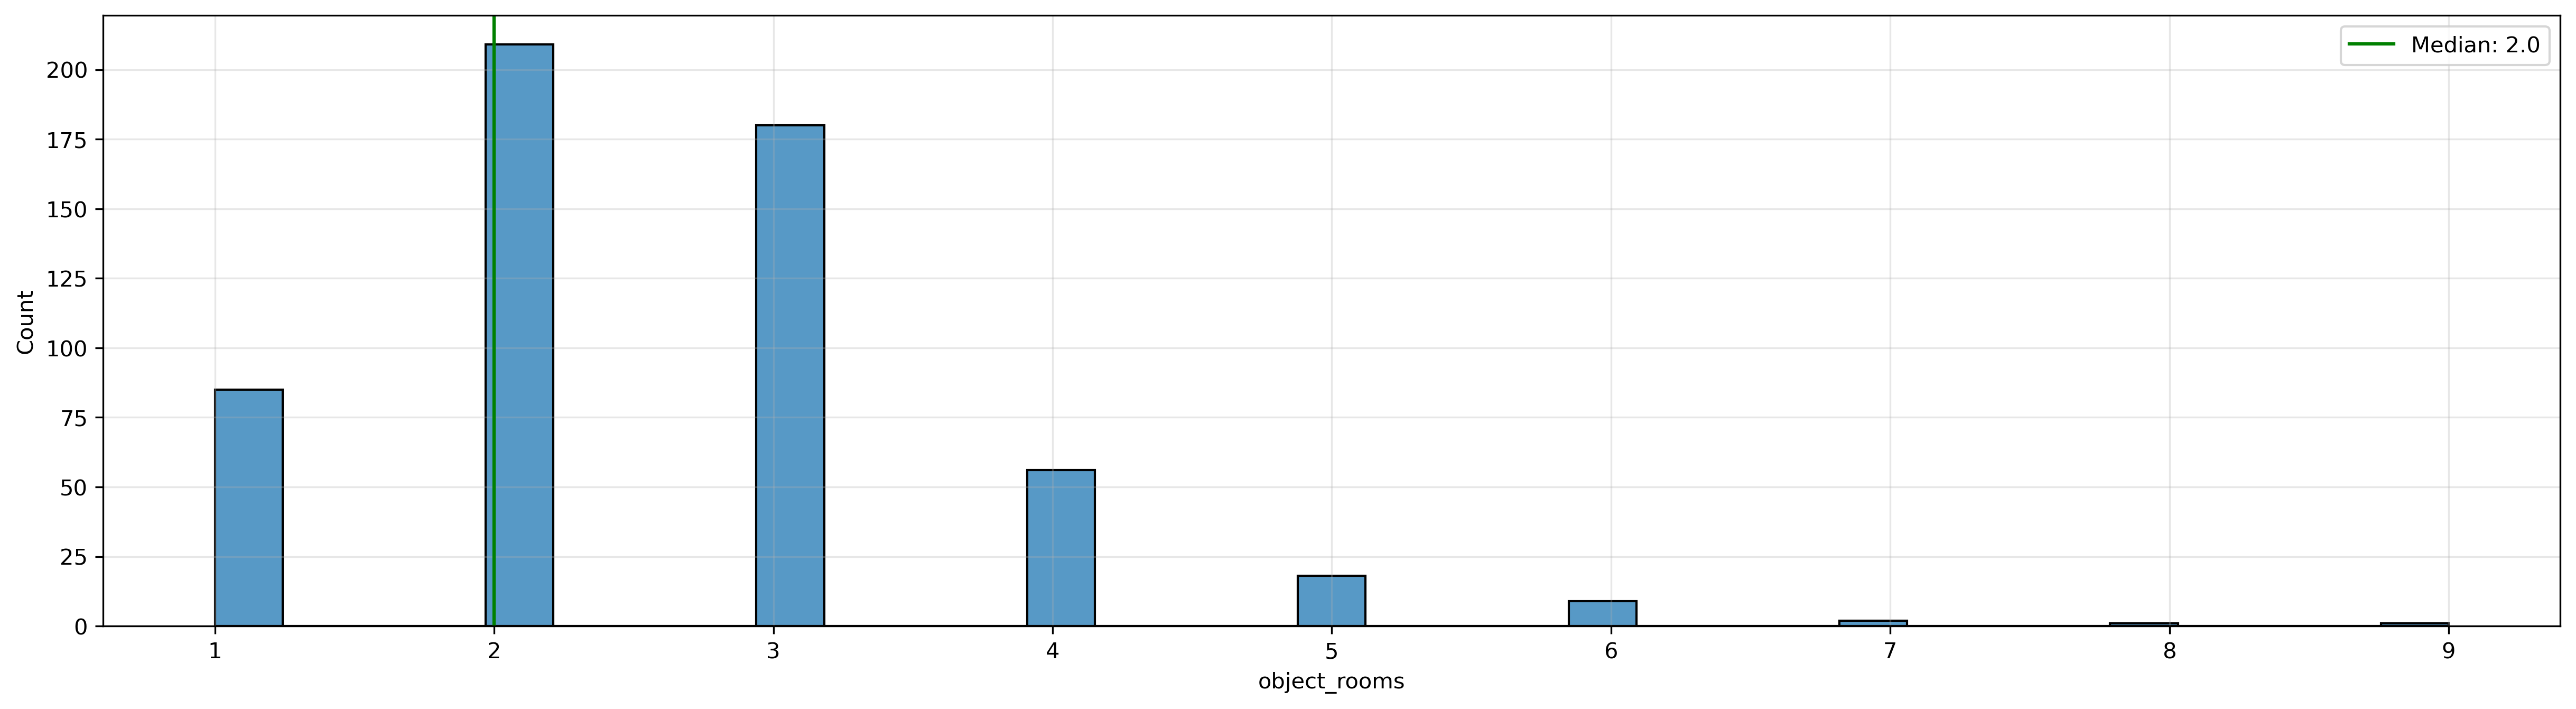

In [901]:
plt.figure(figsize=(20,5))
sns.histplot(x="object_rooms", data=df10)
plt.axvline(x=df10["object_rooms"].median(),
            color='green')
plt.legend(labels=['Median: '
                   + str(round(df10["object_rooms"].median(),0))])
plt.grid(alpha=0.3)
plt.show()

The "object_rooms" has also the same similarity to the other features. The mean makes for ordinal scales no sense. That´s why just the median is visualized. 

The middle room number of a flat is in Munich 2.

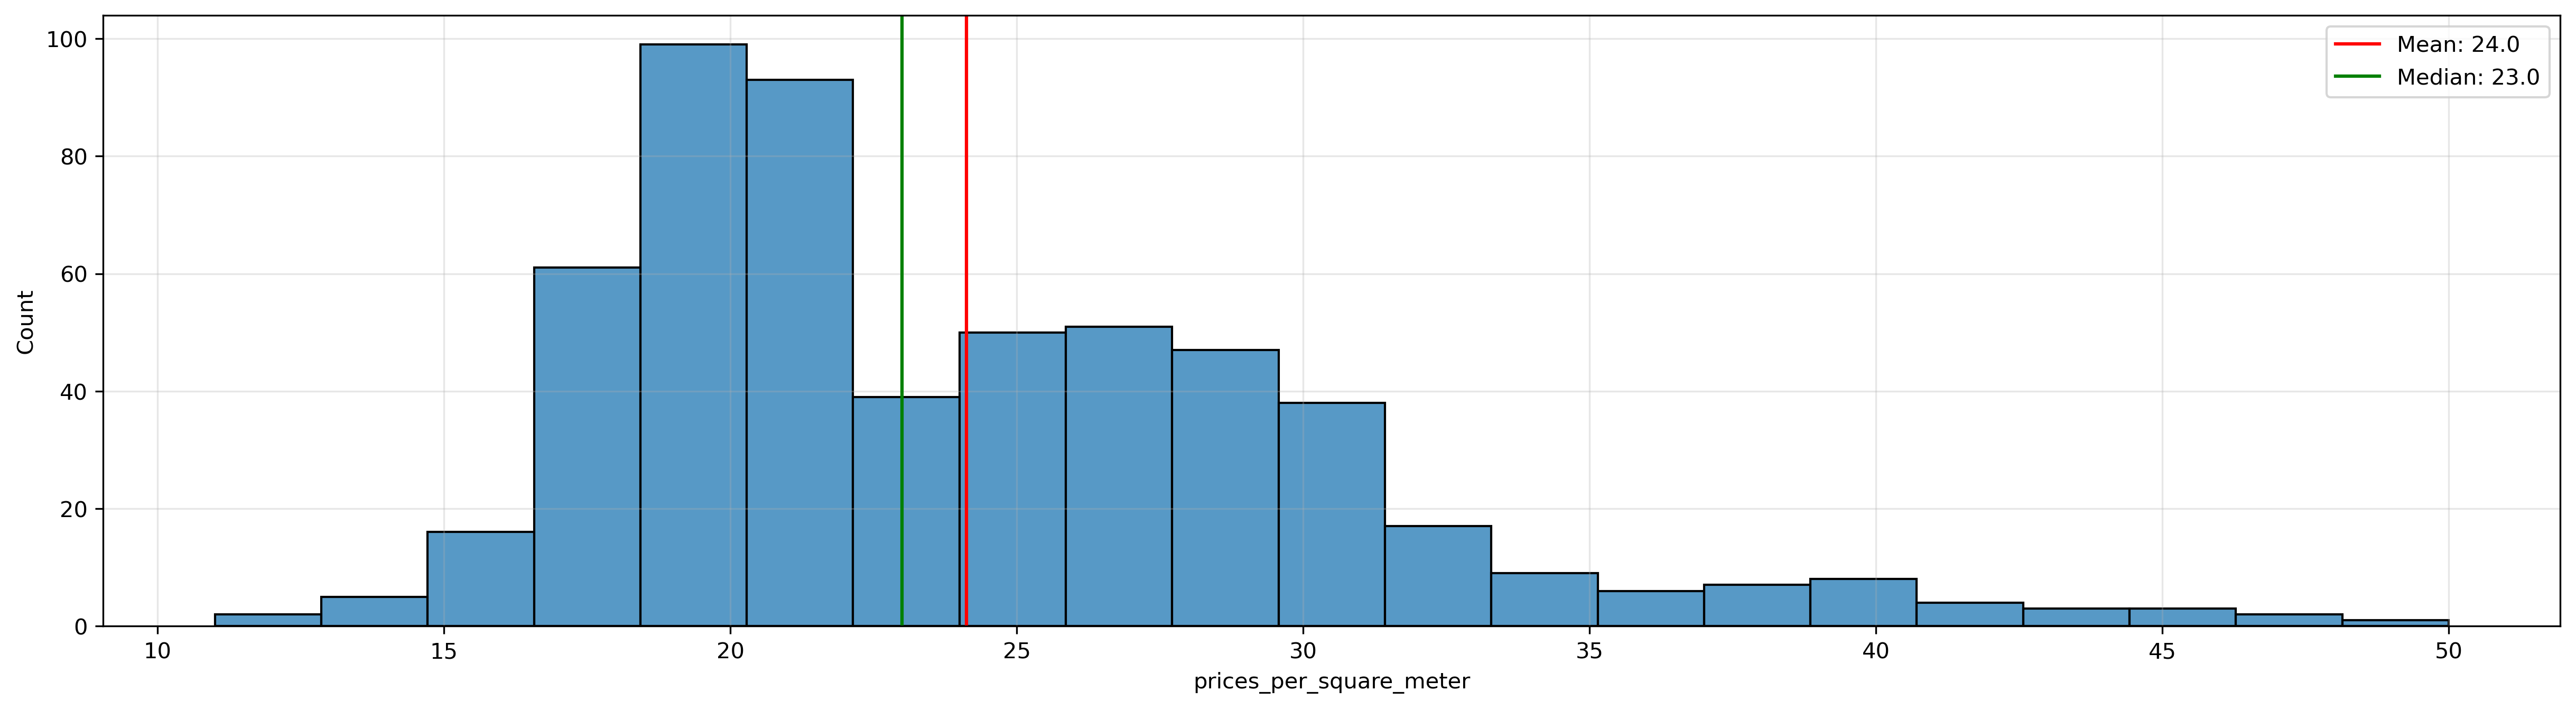

In [941]:
plt.figure(figsize=(20,5))
sns.histplot(x="prices_per_square_meter", data=df10)
plt.axvline(x=df10["prices_per_square_meter"].mean(),
            color='red')
plt.axvline(x=df10["prices_per_square_meter"].median(),
            color='green')
plt.legend(labels=['Mean: '+ str(round(df10["prices_per_square_meter"].mean(),0)), 'Median: '
                   + str(round(df10["prices_per_square_meter"].median(),0))])
plt.grid(alpha=0.3)
plt.show()

This distribution is quit different fron the other ones. It´s more like a normal or an mixture distribution.

Let´s test it if the distribution is normal.

In [949]:
stat, p_val = normaltest(df10["prices_per_square_meter"])

In [950]:
p_val

1.1452212492285993e-24

The the value is smaller then alpha=0.5 and thats why the distribtuion above can´t be normal.

Now I need to understand why the data has a mixture distribution. There are two reasons for that. On the one hand it can be that the feature price per square meter is calculated through the features "object_price" and "object_area". If these features are not similar distribute, then it can happen that the calculated value between them has a mixture distribution.
On the other hand it can be that the data is from two different populations. This would lead to a splitting of the data because otherwise the machine learning model would be harmed
Because the price per square meter is calculated and not measured it can must be my first assumption.
Let´s visual it to make it clear that I have different distributions from "object_price" and "object_area".

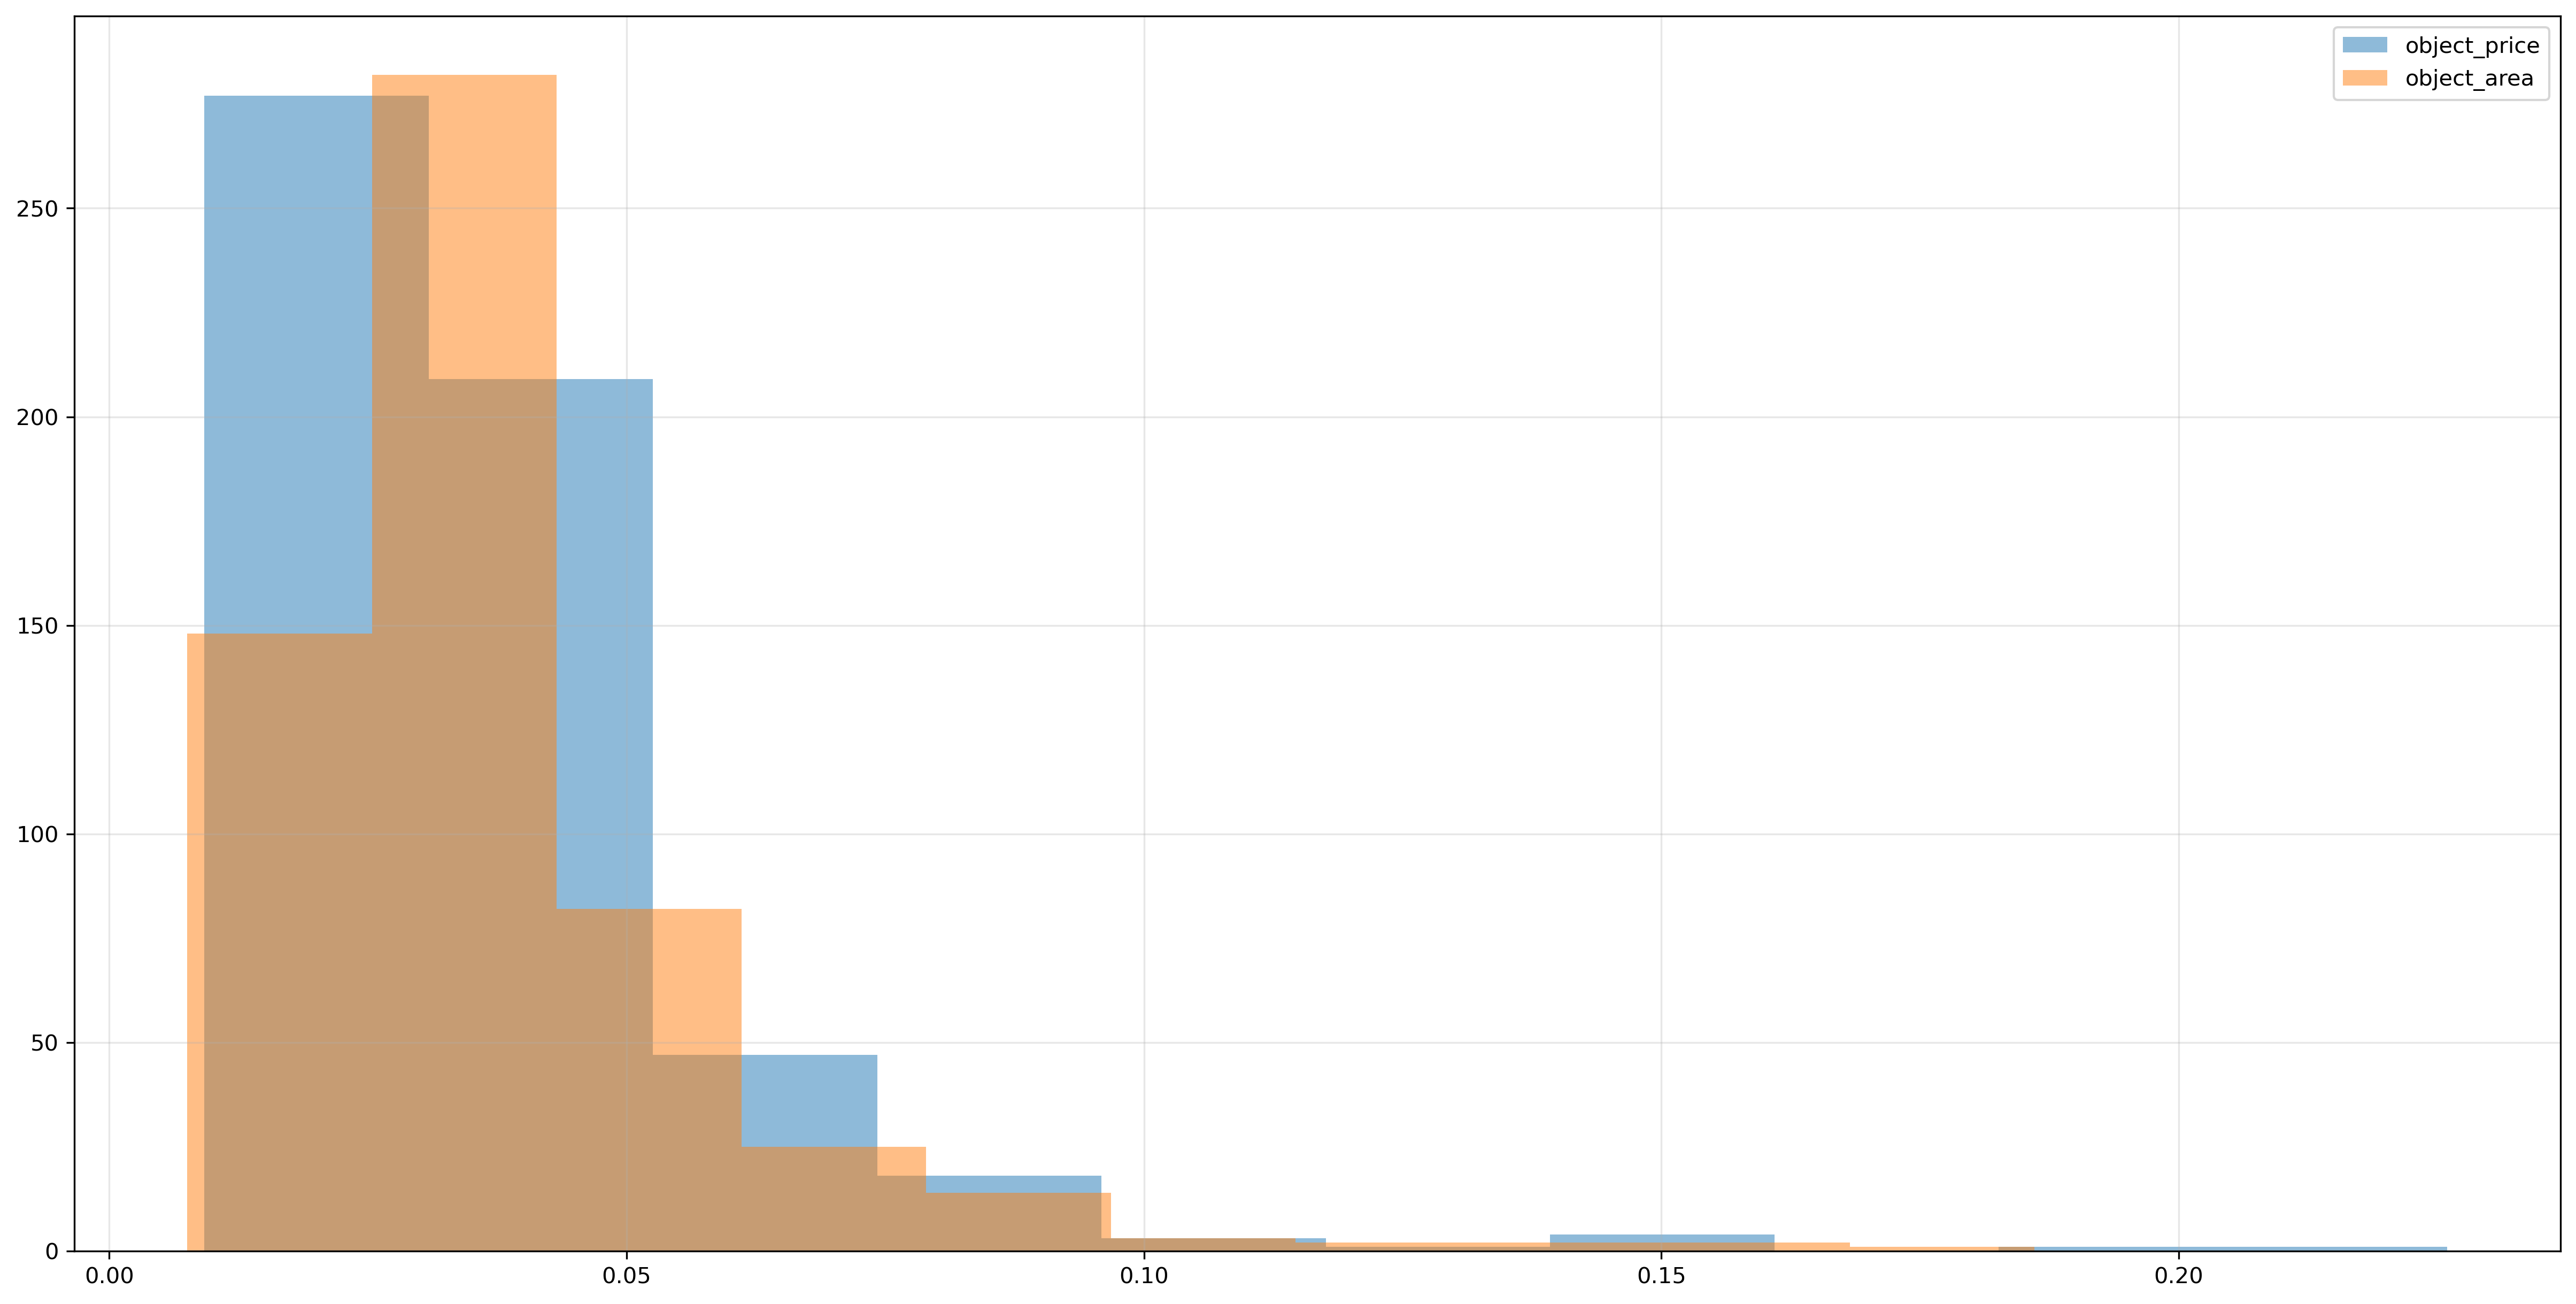

In [1017]:
plt.figure(figsize=(20,10))
plt.hist(preprocessing.normalize([np.array(df10["object_price"].tolist())])[0], alpha=0.5)
plt.hist(preprocessing.normalize([np.array(df10["object_area"].tolist())])[0], alpha=0.5)
plt.grid(alpha=0.3)
plt.legend(labels=["object_price", "object_area"])
plt.show()

# 4.2. Correlation Numeric Variables

In this step we look at the correlation between the numerical variables. This helps me to decide which feature has the biggest impact on the machine learning model.

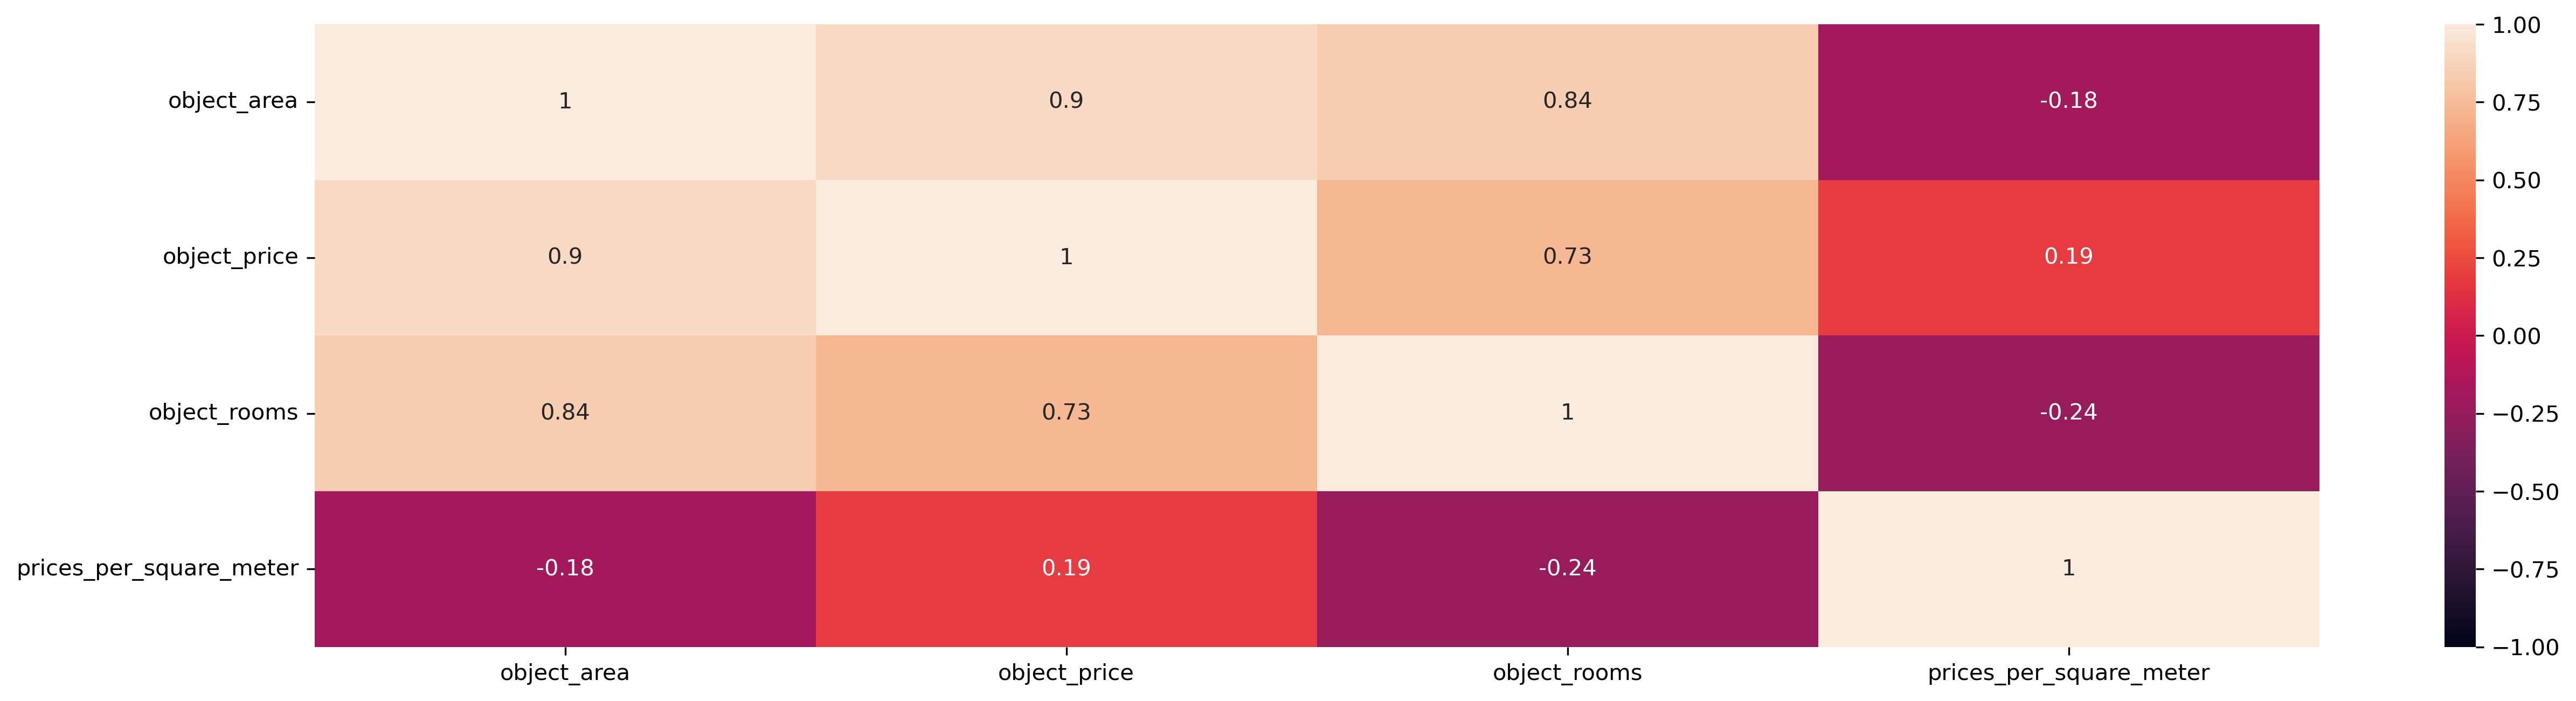

In [1049]:
plt.figure(figsize=(20,5))
sns.heatmap(df10.iloc[:,:4].corr(),vmin=-1, vmax=1, annot=True)
plt.show()

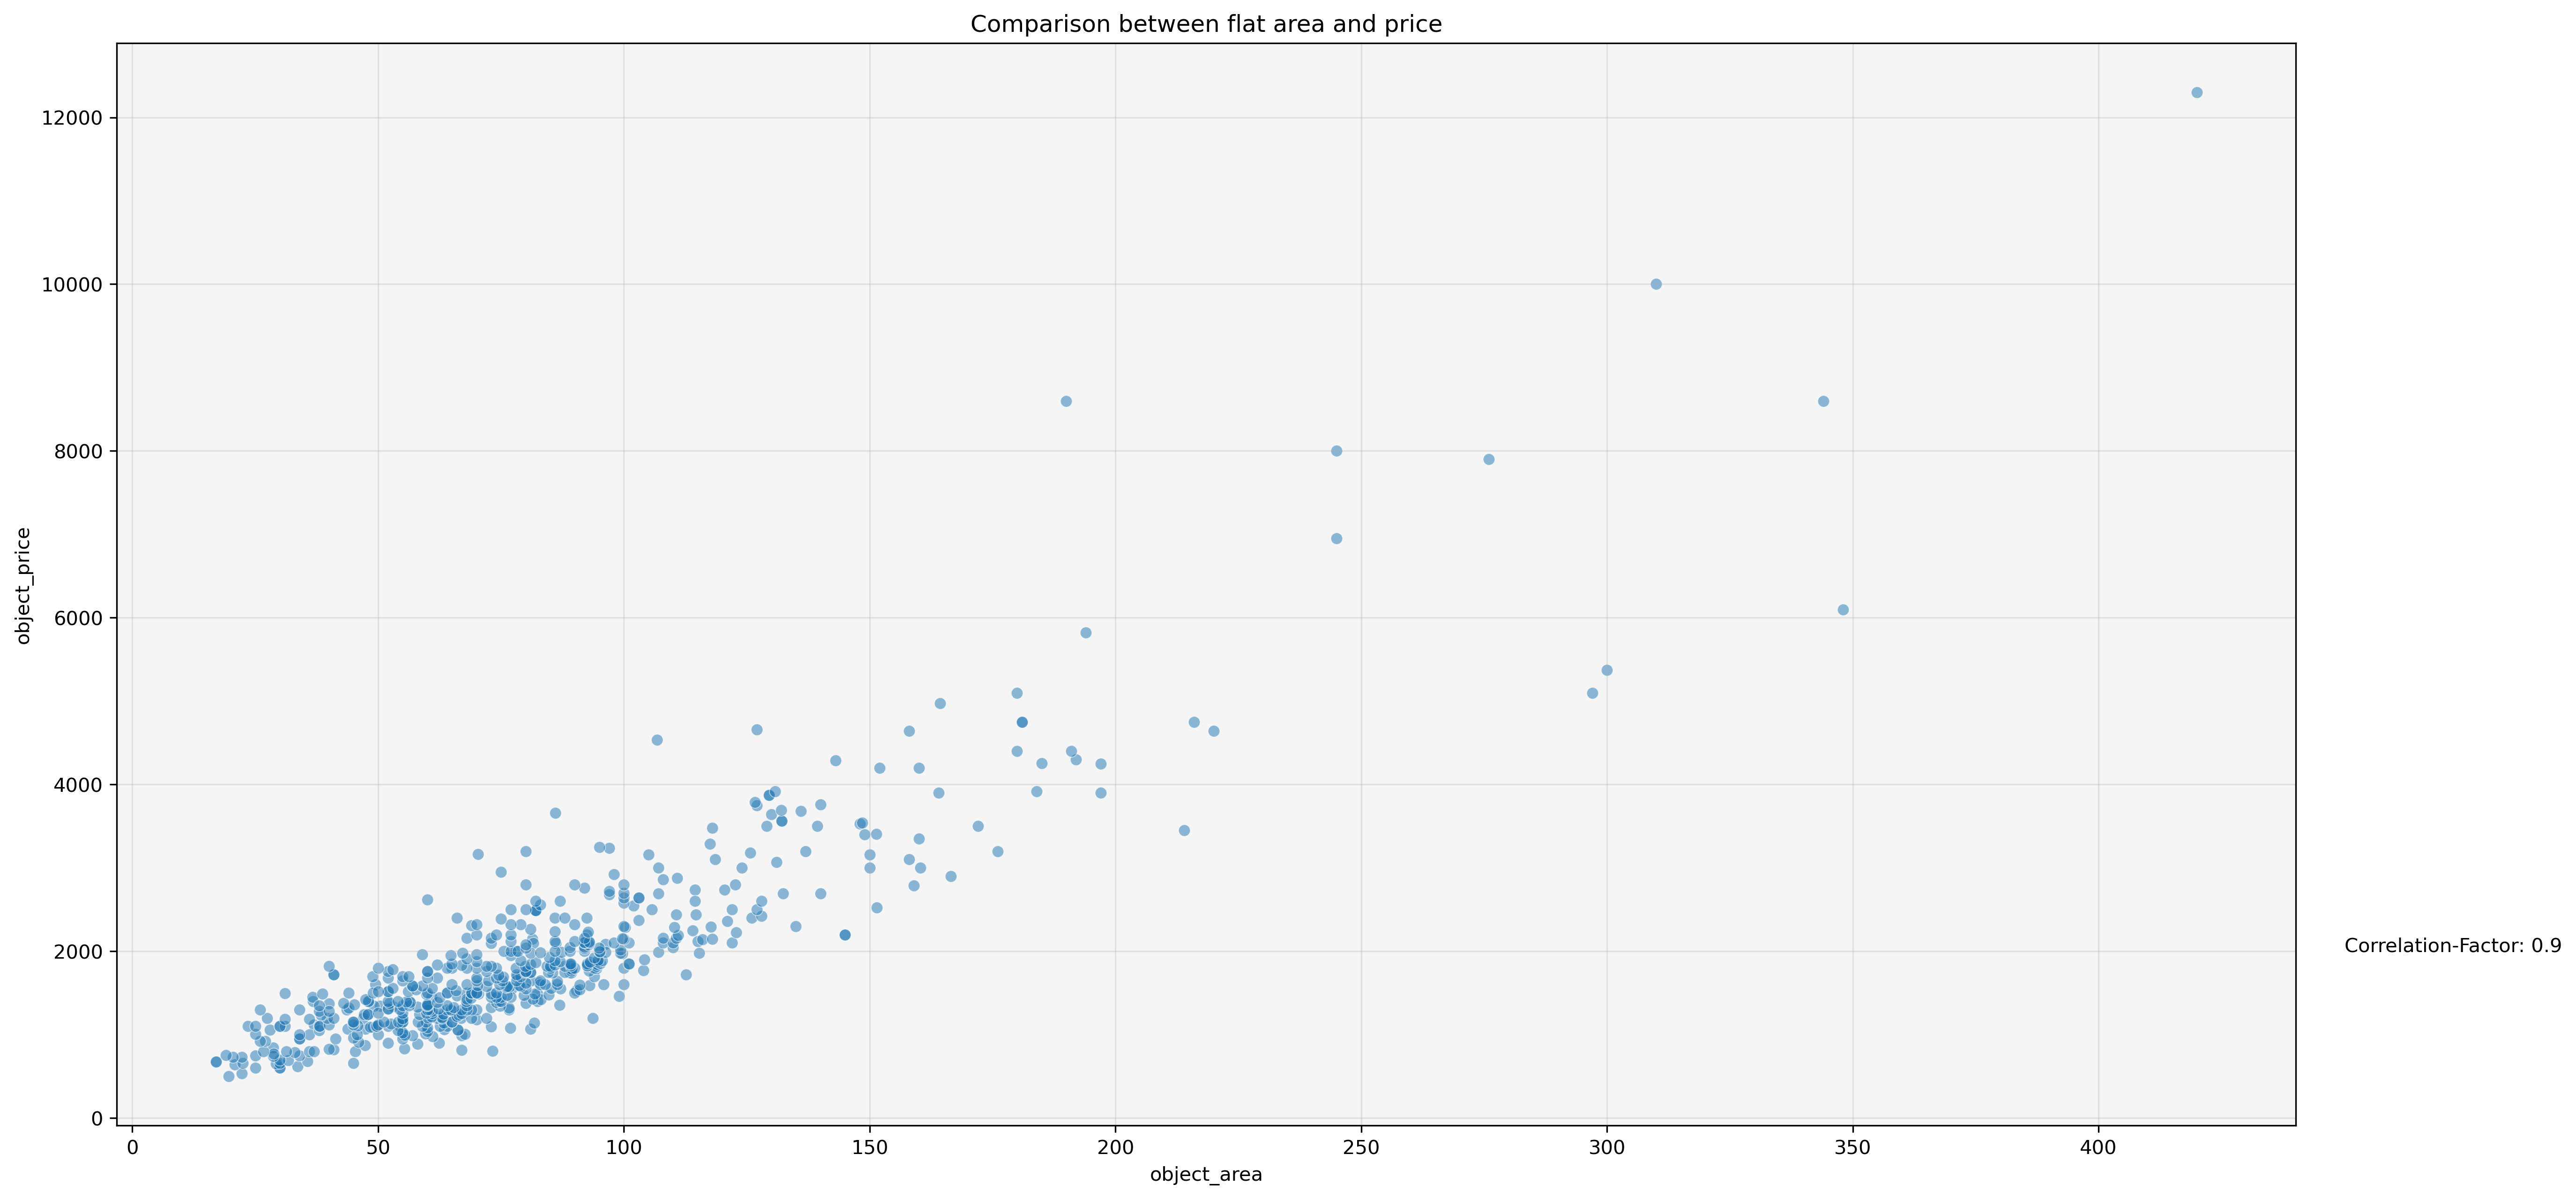

In [907]:
plt.figure(figsize=(20,10))
ax = plt.axes()
sns.scatterplot(
    data=df10, x="object_area", y="object_price",
    alpha=0.5
)
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.title("Comparison between flat area and price")
plt.text(450, 2000, 'Correlation-Factor: '+str(round(np.corrcoef(df10["object_area"],df10["object_price"])[1][0],2)))
plt.show()

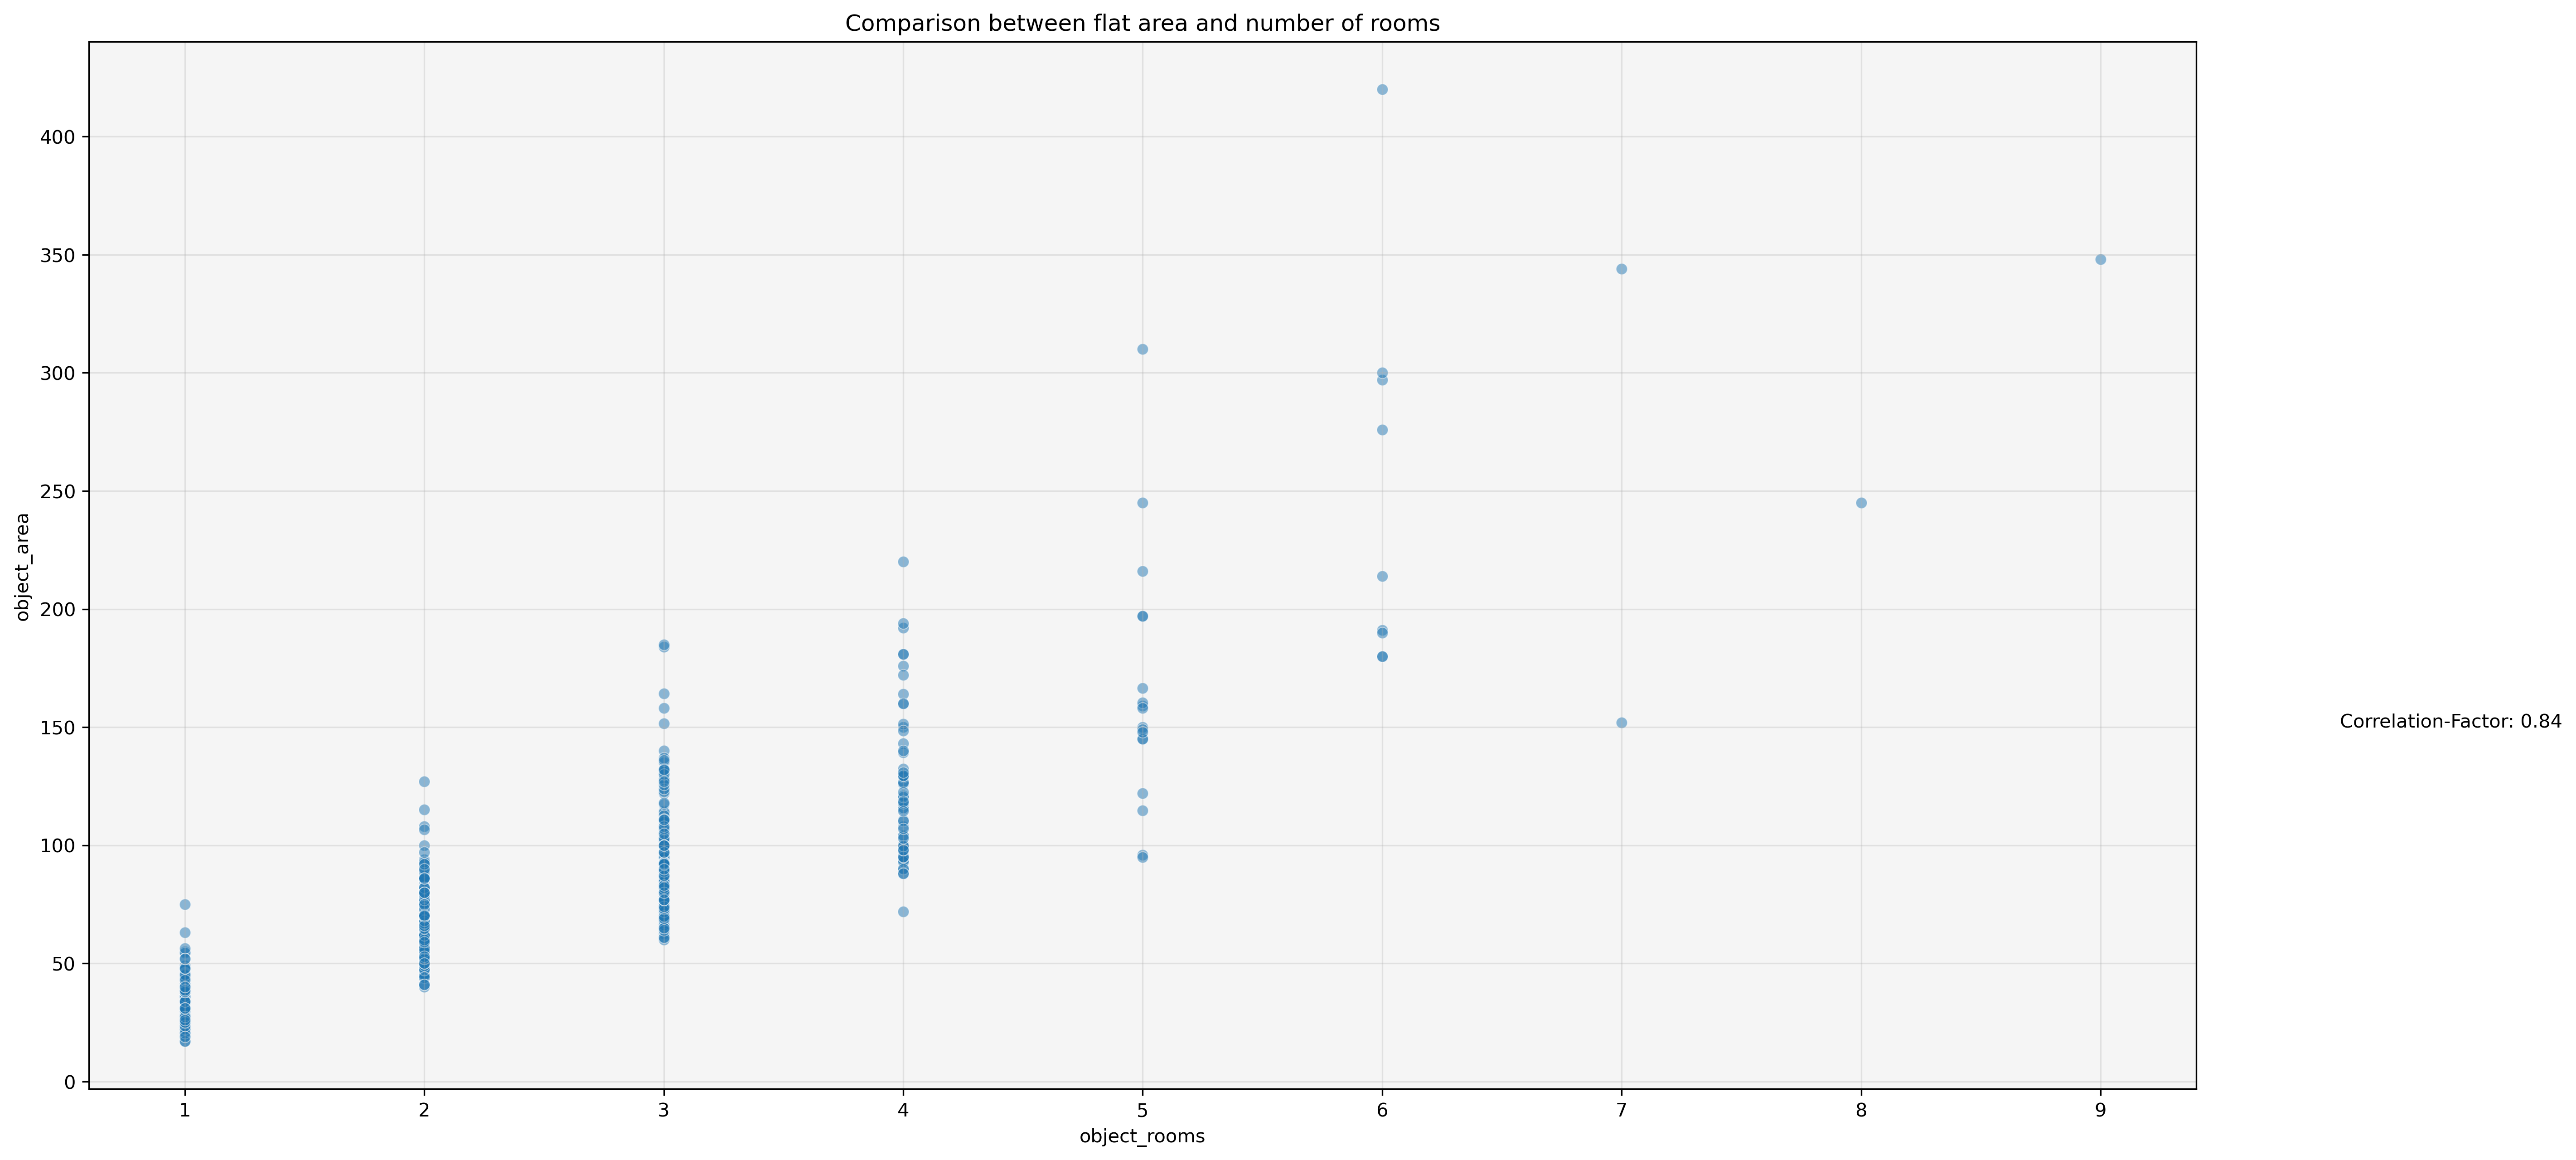

In [882]:
plt.figure(figsize=(20,10))
ax = plt.axes()
sns.scatterplot(
    data=df10, x="object_rooms", y="object_area",
    alpha=0.5
)
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.title("Comparison between flat area and number of rooms")
plt.text(10, 150, 'Correlation-Factor: '+str(round(np.corrcoef(df10["object_rooms"],df10["object_area"])[1][0],2)))
plt.show()

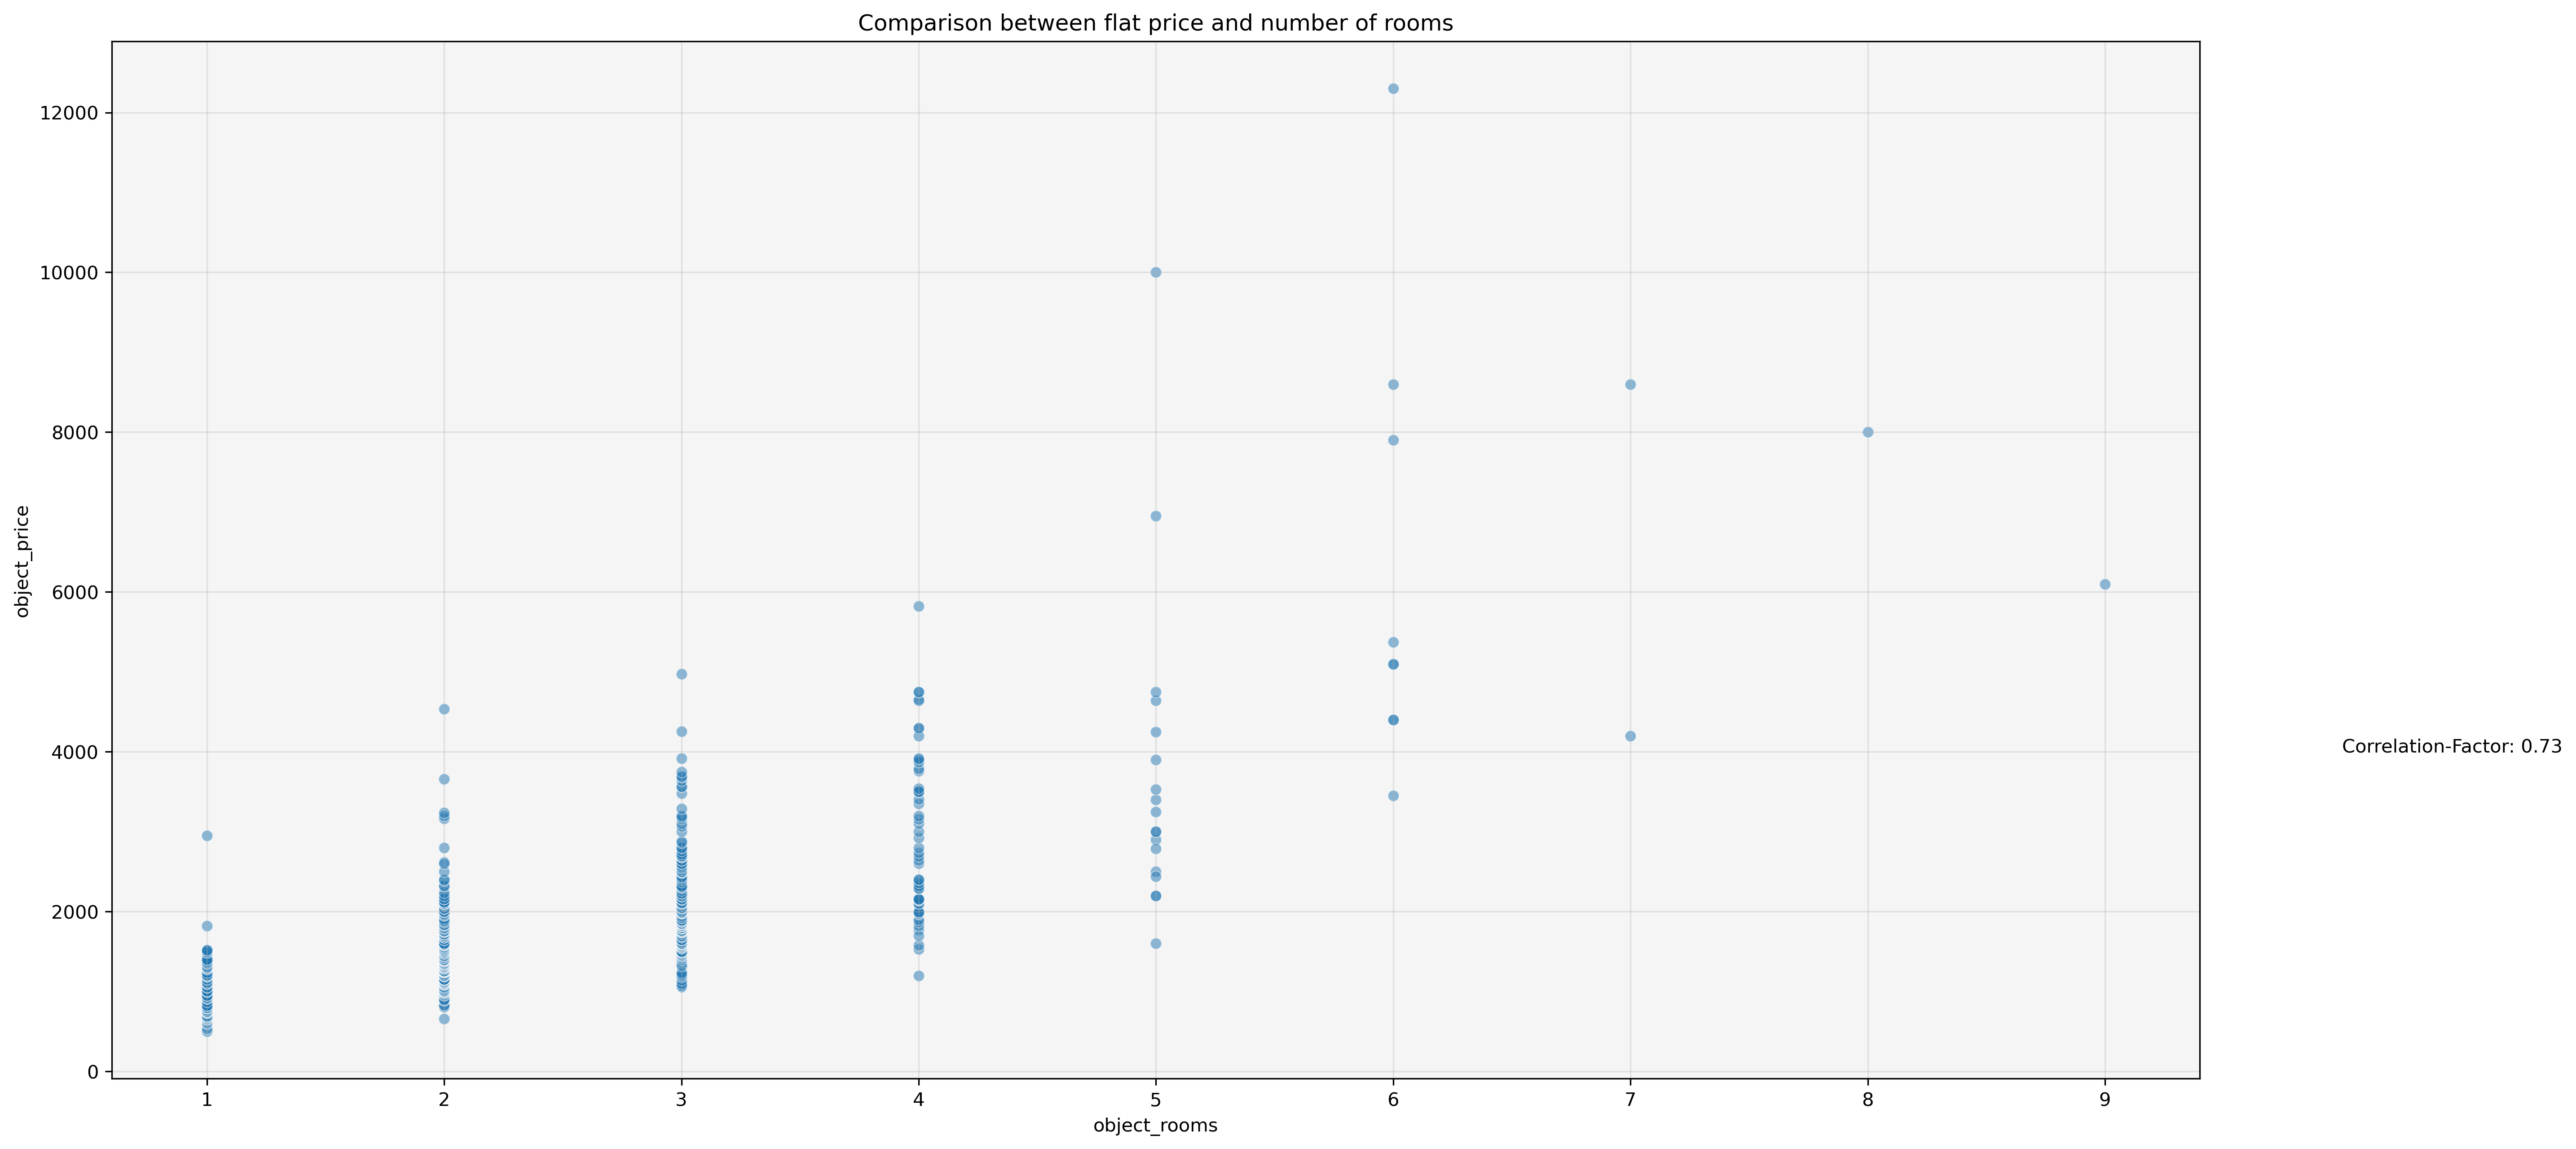

In [881]:
plt.figure(figsize=(20,10))
ax = plt.axes()
sns.scatterplot(
    data=df10, x="object_rooms", y="object_price",
    alpha=0.5
)
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.title("Comparison between flat price and number of rooms")
plt.text(10, 4000, 'Correlation-Factor: '+str(round(np.corrcoef(df10["object_rooms"],df10["object_price"])[1][0],2)))
plt.show()

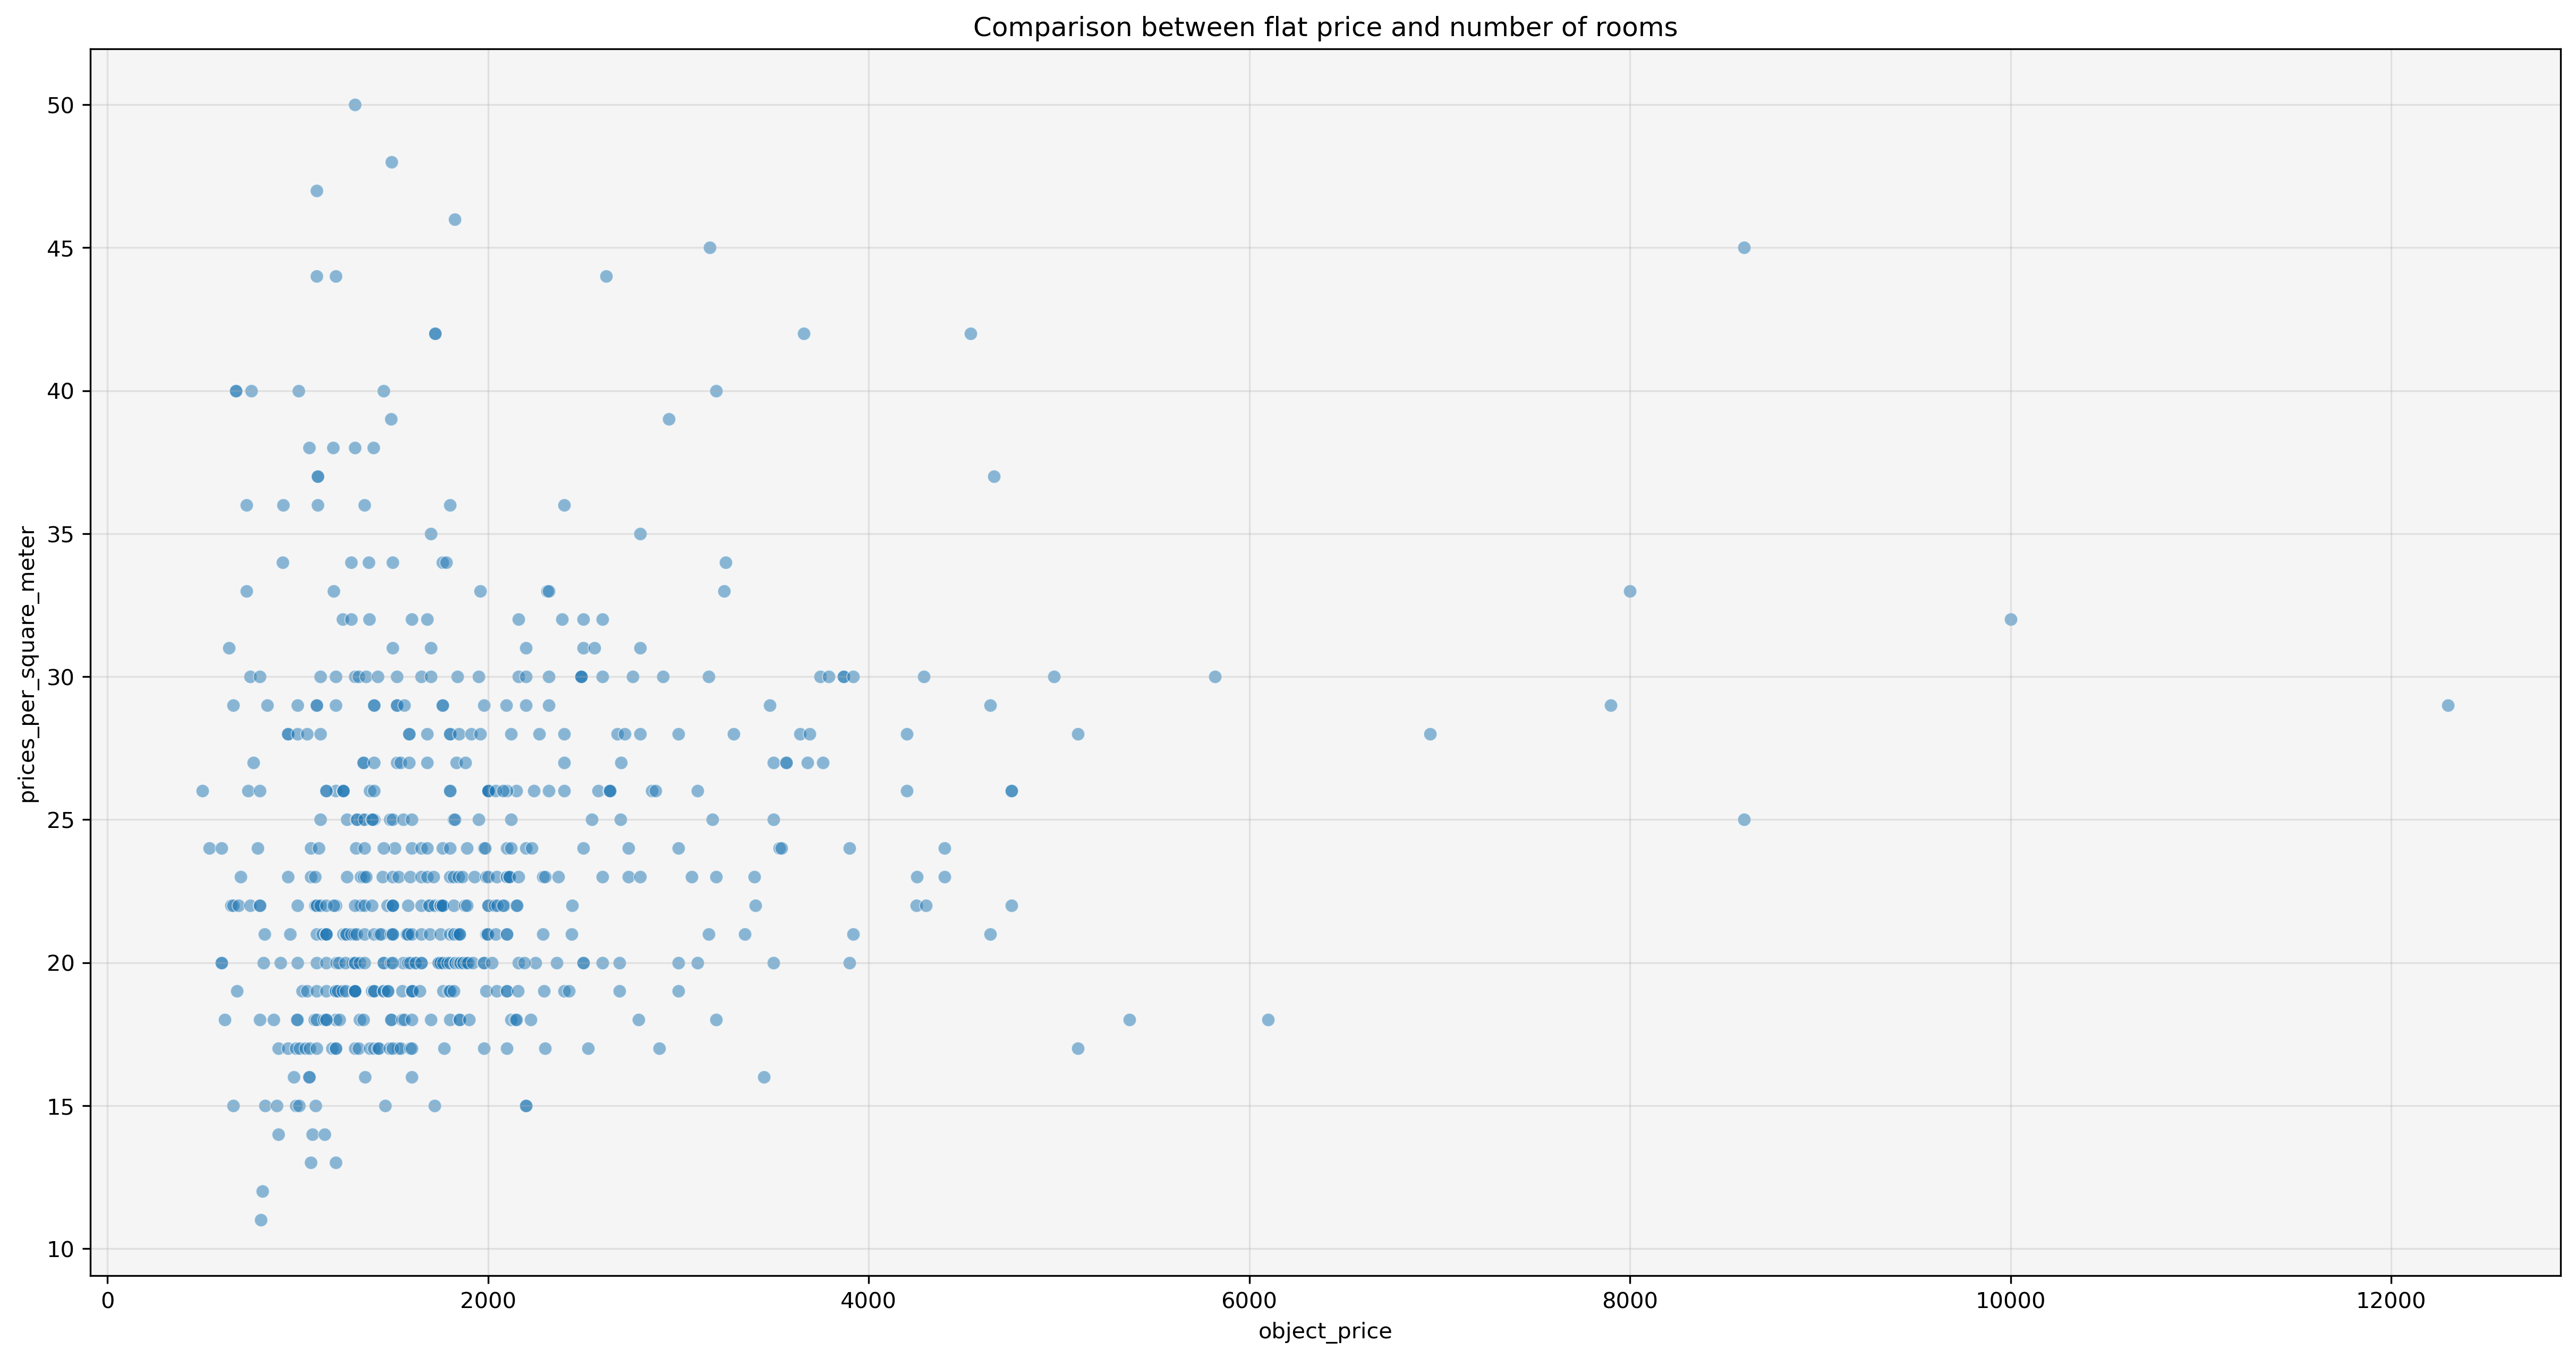

In [1053]:
plt.figure(figsize=(20,10))
ax = plt.axes()
sns.scatterplot(
    data=df10, x="object_price", y="prices_per_square_meter",
    alpha=0.5
)
plt.grid(alpha=0.3)
ax.set_facecolor("whitesmoke")
plt.title("Comparison between flat price and number of rooms")
#plt.text(10, 4000, 'Correlation-Factor: '+str(round(np.corrcoef(df10["object_rooms"],df10["object_price"])[1][0],2)))
plt.show()